**<p style="font-size:30px;">.ipynb file for CIND 820 Capstone Project</p>**

**Student Name: Arunkumar Cherungot Meppadathkalam**

**Student No.: 501277792**

**Github Repository:** https://github.com/acherungotTMU/TMU_Capstone

**Supervisor Name: Tamer Abdou**

**Date of Submission: 02nd July 2024**


**<p style="font-size:20px;">Cleaning and Summarizing the Data</p>**

In [32]:
# importing pandas library
import pandas as pd

In [33]:
# reading the electric vehicle population data '.csv' file and storing it in 'electric_v' dataframe
electric_v = pd.read_csv("D:/Personal/Data Analytics Learning/TMU/CIND 820 Capstone/Electric_Vehicle_Population_Data.csv")

In [34]:
# printing the dimensions of 'electric_v'
print(electric_v.shape)

(186879, 17)


In [35]:
# getting an overview of 'electric_v' by printing the first 5 observations
print(electric_v.head())

   VIN (1-10)  County       City State  Postal Code  Model Year   Make  \
0  WBY8P6C58K    King    Seattle    WA      98115.0        2019    BMW   
1  5YJSA1DN4D  Kitsap  Bremerton    WA      98312.0        2013  TESLA   
2  5YJSA1E26J    King       Kent    WA      98042.0        2018  TESLA   
3  WBY2Z2C54E    King   Bellevue    WA      98004.0        2014    BMW   
4  5YJXCDE23J    King   Bellevue    WA      98004.0        2018  TESLA   

     Model                   Electric Vehicle Type  \
0       I3          Battery Electric Vehicle (BEV)   
1  MODEL S          Battery Electric Vehicle (BEV)   
2  MODEL S          Battery Electric Vehicle (BEV)   
3       I8  Plug-in Hybrid Electric Vehicle (PHEV)   
4  MODEL X          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             153   
1           Clean Alternative Fuel Vehicle Eligible             208   
2           Clean

In [36]:
# printing a concise summary of 'electric_v' dataframe
print(electric_v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186879 entries, 0 to 186878
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         186879 non-null  object 
 1   County                                             186876 non-null  object 
 2   City                                               186876 non-null  object 
 3   State                                              186879 non-null  object 
 4   Postal Code                                        186876 non-null  float64
 5   Model Year                                         186879 non-null  int64  
 6   Make                                               186879 non-null  object 
 7   Model                                              186879 non-null  object 
 8   Electric Vehicle Type                              186879 non-null  object

**Cleaning the Data**

In [37]:
# checking if there are any duplicate entries in the dataframe
print(electric_v['DOL Vehicle ID'].duplicated().sum())

0


In [38]:
# checking for null values in the dataframe
print(electric_v.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 403
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [39]:
# dropping the observations having null values under 'Legislative District' as those observations belongs to states other than Washington
electric_v = electric_v.dropna(subset=['Legislative District'])

# dropping observations having null values under 'Vehicle Location'
electric_v = electric_v.dropna(subset=['Vehicle Location'])

# checking for null values again
print(electric_v.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [40]:
# checking the data types of variables in 'electric_v' dataframe
print(electric_v.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [41]:
# importing 're' library for matching regular expressions
import re

# defining a function to match a regular expression and returning a tuple with two values
def get_coordinates(location):
    if location and isinstance(location, str):
        extractor = re.match(r'POINT \(([^ ]+) ([^ ]+)\)', location)
        if extractor:
            lat = float(extractor.group(2))
            long = float (extractor.group(1))
            return lat, long
    return None, None

# applying the function to the 'Vehicle Location' variable in 'electric_v' data frame 
# storing the values in two new variables named 'Latitude' and 'Longitude'
electric_v['Latitude'], electric_v['Longitude'] = zip(*electric_v['Vehicle Location'].apply(get_coordinates))

# Insert the new columns just after 'Vehicle Location' for contextual relevance
location_index = electric_v.columns.get_loc('Vehicle Location')
electric_v.insert(location_index + 1, 'Latitude', electric_v.pop('Latitude'))
electric_v.insert(location_index + 2, 'Longitude', electric_v.pop('Longitude'))

In [42]:
# creating a list of columns that need to be converted to 'categorical' data type
categorical_columns = [
    'County', 'City', 'State', 'Make', 'Model', 
    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Electric Utility', 'Legislative District', '2020 Census Tract'
]

# converting the respective variables to categorical datatype
for col in categorical_columns:
    electric_v[col] = electric_v[col].astype('category')

In [43]:
# deleting the 'Base MSRP' column in 'electric_v' as 98% of the values are 0
electric_v = electric_v.drop(columns=['Base MSRP'])

#printing the info after modification
print(electric_v.info())

<class 'pandas.core.frame.DataFrame'>
Index: 186471 entries, 0 to 186878
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         186471 non-null  object  
 1   County                                             186471 non-null  category
 2   City                                               186471 non-null  category
 3   State                                              186471 non-null  category
 4   Postal Code                                        186471 non-null  float64 
 5   Model Year                                         186471 non-null  int64   
 6   Make                                               186471 non-null  category
 7   Model                                              186471 non-null  category
 8   Electric Vehicle Type                              186471 non-null  c

**Exploratory Data Analysis of Electric Vehicle Population Data**

In [44]:
# installing ydata-profiling library which is used for comprehensive EDA reports
#!pip install ydata-profiling

# importing 'ProfileReport' from 'ydata_profiling' which is used to create the EDA report
from ydata_profiling import ProfileReport

# creating profile report for electric_v data
ev_profile = ProfileReport(electric_v, title = "Electric Vehicle Population Data - Exploratory Analysis", explorative=True)

# saving the generated report to an HTML format
ev_profile.to_file('D:/Personal/Data Analytics Learning/TMU/CIND 820 Capstone/ev_profile.html')

c:\Users\Owner\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Owner\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Clean Alternative Fuel Vehicle Eligible'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Univariate Analysis of 'electric_v' dataframe

In [45]:
# printing a summary of the 'electric_v' dataframe
print(electric_v.describe())

         Postal Code     Model Year  Electric Range  DOL Vehicle ID  \
count  186471.000000  186471.000000   186471.000000    1.864710e+05   
mean    98261.647527    2020.661148       56.683731    2.225855e+08   
std       304.624225       2.991387       90.771207    7.463921e+07   
min     98001.000000    1997.000000        0.000000    4.385000e+03   
25%     98052.000000    2019.000000        0.000000    1.851589e+08   
50%     98122.000000    2022.000000        0.000000    2.302291e+08   
75%     98371.000000    2023.000000       73.000000    2.578035e+08   
max     99403.000000    2024.000000      337.000000    4.792548e+08   

            Latitude      Longitude  
count  186471.000000  186471.000000  
mean       47.462836    -122.079426  
std         0.610882       1.020595  
min        45.595997    -124.614078  
25%        47.358111    -122.395519  
50%        47.610347    -122.275332  
75%        47.721052    -122.136803  
max        48.992052    -117.059519  


In [46]:
# importing the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



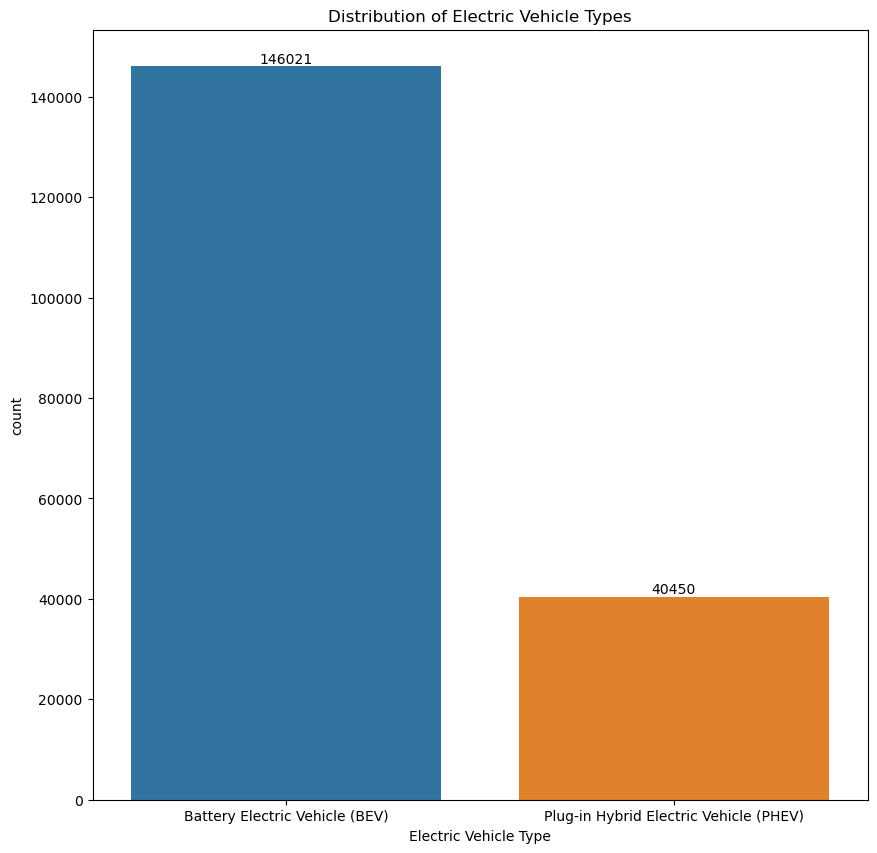

In [47]:
%matplotlib inline

#electric_type = electric_v['Electric Vehicle Type'].value_counts()
warnings.simplefilter(action='ignore', category=FutureWarning)
# Distribution of Electric Vehicle Types using countplot
plt.figure(figsize=(10,10))
plot = sns.countplot(data=electric_v, x='Electric Vehicle Type')

# adding labels to each bar which represent the corresponding values
plot.bar_label(plot.containers[0])
plt.title('Distribution of Electric Vehicle Types')
plt.show()

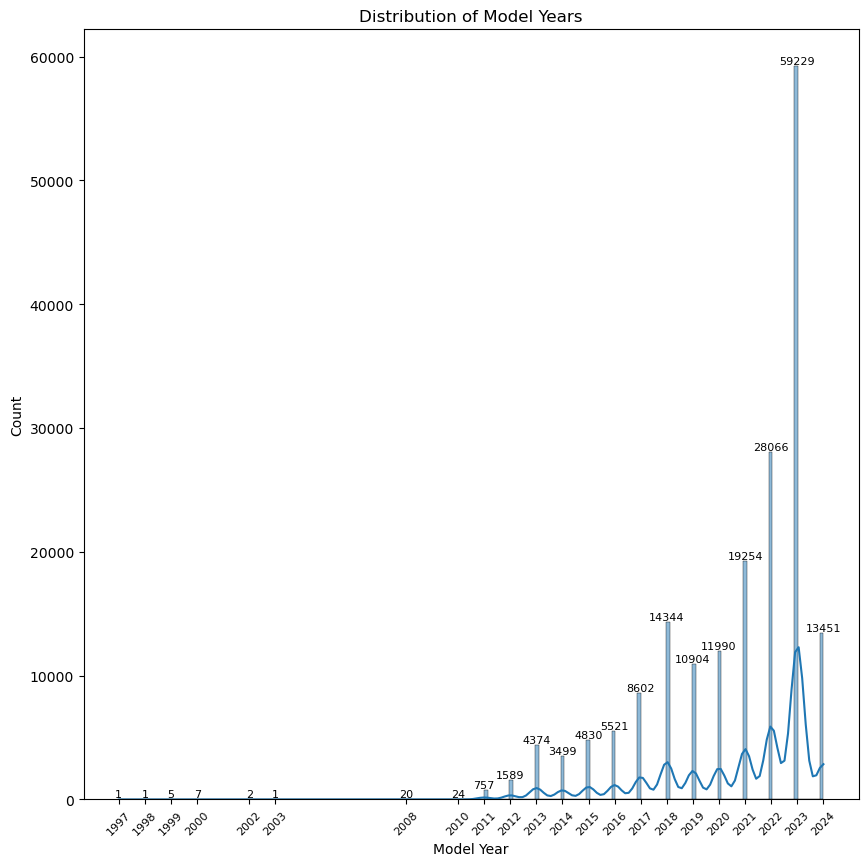

In [48]:


%matplotlib inline


plt.figure(figsize=(10,10))
sns.histplot(data=electric_v, x='Model Year', kde=True)
plt.title('Distribution of Model Years')

# Calculating the count with respect to each model year
year_count = electric_v['Model Year'].value_counts().sort_index()

# adding annotations (label) to each bar
for year, count in year_count.items():
    plt.text(year, count, str(count), ha='center', va='bottom', fontsize=8)

# customizing tick labels in the x-axis
plt.xticks(ticks=year_count.index, rotation=45, fontsize=8)

plt.show()

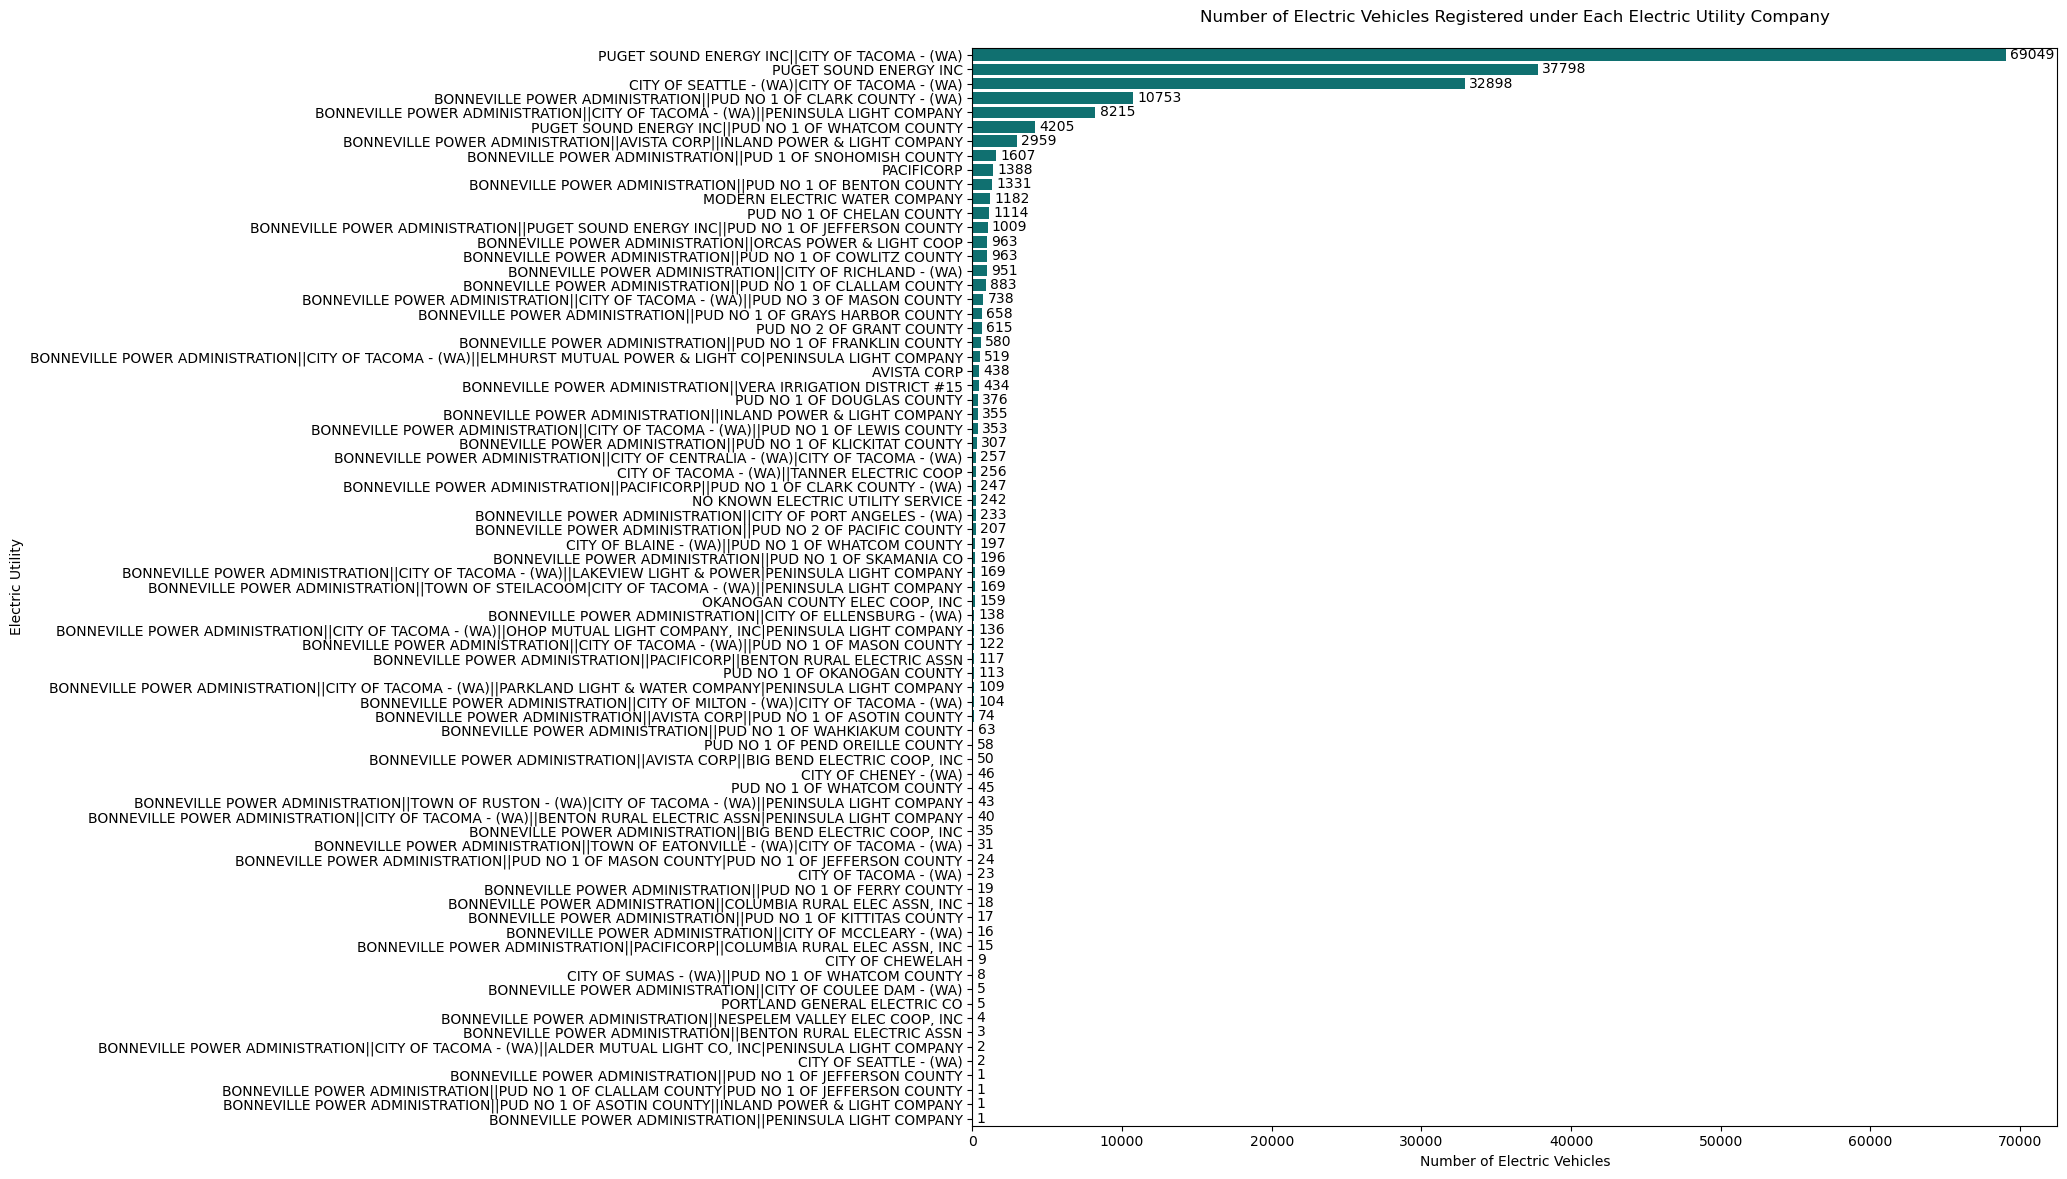

In [49]:
# Calculate the count of electric vehicles for each utility company
utility_counts = electric_v['Electric Utility'].value_counts().sort_values(ascending=False)

# Create a horizontal bar plot visualizing the utility company-wise vehicle count
plt.figure(figsize=(14, 14))
utility_barplot = sns.barplot(y=utility_counts.index, x=utility_counts.values, color="teal", order=utility_counts.index)

# Adding annotations (labels) to each bar as integers. Labels are placed at the edge of the bar
for utility_container in utility_barplot.containers:
    utility_barplot.bar_label(utility_container, fmt='%d', label_type='edge', padding=3, color='black', fontsize=10)

# Setting the plot title and x, y axis labels
plt.title('Number of Electric Vehicles Registered under Each Electric Utility Company\n')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Electric Utility')
plt.show()


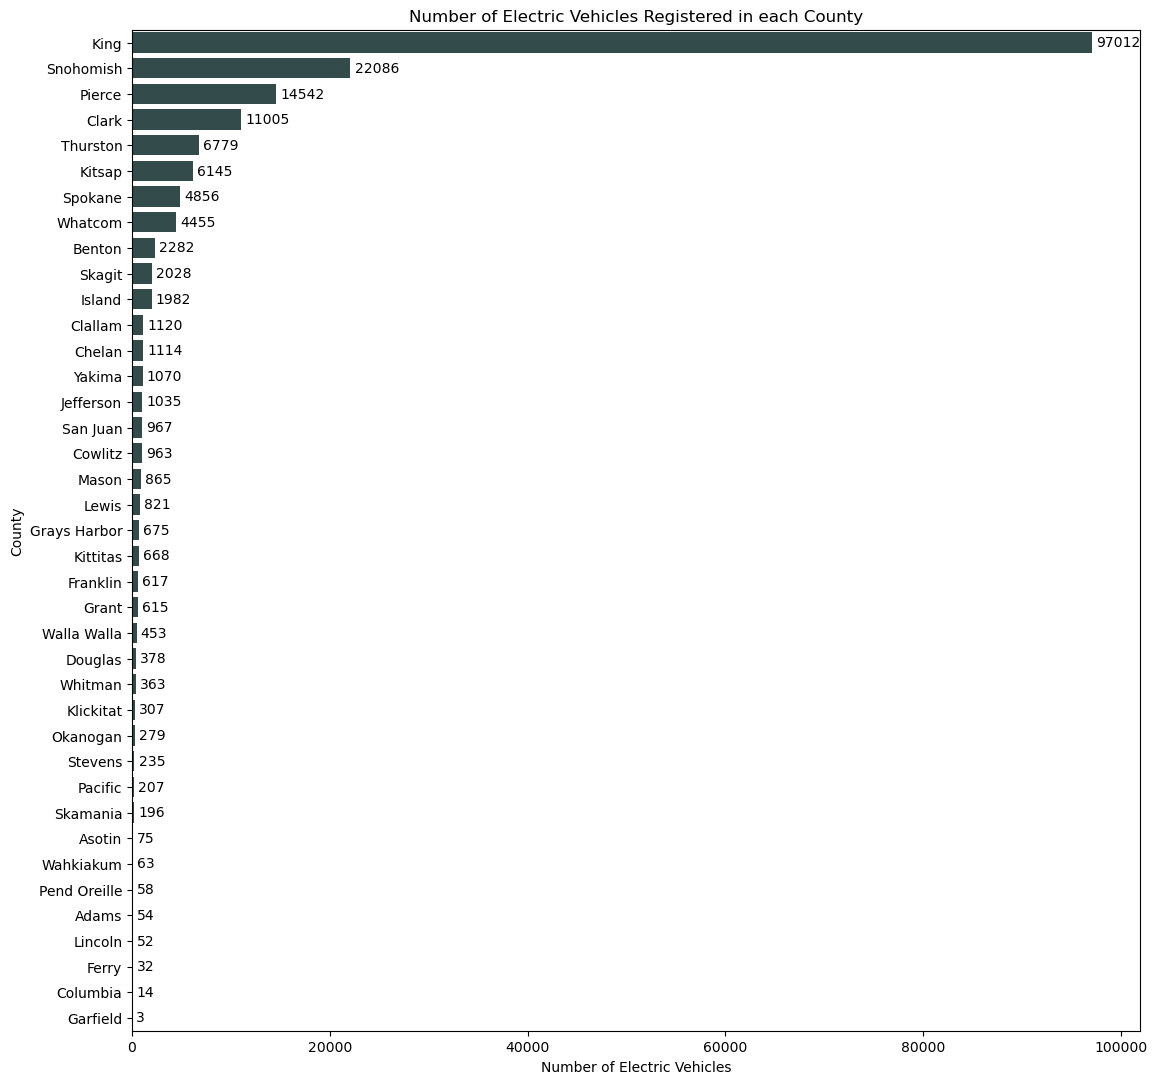

In [50]:
%matplotlib inline
# Calculate the count of electric vehicles in each county
county_counts = electric_v['County'].value_counts().sort_values(ascending=False)
#county_counts.columns = ['County', 'Count']

# Create a horizontal bar plot visualizing the county-wise vehicle count
plt.figure(figsize=(13, 13))
county_barplot = sns.barplot(y=county_counts.index, x= county_counts.values, color="darkslategrey", order=county_counts.index)

# Adding annotations (labels) to each bar as integers
for county_container in county_barplot.containers:
    county_barplot.bar_label(county_container, fmt='%d', label_type='edge', padding=3, color='black', fontsize=10)
    

# setting the plot title
# setting the x and y axis labels
plt.title('Number of Electric Vehicles Registered in each County')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()

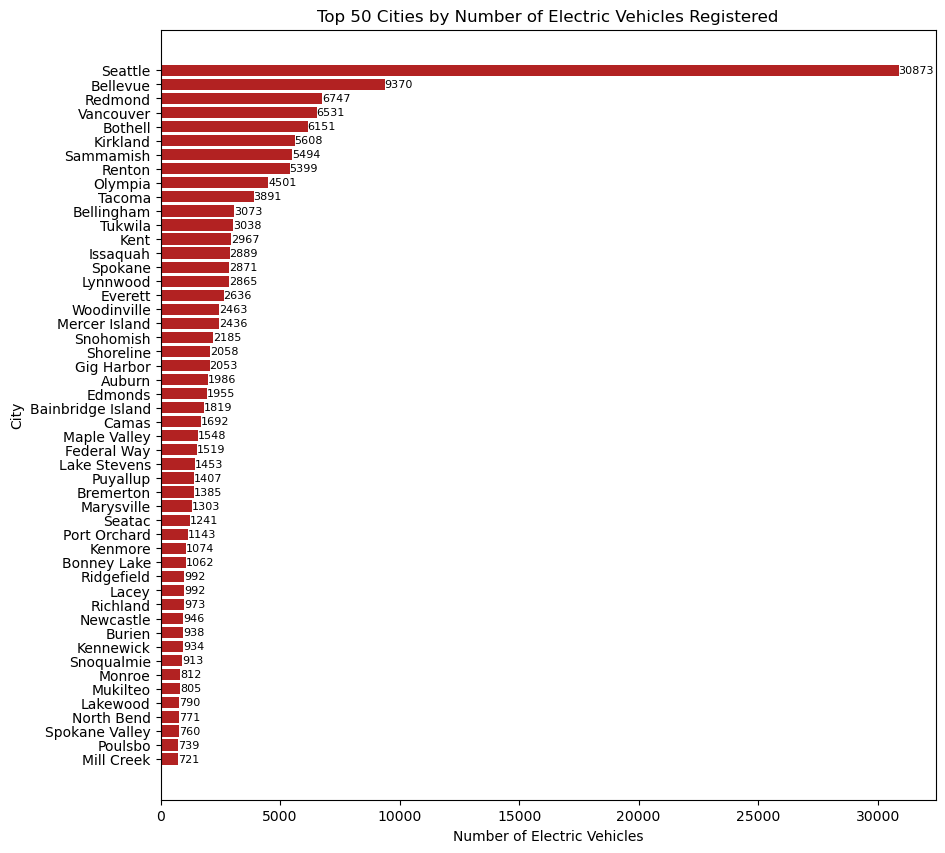

In [51]:
# Calculate the count of electric vehicles in each city
city_counts = electric_v['City'].value_counts().sort_values(ascending=False)

# Get the top 50 cities and sort it in descending order
top_city_counts = city_counts.head(50).sort_values()

# Plotting the top 50 cities using matplotlib
plt.figure(figsize=(10, 10))
plt.barh(top_city_counts.index, top_city_counts.values, color='firebrick')

# Adding annotations (labels) to each bar
for index, value in enumerate(top_city_counts.values):
    plt.text(value, index, f'{value}', va='center', ha='left', color='black', fontsize=8)

# Setting the plot title and x, y axis labels
plt.title('Top 50 Cities by Number of Electric Vehicles Registered')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')

# Display the plot
plt.show()

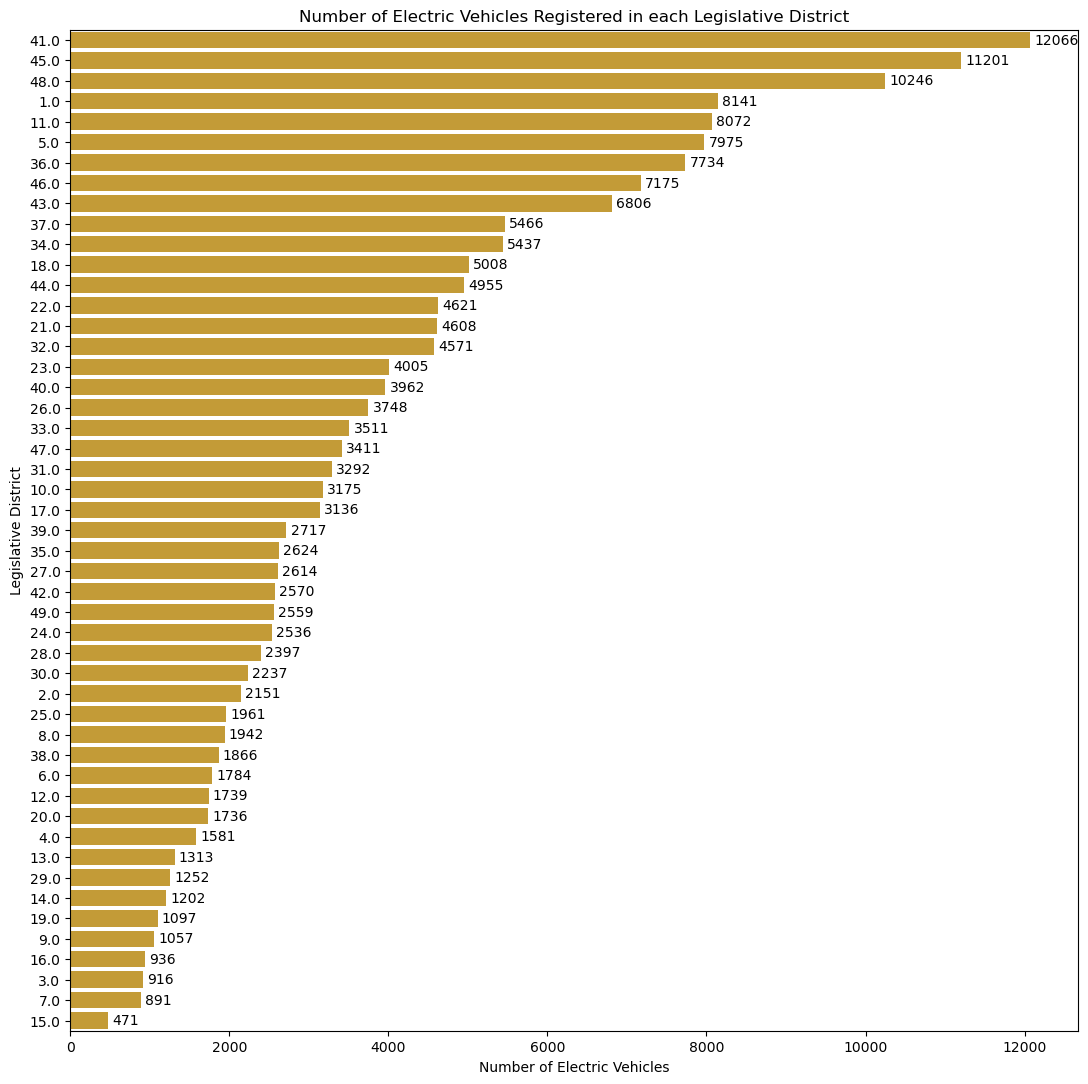

In [52]:
# Calculate the count of electric vehicles for each Legislative District
leg_dist_counts = electric_v['Legislative District'].value_counts()


# Create a horizontal bar plot for legislative district wise vehicle count
plt.figure(figsize=(13, 13))
leg_dist_barplot = sns.barplot(y=leg_dist_counts.index, x= leg_dist_counts.values, color="goldenrod", order=leg_dist_counts.index)

# Adding annotations (labels) to each bar as integers
for leg_dist_container in leg_dist_barplot.containers:
    leg_dist_barplot.bar_label(leg_dist_container, fmt='%d', color = 'black', label_type='edge', padding=3, fontsize=10)
    

plt.title('Number of Electric Vehicles Registered in each Legislative District')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Legislative District')
plt.show()

Bivariate Analysis

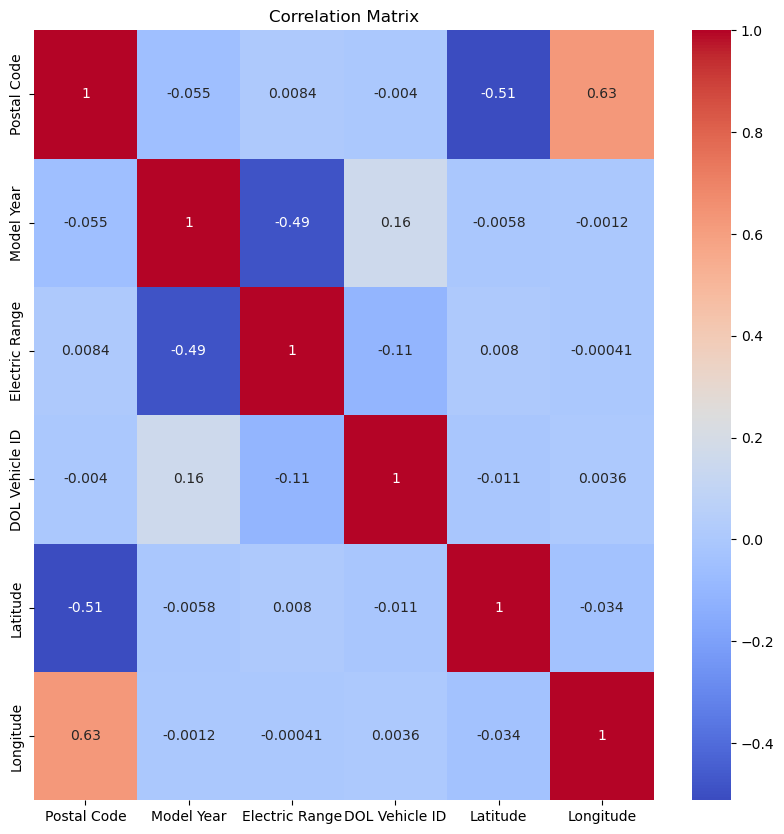

In [53]:
num_electric_v = electric_v.select_dtypes(include=['number'])
corr_matrix = num_electric_v.corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

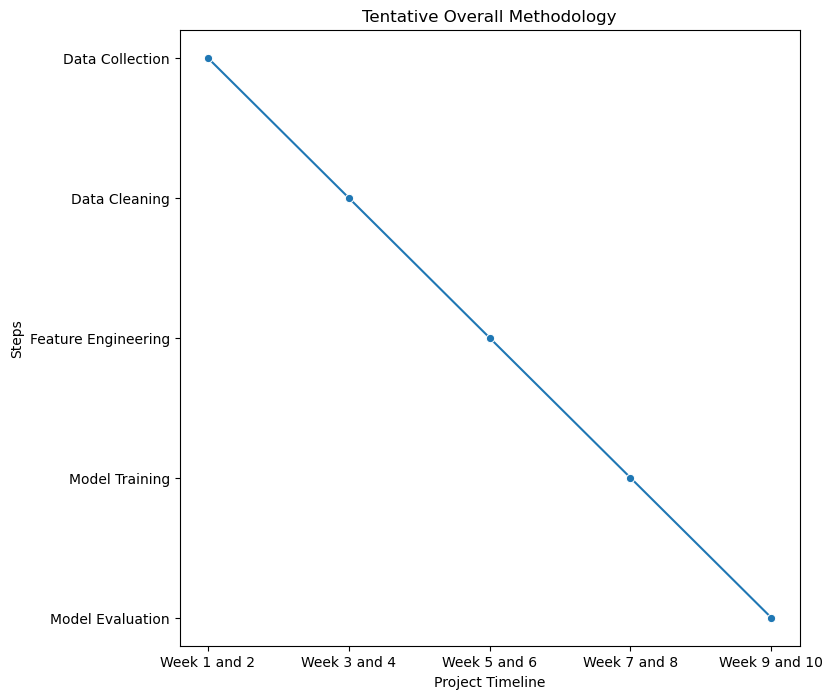

In [54]:
# Sample data for methodology graph
steps = ['Data Collection', 'Data Cleaning', 'Feature Engineering', 'Model Training', 'Model Evaluation']

timeline = ['Week 1 and 2', 'Week 3 and 4', 'Week 5 and 6', 'Week 7 and 8', 'Week 9 and 10']

plt.figure(figsize=(8, 8))
sns.lineplot(x=timeline, y=steps, marker='o')
plt.title('Tentative Overall Methodology')
plt.xlabel('Project Timeline')
plt.ylabel('Steps')
plt.show()


<p style="font-size:30px;"><b><u>Research Question No.1</u></b></p>

<p style="font-size:20px;"><b>Based on data collected from 2015 to 2023, which covers approximately 5% of Washington State's population, what are the primary factors influencing the decision to purchase BEVs and PHEVs in the state?</b></p>

**<u>STEP I</u>**

**Analyze and visualize the total count of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) by their model year to provide an insight into the trend of electric vehicle adoption over time.**

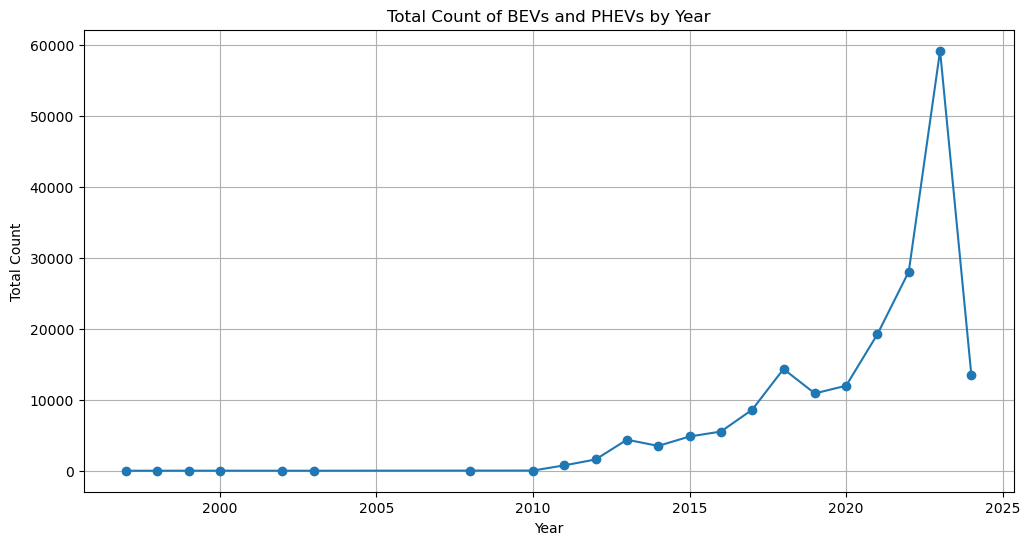

In [55]:
# creating a new dataframe by copying 'electric_v' dataset
electric_WA = electric_v

# Group by 'Model Year' and count the occurrences
yearly_counts = electric_WA.groupby('Model Year')['Electric Vehicle Type'].count().reset_index()

# Rename columns for clarity
yearly_counts.columns = ['Model Year', 'Total Count']

# Optionally, visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts['Model Year'], yearly_counts['Total Count'], marker='o')
plt.title('Total Count of BEVs and PHEVs by Year')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.grid(True)
plt.show()


The trend indicates growing acceptance and adoption of electric vehicles over the years, with significant growth in the last 9 years.

**<u>STEP II</u>**

**Using correlation to understand the dataset's structure and relationships before building predictive models, ensuring that the most relevant features are selected for further analysis.**

Correlation with target variable:
Postal Code      -0.084690
Model Year        0.189422
Electric Range    0.143285
DOL Vehicle ID    0.017626
Latitude          0.045268
Longitude        -0.023110
Name: EV_Type_Encoded, dtype: float64


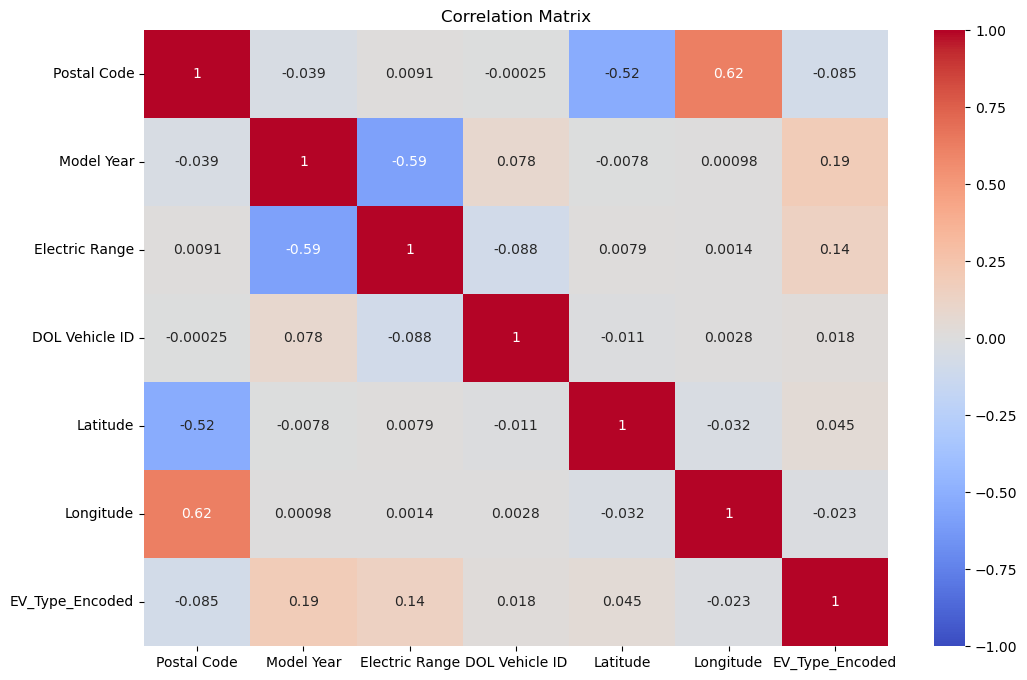

In [56]:
# importing the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Focusing the analysis on recent years where electric vehicle adoption trends are more relevant.
filtered_data = electric_WA[(electric_WA['Model Year'] >= 2015) & (electric_WA['Model Year'] <= 2023)].copy()

# apply a lambda function to each element in the Electric Vehicle Type column.
# The lambda function checks the value of each element (x). If the value is 'Battery Electric Vehicle (BEV)', it returns 1. Otherwise, it returns 0.
# the encoded data is then stored in a new column named 'EV_Type_Encoded'
filtered_data.loc[:, 'EV_Type_Encoded'] = filtered_data['Electric Vehicle Type'].apply(lambda x: 1 if x == 'Battery Electric Vehicle (BEV)' else 0)

# Select numerical features including the encoded target variable and store it in 'numerical_features' variable
numerical_features = filtered_data.select_dtypes(include=['int64', 'float64']).copy()
# adding the newly created EV_Type_Encoded column from the filtered_data DataFrame to the numerical_features DataFrame.
# This step is necessary to ensure that the target variable EV_Type_Encoded is included in the numerical_features DataFrame, which will be used for further analysis
numerical_features['EV_Type_Encoded'] = filtered_data['EV_Type_Encoded']

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# removing the 'EV_Type_Encoded' entry from this column, which is the correlation of the target variable with itself 
# The purpose of this line is to focus on how each numerical feature in the dataset correlates with the target variable, 
# which is essential for feature selection and understanding which features have the most influence on the target variable.
correlation_with_target = correlation_matrix['EV_Type_Encoded'].drop('EV_Type_Encoded')

# Display the correlations
print("Correlation with target variable:")
print(correlation_with_target)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


**<u>Interpretation</u>**

**Model Year** has the highest positive correlation (0.189591) with the target variable. This suggests that newer model years are somewhat associated with BEVs compared to PHEVs.

**Electric Range** also has a moderate positive correlation (0.143539), indicating that BEVs might have a higher electric range compared to PHEVs.

Postal Code, DOL Vehicle ID, Latitude, and Longitude show very weak correlations with the target variable.

**<u>STEP III</u>**

**Prepare the data for machine learning, perform feature selection, and identify the most important features for predicting whether an electric vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV).**

Top 50 Features by Random Forest:
                                               Feature  Importance
2                                       Electric Range    0.194500
703  Clean Alternative Fuel Vehicle (CAFV) Eligibil...    0.106242
702  Clean Alternative Fuel Vehicle (CAFV) Eligibil...    0.081302
552                                         Make_TESLA    0.059041
1                                           Model Year    0.049786
701  Clean Alternative Fuel Vehicle (CAFV) Eligibil...    0.035982
692                                         Model_VOLT    0.033117
554                                        Make_TOYOTA    0.032135
525                                      Make_CHRYSLER    0.022602
522                                           Make_BMW    0.020247
535                                          Make_JEEP    0.019935
650                                     Model_PACIFICA    0.019510
696                                           Model_X5    0.016716
639                         

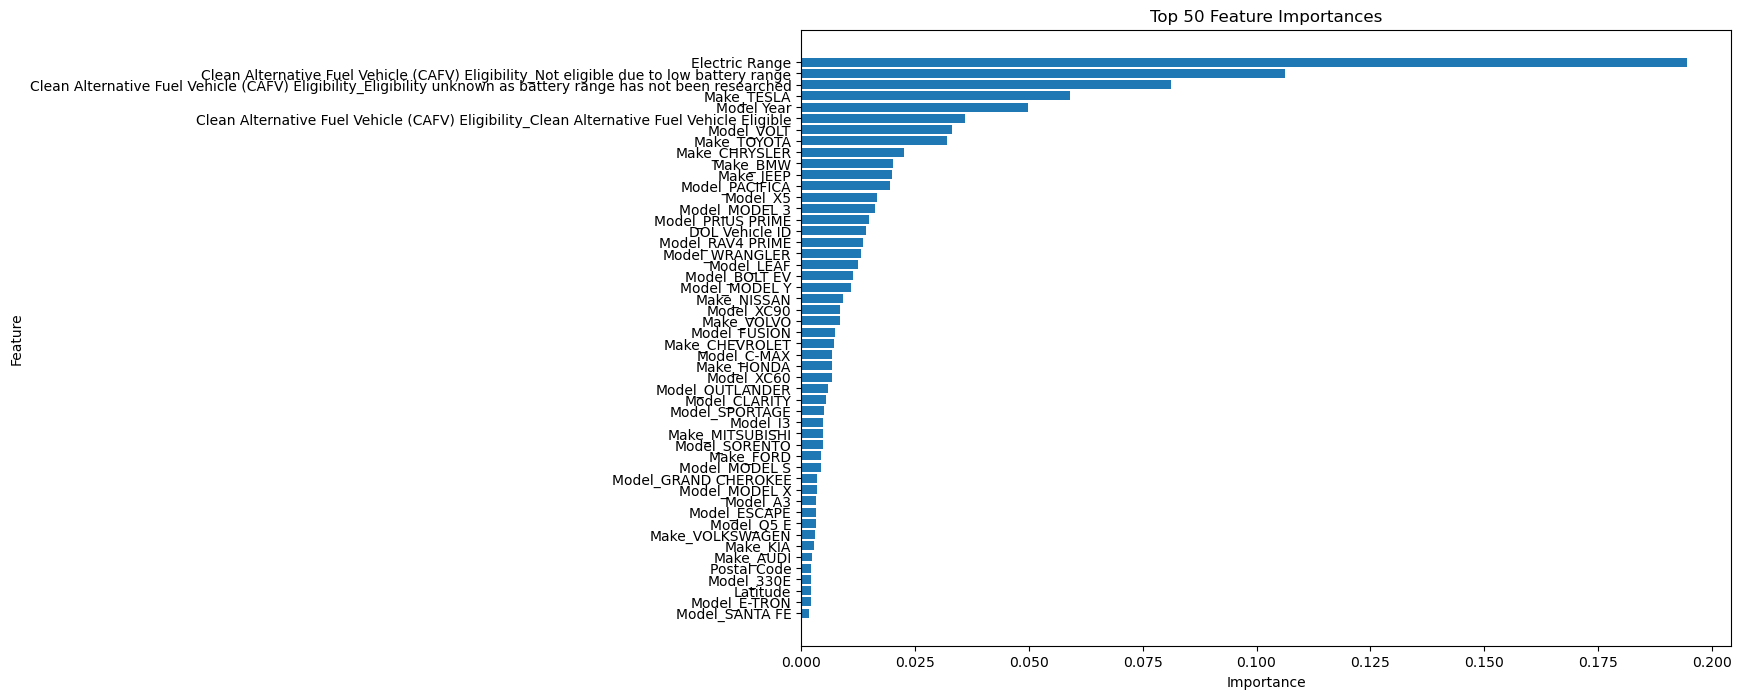

In [57]:

# perform one hot encoding to categorical columns. This will convert categorical data into a series of binary columns which is necessary for machine learning
encoded_data = pd.get_dummies(filtered_data.drop(columns=['EV_Type_Encoded', 'VIN (1-10)']), columns=['County', 'City', 'Make', 'Model', 
                                                      'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                                                      'Electric Utility', 'Legislative District', '2020 Census Tract'])

# Define the feature set and the target variable (independent and dependent variables)
X = encoded_data.drop(columns=['Electric Vehicle Type'])  # Features
y = filtered_data['EV_Type_Encoded']  # Target

# Ensure that all features are in a numeric format, which is required for most machine learning algorithms.
# Handle any non-numeric values gracefully by converting them to NaN,
X = X.apply(pd.to_numeric, errors='coerce')

# remove any columns from the DataFrame X that contain NaN values. 
# This ensures that only columns with fully numeric data are retained for further analysis and model training.
X = X.dropna(axis=1, how='any')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating Random Forest Classifier with 100 trees and a fixed random_state for Feature Selection
# 100 trees offer a good balance between achieving high performance and maintaining reasonable computational cost.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# training the model on the training data
rf.fit(X_train, y_train)

# storing important scores for each feature and storing it in descending order
importances = rf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Printing the top 50 features
print("Top 50 Features by Random Forest:")
print(feature_importances.head(50))

# creating a horizontal bar plot to visualize the importance scores of the top 50 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'].head(50), feature_importances['Importance'].head(50))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 50 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Selecting the top 50 features from Random Forest and are used for further feature selection with RFE
top_features = feature_importances.head(50)['Feature'].values
X_train_reduced = X_train[top_features]


**<u>Interpretation of the Top 50 Features</u>**

The output and the visualization provided show the top 50 features ranked by their importance scores as determined by the Random Forest classifier. Here are the key takeaways and interpretations from this output:

1. **Most Important Features:**
   - **Electric Range:** This feature has the highest importance score, indicating that the electric range of a vehicle is a critical factor in determining whether it is a BEV or PHEV.
   - **CAFV Eligibility:** Various categories of "Clean Alternative Fuel Vehicle (CAFV) Eligibility" are also highly important. This reflects the influence of policy and eligibility criteria on the type of electric vehicle.
   - **Make (Brand):** The make of the vehicle, particularly brands like Tesla, Toyota, BMW, Chrysler, and Jeep, are significant. This suggests that certain brands are more associated with BEVs or PHEVs.
   - **Model Year:** Newer models are more likely to be BEVs, as indicated by the importance of the model year.
   - **Specific Models:** Specific vehicle models like Volt, Pacifica, RAV4 Prime, Prius Prime, Model 3, and others show significant importance, suggesting a strong association with the type of electric vehicle.

2. **Policy and Infrastructure:**
   - **Clean Alternative Fuel Vehicle (CAFV) Eligibility:** The high importance of CAFV eligibility categories underscores the role of policies and incentives in influencing the adoption of BEVs and PHEVs.

3. **Geographical Influence:**
   - **2020 Census Tract and City (e.g., City_Tukwila):** These features, although lower in importance, still contribute to the model, indicating that location and possibly local policies or infrastructure can impact the type of electric vehicle adopted.

4. **Additional Factors:**
   - Features like **Latitude** and **Longitude** have lower importance but are still considered, suggesting that geographical location plays a role, though less significant compared to other factors.

**<u>STEP IV</u>**

**Perform feature selection, handle class imbalance, and prepare the data for machine learning model training**

This process is essential for building more accurate and reliable predictive models, as it focuses on the most relevant features and addresses class imbalance issues that can negatively impact model performance.

Top 20 Features by RFE:
                                              Feature  Ranking
0                                      Electric Range        1
45                                        Postal Code        1
47                                           Latitude        1
21                                        Make_NISSAN        1
20                                      Model_MODEL Y        1
18                                         Model_LEAF        1
17                                     Model_WRANGLER        1
15                                     DOL Vehicle ID        1
13                                      Model_MODEL 3        1
11                                     Model_PACIFICA        1
14                                  Model_PRIUS PRIME        1
9                                            Make_BMW        1
1   Clean Alternative Fuel Vehicle (CAFV) Eligibil...        1
8                                       Make_CHRYSLER        1
2   Clean Alternative Fuel Vehi

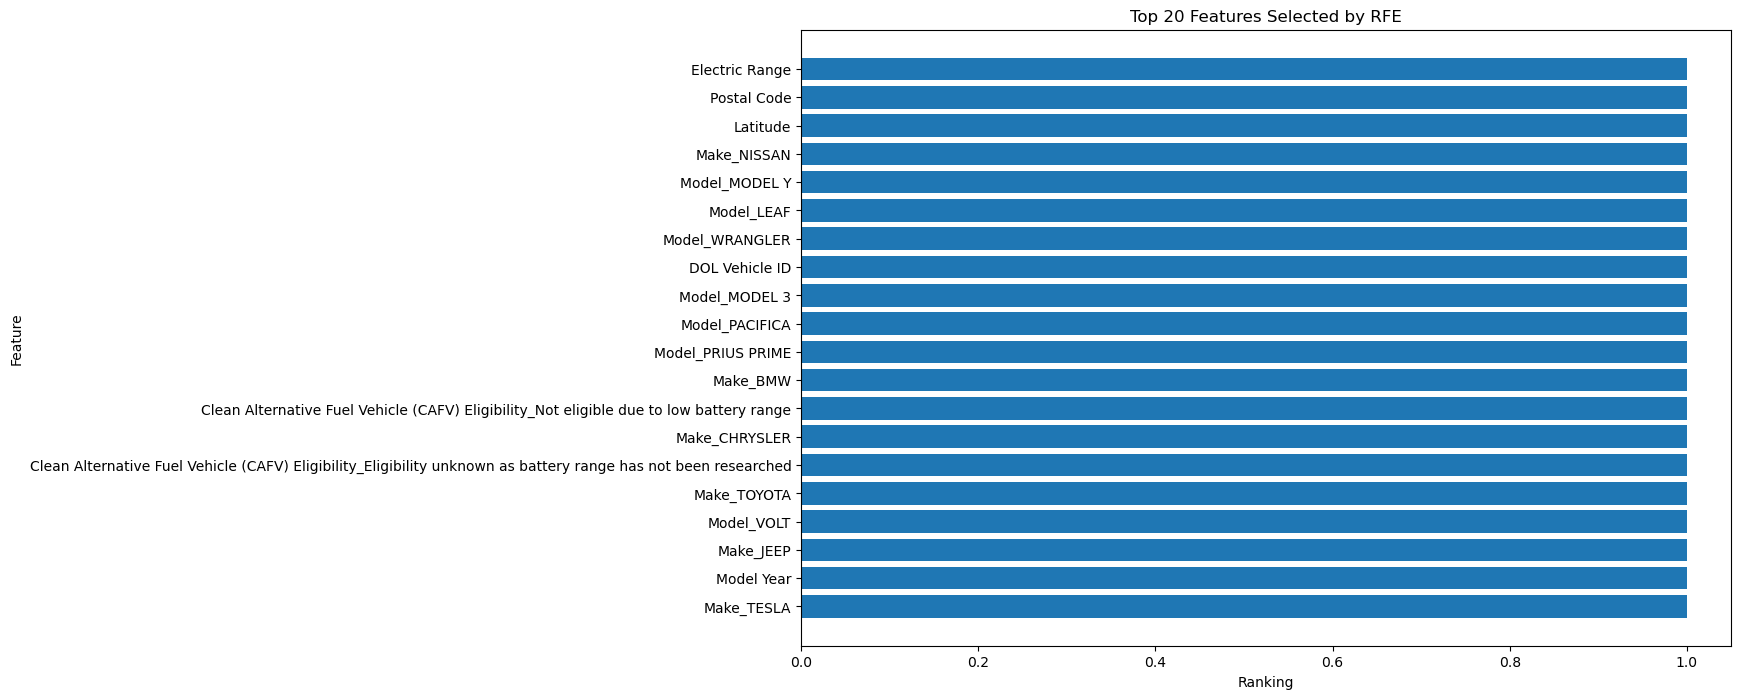

Original training set class distribution:
EV_Type_Encoded
1    105405
0     24787
Name: count, dtype: int64 

Balanced training set class distribution:
EV_Type_Encoded
1    105405
0    105405
Name: count, dtype: int64


In [58]:
# Initializing logistic regression model
model = LogisticRegression()

# Initializing RFE with the logistic regression model and specifying that we want the top 20 features
# Recursive Feature Elimination (RFE) is a feature selection technique that fits a model and removes the weakest feature (or features) 
# until the specified number of features is reached. 
rfe = RFE(model, n_features_to_select=20)

# This fits the RFE model to the reduced training set. 
# During this process, RFE recursively removes the least important features and refits the model until only the specified number of features (20 in this case) remains.
rfe.fit(X_train_reduced, y_train)

# This retrieves the feature ranking produced by RFE.
# Features with a ranking of 1 are selected, while higher rankings indicate less important features.
rfe_ranking = rfe.ranking_

# Create a DataFrame containing the feature names and their corresponding rankings, sorted by the ranking.
rfe_features = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Ranking': rfe_ranking
}).sort_values(by='Ranking')

# print the top 20 features
print("Top 20 Features by RFE:")
print(rfe_features.head(20))

# plotting the top 20 features based on their ranking using a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(rfe_features['Feature'].head(20), rfe_features['Ranking'].head(20))
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Top 20 Features Selected by RFE')
plt.gca().invert_yaxis()
plt.show()

# Select the top 20 features based on RFE rankings.
selected_features = rfe_features.head(20)['Feature'].values

# reduce the training sets to these selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Check the class distribution in the original training set
print("Original training set class distribution:")
print(y_train.value_counts(),"\n")

# Uses SMOTE to generate synthetic samples for the minority class to balance the class distribution in the training set.
# SMOTE generates synthetic samples for the minority class to balance the class distribution. 
# This helps improve the performance of machine learning models, which can struggle with imbalanced datasets.
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_rfe, y_train)

# Check the class distribution in the balanced training set
print("Balanced training set class distribution:")
print(y_train_balanced.value_counts())




**<u>Interpretation</u>**

The output and plot provide valuable insights into the features that are most important for classifying electric vehicles as BEVs or PHEVs, based on the Recursive Feature Elimination (RFE) process. Here’s a detailed interpretation:

**<u>Top 20 Features by RFE</u>**

The table lists the top 20 features identified by RFE as the most important for the classification task. All features in the table have a ranking of 1, indicating they are the most important features according to the RFE process.

**Key Features:**

1. **Electric Range:** This feature appears at the top of the list, indicating it is crucial in distinguishing between BEVs and PHEVs. BEVs typically have a longer electric range compared to PHEVs.
   
2. **Vehicle Models:**
   - **Model_BOLT EV, Model_MODEL Y, Model_LEAF, Model_MODEL 3, Model_WRANGLER, Model_PRIUS PRIME, Model_MODEL S, Model_PACIFICA, Model_VOLT:** These specific vehicle models are significant, suggesting that certain models are more likely to be BEVs or PHEVs.
   
3. **Vehicle Makes:**
   - **Make_JEEP, Make_BMW, Make_TOYOTA, Make_TESLA, Make_CHRYSLER, Make_NISSAN:** These vehicle brands are significant, indicating that some brands are more associated with BEVs or PHEVs.
   
4. **CAFV Eligibility:**
   - **Clean Alternative Fuel Vehicle (CAFV) Eligibility:** Different categories of CAFV eligibility are crucial, reflecting the impact of policy and eligibility criteria on the type of electric vehicle.
   
5. **Model Year:** Newer model years are more likely to be BEVs, reflecting the recent market trend towards electric vehicles.

**<u>Class Distribution</u>**

**Original Training Set Class Distribution:**
   - **BEVs (1):** 105,648
   - **PHEVs (0):** 24,837

This indicates a significant class imbalance, with BEVs being much more common in the dataset compared to PHEVs.

**Balanced Training Set Class Distribution:**
   - **BEVs (1):** 105,648
   - **PHEVs (0):** 105,648

After applying SMOTE (Synthetic Minority Over-sampling Technique), the training set is balanced, with an equal number of BEVs and PHEVs. This balancing helps to improve the performance of machine learning models by providing them with an equal representation of both classes.

**<u>Visualization of Top 20 Features</u>**

The horizontal bar chart visualizes the top 20 features selected by RFE. All features have a ranking of 1, emphasizing their equal importance in the model.

**<u>Summary</u>**

- **Feature Importance:** The identified top 20 features are crucial for distinguishing between BEVs and PHEVs. Electric range, specific vehicle models and makes, CAFV eligibility, and model year are among the most significant features.
  
- **Class Imbalance:** The original training set had a significant imbalance, with more BEVs than PHEVs. SMOTE was applied to balance the classes, ensuring equal representation of both BEVs and PHEVs in the training set.

- **Model Preparation:** These top 20 features will be used to train machine learning models, ensuring that the models focus on the most relevant features, which should improve their performance.


**<u>STEP V</u>**

**Perform hyperparameter tuning, train, and evaluate Logistic Regression and Random Forest models on the balanced training set, and then visualize and interpret the results.**

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


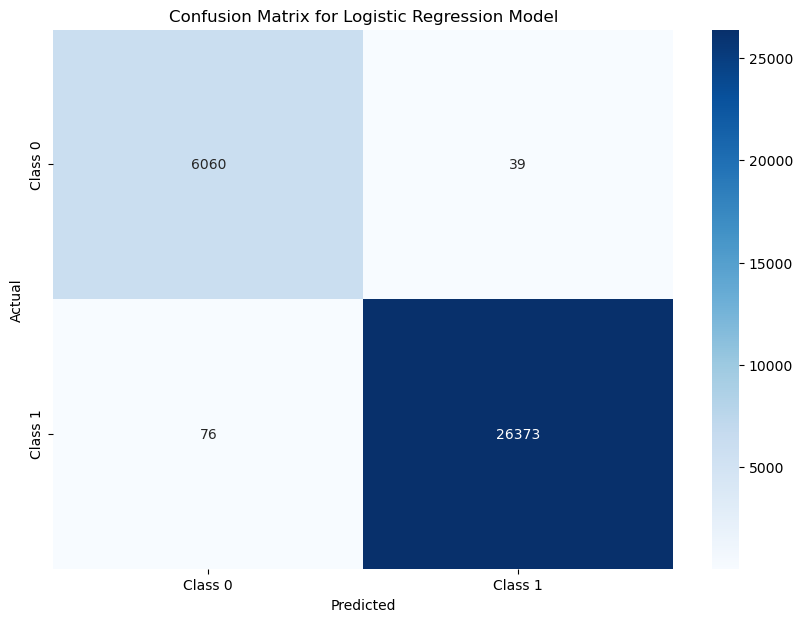

Logistic Regression Model with SMOTE and Hyperparameter Tuning
Accuracy: 0.9964667567899718
Logistic Regression Coefficients
                                              Feature   Coefficient
14  Clean Alternative Fuel Vehicle (CAFV) Eligibil...  1.852602e+01
5                                          Model_LEAF  2.897394e+00
3                                         Make_NISSAN  3.313733e-01
0                                      Electric Range  1.208646e-01
8                                       Model_MODEL 3  0.000000e+00
17                                          Make_JEEP  0.000000e+00
10                                  Model_PRIUS PRIME  0.000000e+00
6                                      Model_WRANGLER  0.000000e+00
4                                       Model_MODEL Y  0.000000e+00
19                                         Make_TESLA  0.000000e+00
7                                      DOL Vehicle ID -1.206818e-09
1                                         Postal Code -2.75

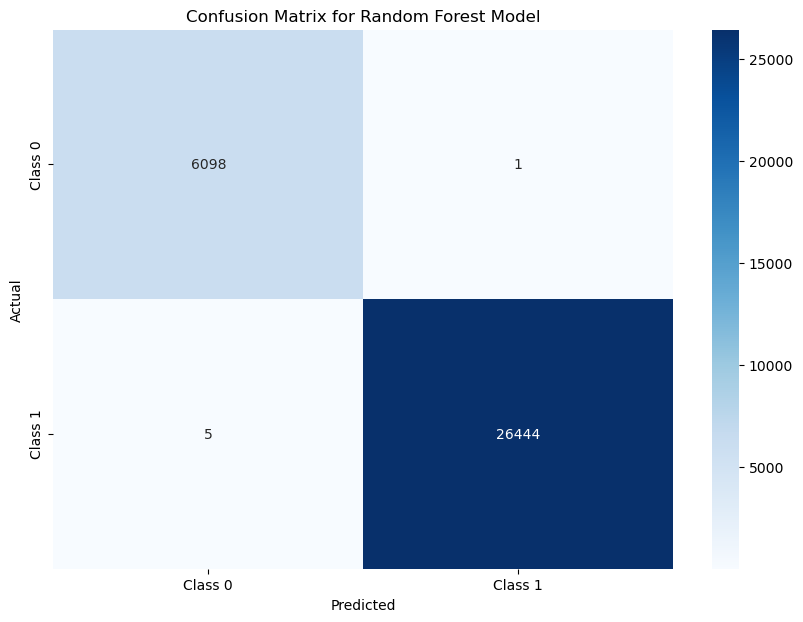

Random Forest Model with SMOTE
Accuracy: 0.9998156568759985
Random Forest Feature Importances
                                              Feature  Importance
0                                      Electric Range    0.337910
12  Clean Alternative Fuel Vehicle (CAFV) Eligibil...    0.185781
14  Clean Alternative Fuel Vehicle (CAFV) Eligibil...    0.149255
19                                         Make_TESLA    0.122137
11                                           Make_BMW    0.026290
8                                       Model_MODEL 3    0.025017
15                                        Make_TOYOTA    0.024516
18                                         Model Year    0.023646
5                                          Model_LEAF    0.017647
13                                      Make_CHRYSLER    0.016793
16                                         Model_VOLT    0.016563
4                                       Model_MODEL Y    0.014782
9                                      Model_PAC

In [59]:
# Hyperparameter Tuning for Logistic Regression to find the optimal hyperparameters for your logistic regression model
# defining a grid of hyperparameters to search over
''' 
The parameter C controls the strength of regularization applied to the logistic regression model. Prevent Overfitting
High Values of C: Implies less regularization. Low Values of C: Implies stronger regularization. 

Choosing the type of regularization (l1 or l2) affects how the model coefficients are penalized and can influence both model accuracy and interpretability.

liblinear is often a good default for small datasets or when both l1 and l2 regularization are required.
'''
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
# Performing cross-validation to find the best combination of hyperparameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
# Fits the grid search to the balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# printing the best parameters for Logistic Regression
print("Best parameters for Logistic Regression:", grid_search.best_params_)

# Initializing the logistic regression model with the best parameters found by the grid search.
logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])
# Trains the logistic regression model on the balanced training set
logreg.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the trained logistic regression model.
y_pred_logreg = logreg.predict(X_test_rfe)

# Create the confusion matrix for logistic regression model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Evaluate the model
# Calculate and print the accuracy for the logistic regression model.
print("Logistic Regression Model with SMOTE and Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
#print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Extracts and displays the coefficients of the logistic regression model to understand the importance and impact of each feature.
coefficients = pd.DataFrame({
    'Feature': selected_features,
    # Retrieves the coefficients from the trained logistic regression model.
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# printing the coefficients from logistic regression
print("Logistic Regression Coefficients")
print(coefficients)

# Initializing Random Forest Model with SMOTEusing 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# traing the random forest classifier on the SMOTE balanced training set
rf_model.fit(X_train_balanced, y_train_balanced)

# make predictions on the test set using random forest model
y_pred_rf = rf_model.predict(X_test_rfe)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Extracts and displays the feature importances from the random forest model
print("Random Forest Model with SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
#print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Random Forest Feature Importances
rf_importances = pd.DataFrame({
    'Feature': selected_features,
    # Retrieves the feature importances from the trained random forest model.
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# printing the importances from random forest model
print("Random Forest Feature Importances")
print(rf_importances)

# Evaluate stability of the random forest model
# Performs 5-fold cross-validation on the balanced training set
# Calculates the mean cross-validation score.
cv_scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5)
print("Random Forest Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

The output and the confusion matrices from both the Logistic Regression and Random Forest models indicate the following:

**<u>Logistic Regression Model with SMOTE and Hyperparameter Tuning</u>**

**Best Parameters:**
- C: 0.1
- Penalty: l1
- Solver: liblinear

**Performance Metrics:**
- **Accuracy:** 0.996
- **Confusion Matrix:**
  - True Positives (Class 1 correctly predicted): 26373
  - True Negatives (Class 0 correctly predicted): 6060
  - False Positives (Class 1 incorrectly predicted as Class 0): 39
  - False Negatives (Class 0 incorrectly predicted as Class 1): 76

**Feature Coefficients:**
The coefficients provide insight into the relationship between each feature and the likelihood of an observation being classified as a Battery Electric Vehicle (BEV). Positive coefficients indicate that as the feature value increases, the likelihood of being a BEV increases, while negative coefficients indicate the opposite.

**<u>Random Forest Model with SMOTE</u>**

**Performance Metrics:**
- **Accuracy:** 0.999
- **Confusion Matrix:**
  - True Positives (Class 1 correctly predicted): 26444
  - True Negatives (Class 0 correctly predicted): 6098
  - False Positives (Class 1 incorrectly predicted as Class 0): 1
  - False Negatives (Class 0 incorrectly predicted as Class 1): 5

**Feature Importances:**
The feature importances show how much each feature contributes to the prediction of the target variable. Higher importance values indicate that the feature is more influential in making predictions.

**Cross-Validation Scores:**
The cross-validation scores provide an estimate of the model's performance on unseen data. The scores are consistently high, indicating that the model is likely to perform well on new data.

**<u>Interpretation</u>**

**Logistic Regression:**
- The logistic regression model has a high accuracy of 99.6%, indicating that it is very good at predicting the class labels.
- The confusion matrix shows that the model has a slightly higher number of false negatives (76) and false positives (39) compared to the Random Forest model.
- The feature coefficients highlight that "Clean Alternative Fuel Vehicle (CAFV) Eligibility" and "Electric Range" are significant predictors.

**Random Forest:**
- The random forest model has an even higher accuracy of 99.98%, indicating near-perfect performance.
- The confusion matrix shows very few misclassifications, with only 5 false negatives and 1 false positive.
- The feature importances suggest that "Electric Range" and "Clean Alternative Fuel Vehicle (CAFV) Eligibility" are the most important features, similar to the logistic regression model.

Overall, both models perform exceptionally well, with the Random Forest model showing slightly better performance. The significant features identified by both models can be used to understand the primary factors influencing the decision to purchase BEVs and PHEVs in Washington State.

<p style="font-size:30px;"><b><u>Research Question No.2</u></b></p>

<p style="font-size:20px;"><b>Can we use machine learning to predict the number of new electric vehicle adopters over the next ten years in Washington State, based on detailed data about residents' geographic locations and the availability of infrastructural facilities, such as electric utility stations?</b></p>

<u>STEP I</u>

<b>Feature Engineering</b>

In [60]:
# importing 'pandas' library
import pandas as pd

In [61]:
# create a new variable named 'elec_veh_data' and assigning it the same DataFrame that is currently stored in the variable 'electric_v'
# will be using 'elec_veh_data' for further analysis for research question no.2

elec_veh_data = electric_v

# Convert 'Model Year' to datetime and extract the year
elec_veh_data['Year'] = pd.to_datetime(elec_veh_data['Model Year'], format='%Y').dt.year

# defining a function named 'group_data' to group data by year and different geographical/utility attributes
def group_data(df, vehicle_type, group_by, new_col_name):
    return df[df['Electric Vehicle Type'] == vehicle_type].groupby(['Year', group_by])['DOL Vehicle ID'].count().reset_index(name=new_col_name)

#applying the group_data function to extract the city-wise, county-wise, Legislative District-wise and Electric Utility-wise BEVs
bevs_per_year_county = group_data(elec_veh_data, 'Battery Electric Vehicle (BEV)', 'County', 'County_BEVs_per_year')
bevs_per_year_city = group_data(elec_veh_data, 'Battery Electric Vehicle (BEV)', 'City', 'City_BEVs_per_year')
bevs_per_year_leg_dist = group_data(elec_veh_data, 'Battery Electric Vehicle (BEV)', 'Legislative District', 'Leg_Dist_BEVs_per_year')
bevs_per_year_elec_utility = group_data(elec_veh_data, 'Battery Electric Vehicle (BEV)', 'Electric Utility', 'Elec_Util_BEVs_per_year')

#applying the group_data function to extract the city-wise, county-wise, Legislative District-wise and Electric Utility-wise PHEVs
phevs_per_year_county = group_data(elec_veh_data, 'Plug-in Hybrid Electric Vehicle (PHEV)', 'County', 'County_PHEVs_per_year')
phevs_per_year_city = group_data(elec_veh_data, 'Plug-in Hybrid Electric Vehicle (PHEV)', 'City', 'City_PHEVs_per_year')
phevs_per_year_leg_dist = group_data(elec_veh_data, 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Legislative District', 'Leg_Dist_PHEVs_per_year')
phevs_per_year_elec_utility = group_data(elec_veh_data, 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Electric Utility', 'Elec_Util_PHEVs_per_year')

# combining the county-wise, city-wise, legislative district-wise and electric utility-wise data for better integrated analysis and simplifying the process

# Merge data on Year and County
combined_county = pd.merge(bevs_per_year_county, phevs_per_year_county, on=['Year', 'County'], how='outer')

# Merge data on Year and City
combined_city = pd.merge(bevs_per_year_city, phevs_per_year_city, on=['Year', 'City'], how='outer')

# Merge data on Year and Legislative District
combined_leg_dist = pd.merge(bevs_per_year_leg_dist, phevs_per_year_leg_dist, on=['Year', 'Legislative District'], how='outer')

# Merge data on Year and Electric Utility
combined_elec_utility = pd.merge(bevs_per_year_elec_utility, phevs_per_year_elec_utility, on=['Year', 'Electric Utility'], how='outer')

# Fill NaN values with 0 for numerical columns only using '.loc'
combined_county.loc[:, ['County_BEVs_per_year', 'County_PHEVs_per_year']] = combined_county.loc[:, ['County_BEVs_per_year', 'County_PHEVs_per_year']].fillna(0)
combined_city.loc[:, ['City_BEVs_per_year', 'City_PHEVs_per_year']] = combined_city.loc[:, ['City_BEVs_per_year', 'City_PHEVs_per_year']].fillna(0)
combined_leg_dist.loc[:, ['Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year']] = combined_leg_dist.loc[:, ['Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year']].fillna(0)
combined_elec_utility.loc[:, ['Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year']] = combined_elec_utility.loc[:, ['Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year']].fillna(0)

# Convert data types of each column for consistency
combined_county = combined_county.astype({'Year': 'int32', 'County_BEVs_per_year': 'int64', 'County_PHEVs_per_year': 'int64'})
combined_city = combined_city.astype({'Year': 'int32', 'City_BEVs_per_year': 'int64', 'City_PHEVs_per_year': 'int64'})
combined_leg_dist = combined_leg_dist.astype({'Year': 'int32', 'Leg_Dist_BEVs_per_year': 'int64', 'Leg_Dist_PHEVs_per_year': 'int64'})
combined_elec_utility = combined_elec_utility.astype({'Year': 'int32', 'Elec_Util_BEVs_per_year': 'int64', 'Elec_Util_PHEVs_per_year': 'int64'})


<u>STEP II</u>

<b>Validating the new variables: Descriptive Statistics</b>

In [62]:
# printing the summary statistics of each data
print("Summary statistics of county data:")
print(combined_county.describe(),"\n\n")

print("Summary statistics of city data:")
print(combined_city.describe(),"\n\n")

print("Summary statistics of legislative district data:")
print(combined_leg_dist.describe(), "\n\n")

print("Summart statistics of electric utility data:")
print(combined_elec_utility.describe(), "\n\n")

Summary statistics of county data:
              Year  County_BEVs_per_year  County_PHEVs_per_year
count   858.000000            858.000000             858.000000
mean   2011.909091            170.187646              47.144522
std       8.495102           1202.220650             224.309973
min    1997.000000              0.000000               0.000000
25%    2003.000000              0.000000               0.000000
50%    2013.500000              3.000000               1.000000
75%    2019.000000             38.000000              17.000000
max    2024.000000          28227.000000            3923.000000 


Summary statistics of city data:
               Year  City_BEVs_per_year  City_PHEVs_per_year
count  10406.000000        10406.000000          10406.00000
mean    2011.909091           14.032385              3.88718
std        8.490558          124.065485             26.80212
min     1997.000000            0.000000              0.00000
25%     2003.000000            0.000000         

Visualize Data Distribution

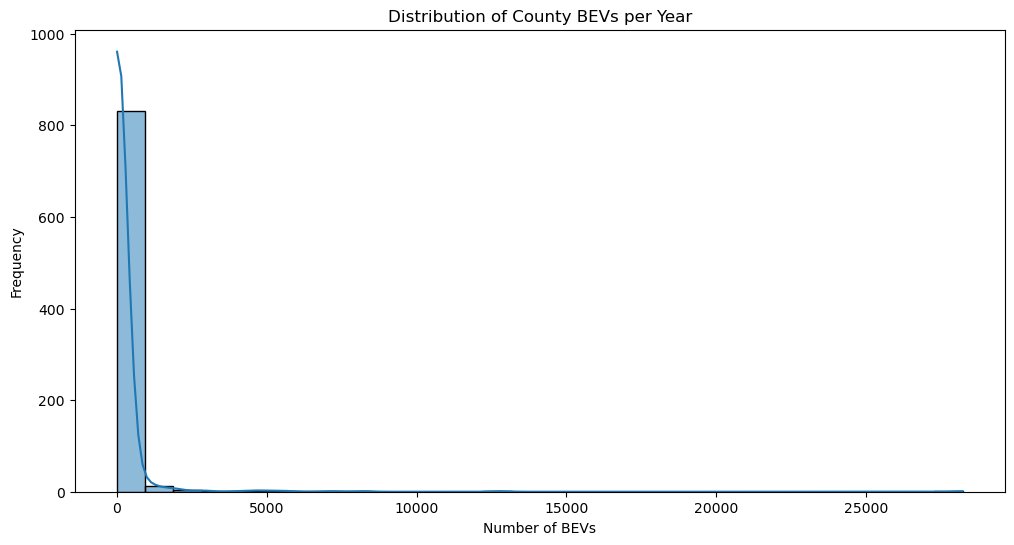

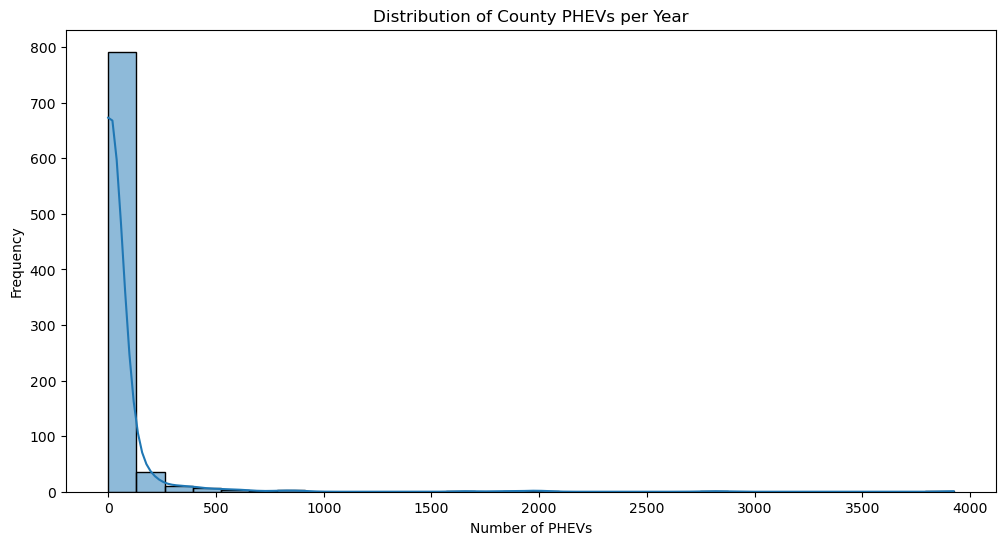

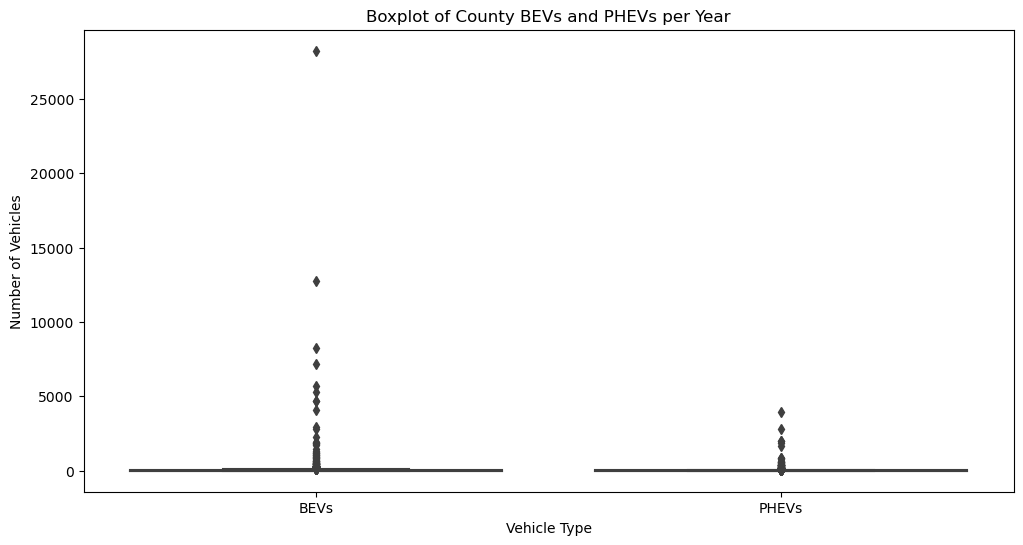

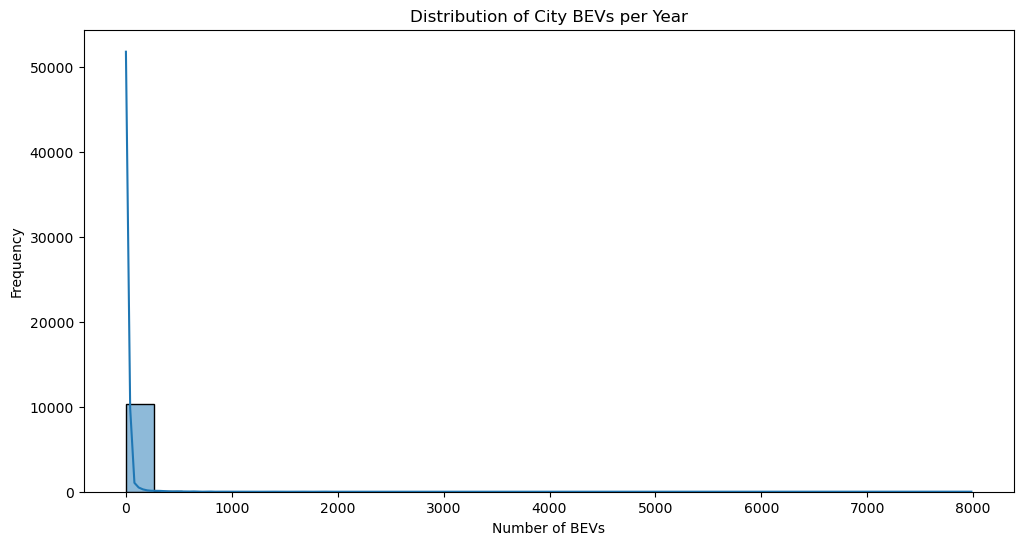

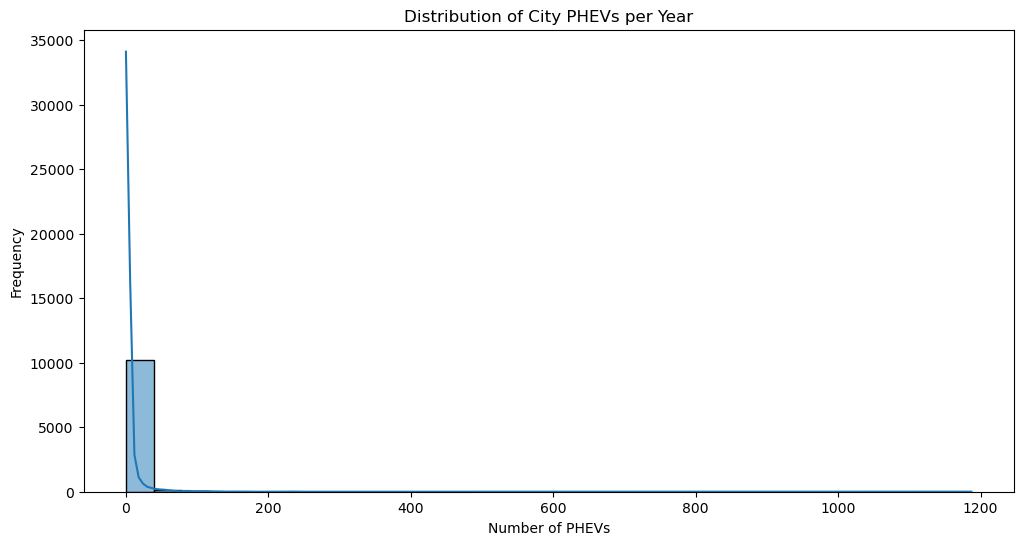

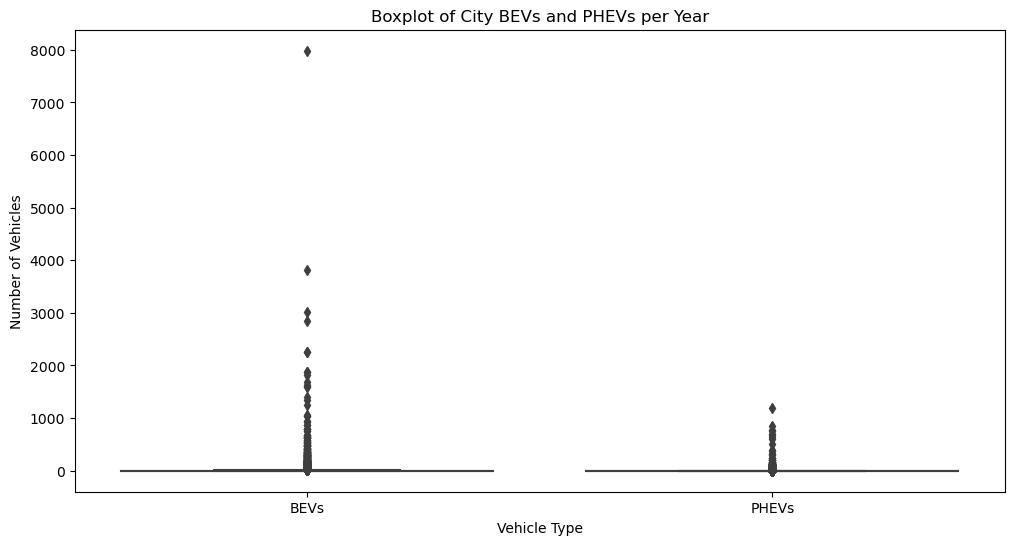

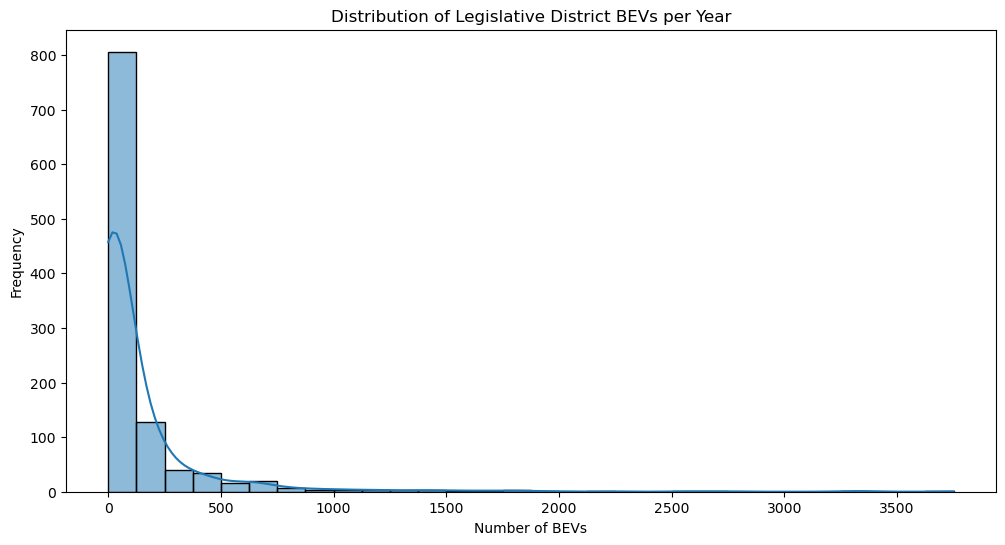

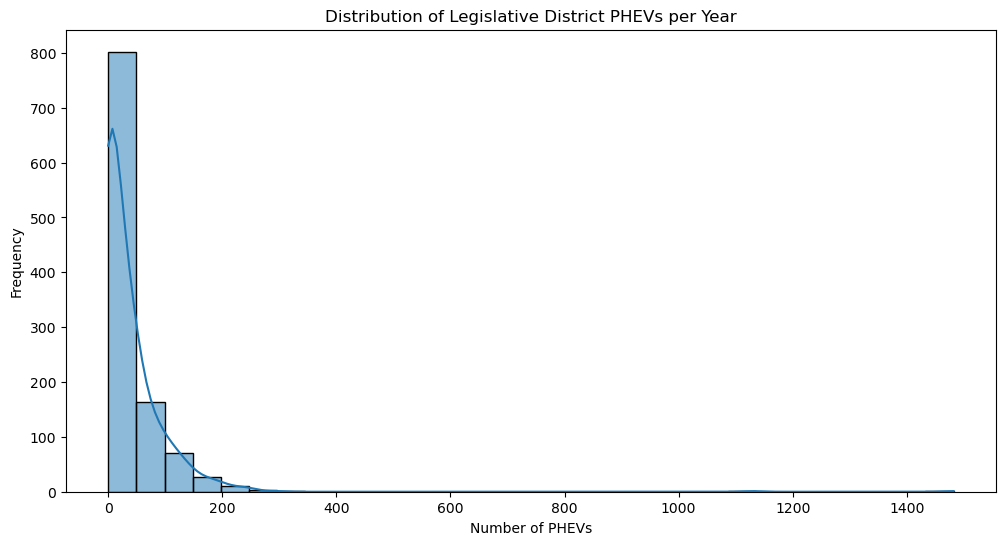

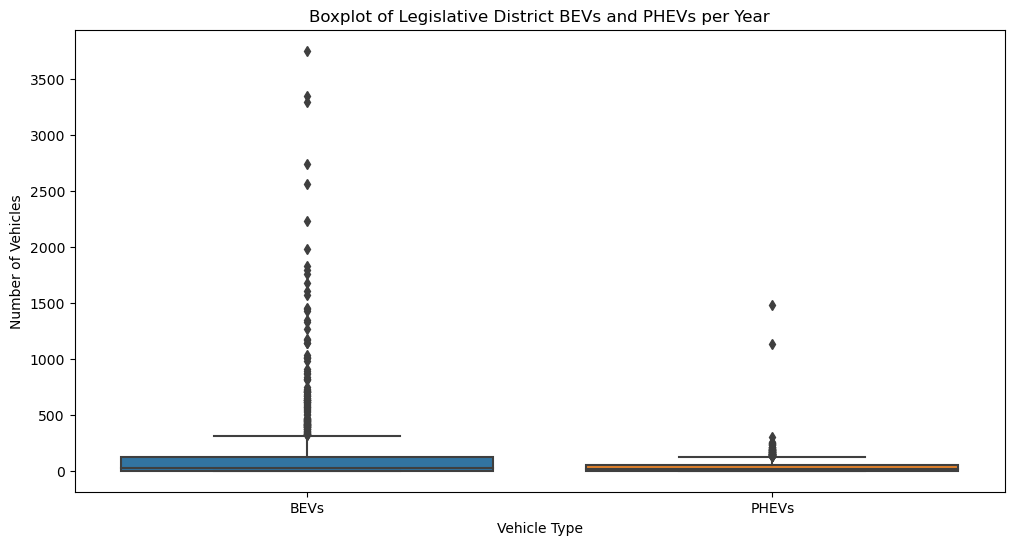

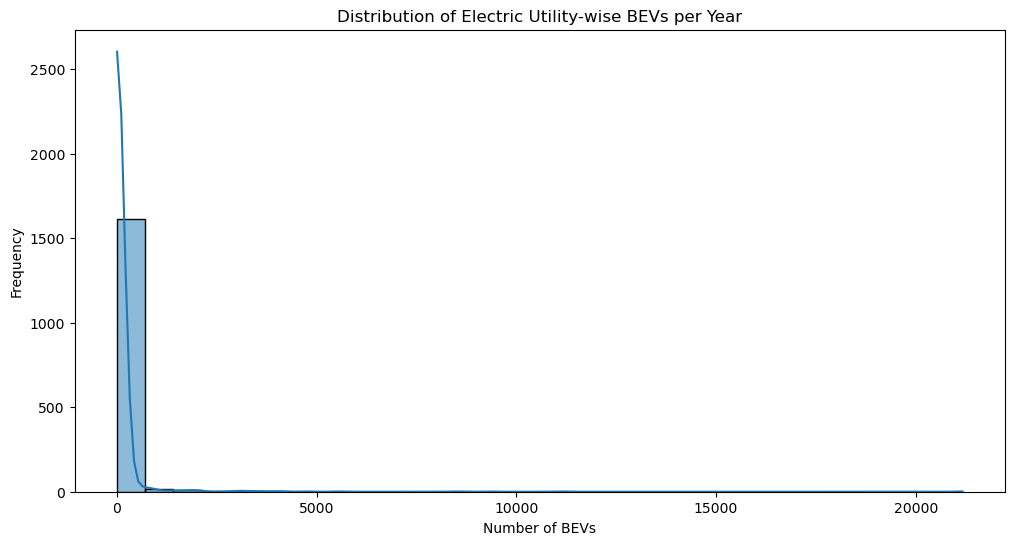

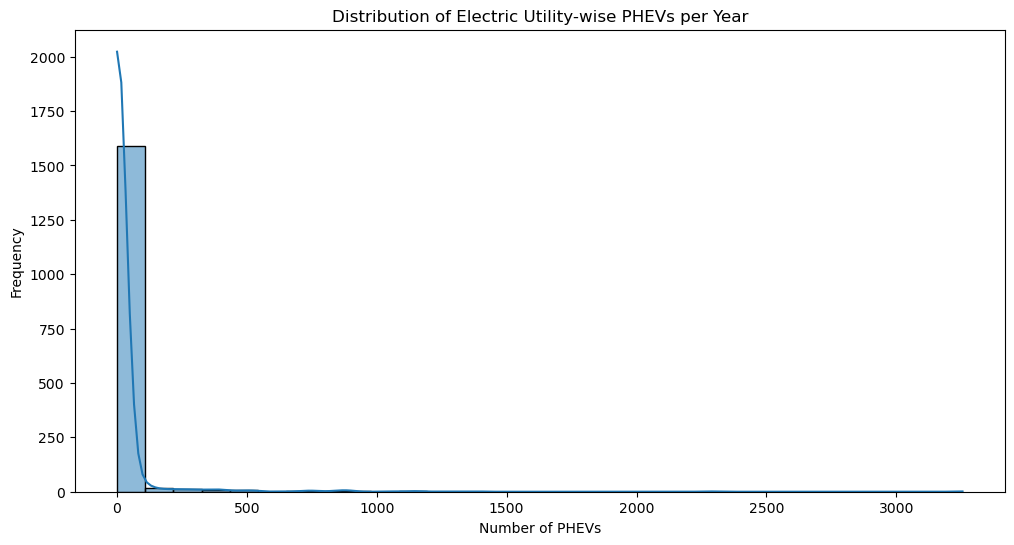

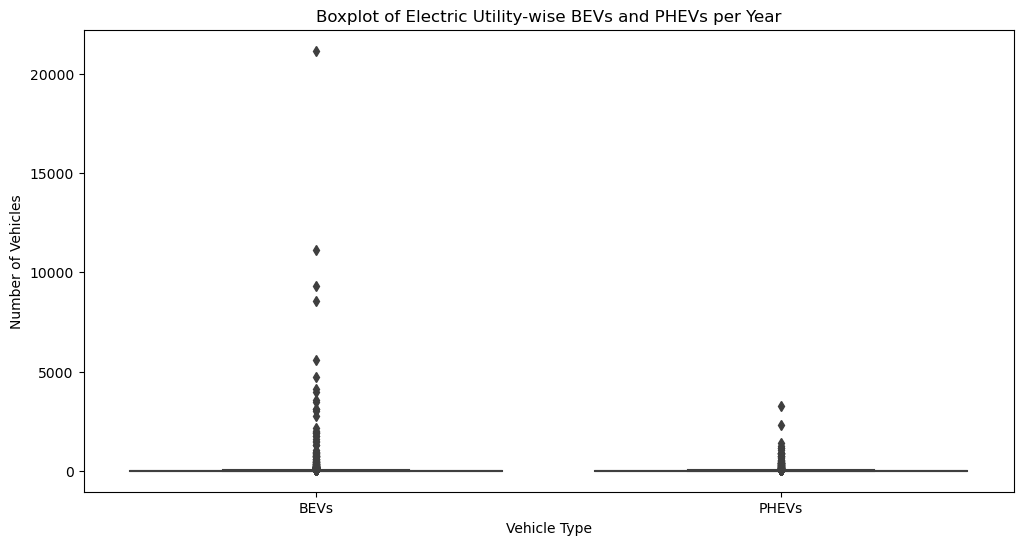

In [63]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Defining a function named 'plot_histogram' with data, column, title, xlabel and ylabel as parameters
# this function will be reused to draw histograms for BEVs and PHEVs county-wise, city-wise, legislative district-wise and electric utility-wise
def plot_histogram(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Defining a function named 'plot_boxplot' with data, column, title, xlabel and ylabel and xtick_labels as parameters
# this function will be reused to draw boxplot for BEVs and PHEVs county-wise, city-wise, legislative district-wise and electric utility-wise
def plot_boxplot(data, columns, title, xlabel, ylabel, xtick_labels):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[columns])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks([0, 1], xtick_labels)
    plt.show()

# Plot histograms and box plots for county-wise data
plot_histogram(combined_county, 'County_BEVs_per_year', 'Distribution of County BEVs per Year', 'Number of BEVs', 'Frequency')
plot_histogram(combined_county, 'County_PHEVs_per_year', 'Distribution of County PHEVs per Year', 'Number of PHEVs', 'Frequency')
plot_boxplot(combined_county, ['County_BEVs_per_year', 'County_PHEVs_per_year'], 'Boxplot of County BEVs and PHEVs per Year', 'Vehicle Type', 'Number of Vehicles', ['BEVs', 'PHEVs'])

# Plot histograms and box plots for city-wise data
plot_histogram(combined_city, 'City_BEVs_per_year', 'Distribution of City BEVs per Year', 'Number of BEVs', 'Frequency')
plot_histogram(combined_city, 'City_PHEVs_per_year', 'Distribution of City PHEVs per Year', 'Number of PHEVs', 'Frequency')
plot_boxplot(combined_city, ['City_BEVs_per_year', 'City_PHEVs_per_year'], 'Boxplot of City BEVs and PHEVs per Year', 'Vehicle Type', 'Number of Vehicles', ['BEVs', 'PHEVs'])

# Plot histograms and box plots for legislative district-wise data
plot_histogram(combined_leg_dist, 'Leg_Dist_BEVs_per_year', 'Distribution of Legislative District BEVs per Year', 'Number of BEVs', 'Frequency')
plot_histogram(combined_leg_dist, 'Leg_Dist_PHEVs_per_year', 'Distribution of Legislative District PHEVs per Year', 'Number of PHEVs', 'Frequency')
plot_boxplot(combined_leg_dist, ['Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year'], 'Boxplot of Legislative District BEVs and PHEVs per Year', 'Vehicle Type', 'Number of Vehicles', ['BEVs', 'PHEVs'])

# Plot histograms and box plots for electric utility-wise data
plot_histogram(combined_elec_utility, 'Elec_Util_BEVs_per_year', 'Distribution of Electric Utility-wise BEVs per Year', 'Number of BEVs', 'Frequency')
plot_histogram(combined_elec_utility, 'Elec_Util_PHEVs_per_year', 'Distribution of Electric Utility-wise PHEVs per Year', 'Number of PHEVs', 'Frequency')
plot_boxplot(combined_elec_utility, ['Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year'], 'Boxplot of Electric Utility-wise BEVs and PHEVs per Year', 'Vehicle Type', 'Number of Vehicles', ['BEVs', 'PHEVs'])


<u>STEP II Contd.</u>

<b>Validating the new variables: Statistical Test</b>

In [64]:
# importing 'stats' class from scipy.stats' module
import scipy.stats as stats

# For statistical test, t-test would be more appropriate since it involves comparing the means of two groups (BEVs and PHEVs) within each category.

# Defining a function to perform t-test and print results
def perform_t_test(data, column1, column2, category):
    ttest_result = stats.ttest_ind(data[column1], data[column2])
    print(f'T-test result for {category} BEVs and PHEVs per year:', ttest_result,"\n")

# T-tests for County-wise data
perform_t_test(combined_county, 'County_BEVs_per_year', 'County_PHEVs_per_year', 'County')

# T-tests for City-wise data
perform_t_test(combined_city, 'City_BEVs_per_year', 'City_PHEVs_per_year', 'City')

# T-tests for Legislative District-wise data
perform_t_test(combined_leg_dist, 'Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year', 'Legislative District')

# T-tests for Electric Utility-wise data
perform_t_test(combined_elec_utility, 'Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year', 'Electric Utility')


T-test result for County BEVs and PHEVs per year: Ttest_indResult(statistic=2.9470403552739164, pvalue=0.0032516580153221894) 

T-test result for City BEVs and PHEVs per year: Ttest_indResult(statistic=8.15355287992028, pvalue=3.732044449804378e-16) 

T-test result for Legislative District BEVs and PHEVs per year: Ttest_indResult(statistic=9.641066287155605, pvalue=1.4516882008138812e-21) 

T-test result for Electric Utility BEVs and PHEVs per year: Ttest_indResult(statistic=3.4237045557912666, pvalue=0.0006252703883660123) 



**Interpretation**

The results of the t-tests indicate that there are statistically significant differences in the mean adoption rates of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) across all the geographic and infrastructural categories tested (counties, cities, legislative districts, and electric utilities). Here's a detailed interpretation:

T-Test Results Interpretation:
County BEVs and PHEVs per year:

T-statistic: 2.947
P-value: 0.00325
Interpretation: The p-value is less than 0.05, indicating a statistically significant difference between the mean adoption rates of BEVs and PHEVs across counties. This suggests that counties have different levels of BEV and PHEV adoption.

City BEVs and PHEVs per year:

T-statistic: 8.154
P-value: 3.732e-16
Interpretation: The p-value is much less than 0.05, indicating a highly statistically significant difference between the mean adoption rates of BEVs and PHEVs across cities. This suggests that cities exhibit significantly different adoption patterns for BEVs and PHEVs.

Legislative District BEVs and PHEVs per year:

T-statistic: 9.641
P-value: 1.451e-21
Interpretation: The p-value is far less than 0.05, indicating an extremely statistically significant difference between the mean adoption rates of BEVs and PHEVs across legislative districts. This suggests strong variations in EV adoption patterns across different legislative districts.

Electric Utility BEVs and PHEVs per year:

T-statistic: 3.424
P-value: 0.000625
Interpretation: The p-value is less than 0.05, indicating a statistically significant difference between the mean adoption rates of BEVs and PHEVs across electric utilities. This suggests that the availability and type of electric utility infrastructure may influence EV adoption rates.

General Implications:

Statistically Significant Differences: Across all categories, the t-tests reveal significant differences in the mean adoption rates of BEVs and PHEVs, indicating that these groups are not adopting at the same rate within each category.

Policy and Infrastructure Implications: The significant differences suggest that geographic and infrastructural factors play an essential role in EV adoption. Policies aimed at increasing EV adoption might need to be tailored to address specific regional characteristics and infrastructure availability.

Further Investigation: These findings warrant further investigation to understand the underlying factors driving these differences. For instance, urban areas might have better charging infrastructure, incentives, and awareness programs contributing to higher BEV adoption.

<b>Identify High and Low Adoption Areas</b>

In [65]:
import pandas as pd

# Define a function named 'identify_adoption_areas' to identify high and low adoption areas
def identify_adoption_areas(data, column_prefix, category_name):
    high_adoption = data[data[f'{column_prefix}_per_year'] > data[f'{column_prefix}_per_year'].quantile(0.75)]
    low_adoption = data[data[f'{column_prefix}_per_year'] <= data[f'{column_prefix}_per_year'].quantile(0.25)]
    
    print(f"High Adoption {category_name}:")
    print(high_adoption)
    
    print(f"\nLow Adoption {category_name}:")
    print(low_adoption,"\n\n")
    
    return high_adoption, low_adoption

# Apply the function to each category for BEVs and PHEVs i.e. county, city, legislative district and electric utility

# County-wise adoption rates
high_adoption_counties_bev, low_adoption_counties_bev = identify_adoption_areas(combined_county, 'County_BEVs', 'Counties (BEVs)')
high_adoption_counties_phev, low_adoption_counties_phev = identify_adoption_areas(combined_county, 'County_PHEVs', 'Counties (PHEVs)')

# City-wise adoption rates
high_adoption_cities_bev, low_adoption_cities_bev = identify_adoption_areas(combined_city, 'City_BEVs', 'Cities (BEVs)')
high_adoption_cities_phev, low_adoption_cities_phev = identify_adoption_areas(combined_city, 'City_PHEVs', 'Cities (PHEVs)')

# Legislative District-wise adoption rates
high_adoption_leg_dist_bev, low_adoption_leg_dist_bev = identify_adoption_areas(combined_leg_dist, 'Leg_Dist_BEVs', 'Legislative Districts (BEVs)')
high_adoption_leg_dist_phev, low_adoption_leg_dist_phev = identify_adoption_areas(combined_leg_dist, 'Leg_Dist_PHEVs', 'Legislative Districts (PHEVs)')

# Electric Utility-wise adoption rates
high_adoption_elec_utility_bev, low_adoption_elec_utility_bev = identify_adoption_areas(combined_elec_utility, 'Elec_Util_BEVs', 'Electric Utilities (BEVs)')
high_adoption_elec_utility_phev, low_adoption_elec_utility_phev = identify_adoption_areas(combined_elec_utility, 'Elec_Util_PHEVs', 'Electric Utilities (PHEVs)')


High Adoption Counties (BEVs):
     Year     County  County_BEVs_per_year  County_PHEVs_per_year
317  2011      Clark                    42                      4
328  2011       King                   295                     23
338  2011     Pierce                    60                      3
342  2011  Snohomish                    70                      9
356  2012      Clark                    58                     67
..    ...        ...                   ...                    ...
847  2024     Skagit                    54                     60
849  2024  Snohomish                  1057                    475
850  2024    Spokane                   177                    260
852  2024   Thurston                   230                    155
855  2024    Whatcom                   142                    151

[210 rows x 4 columns]

Low Adoption Counties (BEVs):
     Year        County  County_BEVs_per_year  County_PHEVs_per_year
0    1997         Adams                     0        

**Here's a detailed interpretation of the output:**

High Adoption Areas

Counties:
High Adoption Counties (BEVs): These counties have BEV registrations per year higher than the 75th percentile.
Examples include King, Snohomish, and Clark counties with high BEV adoption rates.
High Adoption Counties (PHEVs): These counties have PHEV registrations per year higher than the 75th percentile.
Examples include King, Spokane, and Thurston counties with high PHEV adoption rates.

Cities:
High Adoption Cities (BEVs): These cities have BEV registrations per year higher than the 75th percentile.
Examples include Seattle, Bellevue, and Yelm with high BEV adoption rates.
High Adoption Cities (PHEVs): These cities have PHEV registrations per year higher than the 75th percentile.
Examples include Yakima, Yarrow Point, and Yelm with high PHEV adoption rates.

Legislative Districts:
High Adoption Legislative Districts (BEVs): These legislative districts have BEV registrations per year higher than the 75th percentile.
Examples include districts 45, 48, and 46 with high BEV adoption rates.
High Adoption Legislative Districts (PHEVs): These legislative districts have PHEV registrations per year higher than the 75th percentile.
Examples include districts 45, 46, and 48 with high PHEV adoption rates.

Electric Utilities:
High Adoption Electric Utilities (BEVs): These electric utilities serve areas with BEV registrations per year higher than the 75th percentile.
Examples include Puget Sound Energy Inc. and utilities serving Tacoma.
High Adoption Electric Utilities (PHEVs): These electric utilities serve areas with PHEV registrations per year higher than the 75th percentile.
Examples include Puget Sound Energy Inc. and utilities serving Tacoma.


Low Adoption Areas

Counties:
Low Adoption Counties (BEVs): These counties have BEV registrations per year less than or equal to the 25th percentile.
Examples include Adams, Asotin, and Benton counties with low BEV adoption rates.
Low Adoption Counties (PHEVs): These counties have PHEV registrations per year less than or equal to the 25th percentile.
Examples include Adams, Asotin, and Benton counties with low PHEV adoption rates.

Cities:
Low Adoption Cities (BEVs): These cities have BEV registrations per year less than or equal to the 25th percentile.
Examples include Aberdeen, Acme, and Addy with low BEV adoption rates.
Low Adoption Cities (PHEVs): These cities have PHEV registrations per year less than or equal to the 25th percentile.
Examples include Aberdeen, Acme, and Addy with low PHEV adoption rates.

Legislative Districts:
Low Adoption Legislative Districts (BEVs): These legislative districts have BEV registrations per year less than or equal to the 25th percentile.
Examples include districts 1, 2, and 3 with low BEV adoption rates.
Low Adoption Legislative Districts (PHEVs): These legislative districts have PHEV registrations per year less than or equal to the 25th percentile.
Examples include districts 1, 2, and 3 with low PHEV adoption rates.

Electric Utilities:
Low Adoption Electric Utilities (BEVs): These electric utilities serve areas with BEV registrations per year less than or equal to the 25th percentile.
Examples include utilities serving Avista Corp and Portland General Electric Co.
Low Adoption Electric Utilities (PHEVs): These electric utilities serve areas with PHEV registrations per year less than or equal to the 25th percentile.
Examples include utilities serving Avista Corp and Portland General Electric Co.

Implications
High Adoption Areas: These areas have successfully adopted BEVs and PHEVs at a higher rate, potentially due to better infrastructure, more incentives, higher awareness, and other favorable conditions.
Low Adoption Areas: These areas have lower adoption rates, indicating potential barriers such as lack of infrastructure, fewer incentives, lower awareness, and other unfavorable conditions.

<u>STEP III</u>

<b>Training and Testing</b>

In [66]:
# import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split

In [67]:
# define a function named 'prepare_data'to create training and test sets
def prepare_data(data, target_column):
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # One-hot encode categorical variables
    X_encoded = pd.get_dummies(X, drop_first=True)
    
    # Split the dataset into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [68]:
# Prepare data for BEVs (County-wise)
X_train_bev_county, X_test_bev_county, y_train_bev_county, y_test_bev_county = prepare_data(combined_county, 'County_BEVs_per_year')

# Prepare data for PHEVs (County-wise)
X_train_phev_county, X_test_phev_county, y_train_phev_county, y_test_phev_county = prepare_data(combined_county, 'County_PHEVs_per_year')

# Prepare data for BEVs (City-wise)
X_train_bev_city, X_test_bev_city, y_train_bev_city, y_test_bev_city = prepare_data(combined_city, 'City_BEVs_per_year')

# Prepare data for PHEVs (City-wise)
X_train_phev_city, X_test_phev_city, y_train_phev_city, y_test_phev_city = prepare_data(combined_city, 'City_PHEVs_per_year')

# Prepare data for BEVs (Legislative District-wise)
X_train_bev_leg_dist, X_test_bev_leg_dist, y_train_bev_leg_dist, y_test_bev_leg_dist = prepare_data(combined_leg_dist, 'Leg_Dist_BEVs_per_year')

# Prepare data for PHEVs (Legislative District-wise)
X_train_phev_leg_dist, X_test_phev_leg_dist, y_train_phev_leg_dist, y_test_phev_leg_dist = prepare_data(combined_leg_dist, 'Leg_Dist_PHEVs_per_year')

# Prepare data for BEVs (Electric Utility-wise)
X_train_bev_elec_utility, X_test_bev_elec_utility, y_train_bev_elec_utility, y_test_bev_elec_utility = prepare_data(combined_elec_utility, 'Elec_Util_BEVs_per_year')

# Prepare data for PHEVs (Electric Utility-wise)
X_train_phev_elec_utility, X_test_phev_elec_utility, y_train_phev_elec_utility, y_test_phev_elec_utility = prepare_data(combined_elec_utility, 'Elec_Util_PHEVs_per_year')


In [69]:
# Print shapes of datasets for verification

print("County-wise BEVs: Training data shape:", X_train_bev_county.shape, "Testing data shape:", X_test_bev_county.shape)
print("County-wise PHEVs: Training data shape:", X_train_phev_county.shape, "Testing data shape:", X_test_phev_county.shape)

print("City-wise BEVs: Training data shape:", X_train_bev_city.shape, "Testing data shape:", X_test_bev_city.shape)
print("City-wise PHEVs: Training data shape:", X_train_phev_city.shape, "Testing data shape:", X_test_phev_city.shape)

print("Legislative District-wise BEVs: Training data shape:", X_train_bev_leg_dist.shape, "Testing data shape:", X_test_bev_leg_dist.shape)
print("Legislative District-wise PHEVs: Training data shape:", X_train_phev_leg_dist.shape, "Testing data shape:", X_test_phev_leg_dist.shape)

print("Electric Utility-wise BEVs: Training data shape:", X_train_bev_elec_utility.shape, "Testing data shape:", X_test_bev_elec_utility.shape)
print("Electric Utility-wise PHEVs: Training data shape:", X_train_phev_elec_utility.shape, "Testing data shape:", X_test_phev_elec_utility.shape)

County-wise BEVs: Training data shape: (686, 40) Testing data shape: (172, 40)
County-wise PHEVs: Training data shape: (686, 40) Testing data shape: (172, 40)
City-wise BEVs: Training data shape: (8324, 474) Testing data shape: (2082, 474)
City-wise PHEVs: Training data shape: (8324, 474) Testing data shape: (2082, 474)
Legislative District-wise BEVs: Training data shape: (862, 50) Testing data shape: (216, 50)
Legislative District-wise PHEVs: Training data shape: (862, 50) Testing data shape: (216, 50)
Electric Utility-wise BEVs: Training data shape: (1320, 76) Testing data shape: (330, 76)
Electric Utility-wise PHEVs: Training data shape: (1320, 76) Testing data shape: (330, 76)


<u>STEP IV</u>

<b>Training Machine Learning Models</b>

In [70]:
# import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [71]:
# defining a function named 'train_and_evaluate_model'
# the function takes the train and test sets of independent and dependent variables and also the machine learning model as parameters
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate the model
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Training MSE: {mse_train}')
    print(f'Testing MSE: {mse_test}')
    print(f'Training R^2: {r2_train}')
    print(f'Testing R^2: {r2_test}')
    print('')

# creating a list of two machine learning models, Linear regression and random forest regressor
models = [LinearRegression(), RandomForestRegressor(random_state=42)]

for model in models:
    print('County-wise BEVs:')
    train_and_evaluate_model(X_train_bev_county, X_test_bev_county, y_train_bev_county, y_test_bev_county, model)
    
    print('County-wise PHEVs:')
    train_and_evaluate_model(X_train_phev_county, X_test_phev_county, y_train_phev_county, y_test_phev_county, model)
    
    print('City-wise BEVs:')
    train_and_evaluate_model(X_train_bev_city, X_test_bev_city, y_train_bev_city, y_test_bev_city, model)
    
    print('City-wise PHEVs:')
    train_and_evaluate_model(X_train_phev_city, X_test_phev_city, y_train_phev_city, y_test_phev_city, model)
    
    print('Legislative District-wise BEVs:')
    train_and_evaluate_model(X_train_bev_leg_dist, X_test_bev_leg_dist, y_train_bev_leg_dist, y_test_bev_leg_dist, model)
    
    print('Legislative District-wise PHEVs:')
    train_and_evaluate_model(X_train_phev_leg_dist, X_test_phev_leg_dist, y_train_phev_leg_dist, y_test_phev_leg_dist, model)
    
    print('Electric Utility-wise BEVs:')
    train_and_evaluate_model(X_train_bev_elec_utility, X_test_bev_elec_utility, y_train_bev_elec_utility, y_test_bev_elec_utility, model)
    
    print('Electric Utility-wise PHEVs:')
    train_and_evaluate_model(X_train_phev_elec_utility, X_test_phev_elec_utility, y_train_phev_elec_utility, y_test_phev_elec_utility, model)


County-wise BEVs:
Model: LinearRegression
Training MSE: 230689.3968316366
Testing MSE: 747582.5993299438
Training R^2: 0.8463018191911079
Testing R^2: 0.38453558445175506

County-wise PHEVs:
Model: LinearRegression
Training MSE: 5230.541898251493
Testing MSE: 21935.313590825546
Training R^2: 0.8834470230325614
Testing R^2: 0.694021880131342

City-wise BEVs:
Model: LinearRegression
Training MSE: 7997.028611631651
Testing MSE: 2283.518367032071
Training R^2: 0.5528470672575849
Testing R^2: 0.5778672114897181

City-wise PHEVs:
Model: LinearRegression
Training MSE: 333.414270672379
Testing MSE: 45.88035873433895
Training R^2: 0.6101512881702522
Testing R^2: 0.7291690341821694

Legislative District-wise BEVs:
Model: LinearRegression
Training MSE: 50054.32179284161
Testing MSE: 86977.70006911887
Training R^2: 0.46258083268194294
Testing R^2: 0.44292261504573116

Legislative District-wise PHEVs:
Model: LinearRegression
Training MSE: 1714.7374746195305
Testing MSE: 7104.899330219081
Training R

<u>STEP V</u>

<b>Predicting the number of new electric vehicles over the next 10 years</b>

In [72]:
import numpy as np

# Define the future years ie.2024 to 2034
future_years = np.arange(2024, 2034)

# defining a function named 'prepare_future_data' to expand future years data for all unique categories
# the function takes future_years, unique_values of the category and the column_name as parameters
def prepare_future_data(future_years, unique_values, column_name):
    future_data_list = []
    for year in future_years:
        for value in unique_values:
            future_data_list.append({column_name: value, 'Year': year})
    future_data = pd.DataFrame(future_data_list)
    return future_data

# Prepare county-wise future data
unique_counties = combined_county['County'].unique()
future_data_county = prepare_future_data(future_years, unique_counties, 'County')

# Prepare city-wise future data
unique_cities = combined_city['City'].unique()
future_data_city = prepare_future_data(future_years, unique_cities, 'City')

# Prepare legislative district-wise future data
unique_leg_dists = combined_leg_dist['Legislative District'].unique()
future_data_leg_dist = prepare_future_data(future_years, unique_leg_dists, 'Legislative District')

# Prepare electric utility-wise future data
unique_elec_utilities = combined_elec_utility['Electric Utility'].unique()
future_data_elec_utility = prepare_future_data(future_years, unique_elec_utilities, 'Electric Utility')

# One-hot encode the categorical variables for future data
# One-hot encoding is a process of converting categorical variables into a form that can be provided to machine learning algorithms to do a better job in prediction
future_data_county_encoded = pd.get_dummies(future_data_county, drop_first=True)
future_data_city_encoded = pd.get_dummies(future_data_city, drop_first=True)
future_data_leg_dist_encoded = pd.get_dummies(future_data_leg_dist, drop_first=True)
future_data_elec_utility_encoded = pd.get_dummies(future_data_elec_utility, drop_first=True)


In [73]:
# importing the necessary libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# defining a function named 'align_columns' to ensure the same columns in the future data as in the training data
# This is crucial for consistency in feature engineering and when feeding data into machine learning models
def align_columns(train_data, future_data):
    future_data_aligned = future_data.reindex(columns=train_data.columns, fill_value=0)
    return future_data_aligned

# Define target variables (dependent) for training
y_bev_county = combined_county['County_BEVs_per_year']
y_phev_county = combined_county['County_PHEVs_per_year']
y_bev_city = combined_city['City_BEVs_per_year']
y_phev_city = combined_city['City_PHEVs_per_year']
y_bev_leg_dist = combined_leg_dist['Leg_Dist_BEVs_per_year']
y_phev_leg_dist = combined_leg_dist['Leg_Dist_PHEVs_per_year']
y_bev_elec_utility = combined_elec_utility['Elec_Util_BEVs_per_year']
y_phev_elec_utility = combined_elec_utility['Elec_Util_PHEVs_per_year']

# One-hot encode the categorical variables for training data
encoded_combined_county = pd.get_dummies(combined_county.drop(columns=['County_BEVs_per_year', 'County_PHEVs_per_year']), drop_first=True)
encoded_combined_city = pd.get_dummies(combined_city.drop(columns=['City_BEVs_per_year', 'City_PHEVs_per_year']), drop_first=True)
encoded_combined_leg_dist = pd.get_dummies(combined_leg_dist.drop(columns=['Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year']), drop_first=True)
encoded_combined_elec_utility = pd.get_dummies(combined_elec_utility.drop(columns=['Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year']), drop_first=True)

# Align future data columns to match the training data columns
encoded_future_county = align_columns(encoded_combined_county, future_data_county_encoded)
encoded_future_city = align_columns(encoded_combined_city, future_data_city_encoded)
encoded_future_leg_dist = align_columns(encoded_combined_leg_dist, future_data_leg_dist_encoded)
encoded_future_elec_utility = align_columns(encoded_combined_elec_utility, future_data_elec_utility_encoded)



In [74]:
import warnings
# ignoring irrelavant 'DeprecationWarning in future versions' that may show up in the execution of the code
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Split the datasets into training and testing sets using 'train_test_split' module
# Splitting the county data into training and testing sets
X_train_bev_county, X_test_bev_county, y_train_bev_county, y_test_bev_county = train_test_split(encoded_combined_county, y_bev_county, test_size=0.2, random_state=42)
X_train_phev_county, X_test_phev_county, y_train_phev_county, y_test_phev_county = train_test_split(encoded_combined_county, y_phev_county, test_size=0.2, random_state=42)

# Splitting the city data into training and testing sets
X_train_bev_city, X_test_bev_city, y_train_bev_city, y_test_bev_city = train_test_split(encoded_combined_city, y_bev_city, test_size=0.2, random_state=42)
X_train_phev_city, X_test_phev_city, y_train_phev_city, y_test_phev_city = train_test_split(encoded_combined_city, y_phev_city, test_size=0.2, random_state=42)

# Splitting the legislative district data into training and testing sets
X_train_bev_leg_dist, X_test_bev_leg_dist, y_train_bev_leg_dist, y_test_bev_leg_dist = train_test_split(encoded_combined_leg_dist, y_bev_leg_dist, test_size=0.2, random_state=42)
X_train_phev_leg_dist, X_test_phev_leg_dist, y_train_phev_leg_dist, y_test_phev_leg_dist = train_test_split(encoded_combined_leg_dist, y_phev_leg_dist, test_size=0.2, random_state=42)

# Splitting the electric utility data into training and testing sets
X_train_bev_elec_utility, X_test_bev_elec_utility, y_train_bev_elec_utility, y_test_bev_elec_utility = train_test_split(encoded_combined_elec_utility, y_bev_elec_utility, test_size=0.2, random_state=42)
X_train_phev_elec_utility, X_test_phev_elec_utility, y_train_phev_elec_utility, y_test_phev_elec_utility = train_test_split(encoded_combined_elec_utility, y_phev_elec_utility, test_size=0.2, random_state=42)

# Train Random Forest Regressor models using the county BEV train and test sets
rf_model_bev_county = RandomForestRegressor(random_state=42)
rf_model_bev_county.fit(X_train_bev_county, y_train_bev_county)

# Train Random Forest Regressor models using the county PHEV train and test sets
rf_model_phev_county = RandomForestRegressor(random_state=42)
rf_model_phev_county.fit(X_train_phev_county, y_train_phev_county)

# Train Random Forest Regressor models using the city BEV train and test sets
rf_model_bev_city = RandomForestRegressor(random_state=42)
rf_model_bev_city.fit(X_train_bev_city, y_train_bev_city)

# Train Random Forest Regressor models using the city PHEV train and test sets
rf_model_phev_city = RandomForestRegressor(random_state=42)
rf_model_phev_city.fit(X_train_phev_city, y_train_phev_city)

# Train Random Forest Regressor models using the legislative district BEV train and test sets
rf_model_bev_leg_dist = RandomForestRegressor(random_state=42)
rf_model_bev_leg_dist.fit(X_train_bev_leg_dist, y_train_bev_leg_dist)

# Train Random Forest Regressor models using the legislative district PHEV train and test sets
rf_model_phev_leg_dist = RandomForestRegressor(random_state=42)
rf_model_phev_leg_dist.fit(X_train_phev_leg_dist, y_train_phev_leg_dist)

# Train Random Forest Regressor models using the electric utility BEV train and test sets
rf_model_bev_elec_utility = RandomForestRegressor(random_state=42)
rf_model_bev_elec_utility.fit(X_train_bev_elec_utility, y_train_bev_elec_utility)

# Train Random Forest Regressor models using the electric utility PHEV train and test sets
rf_model_phev_elec_utility = RandomForestRegressor(random_state=42)
rf_model_phev_elec_utility.fit(X_train_phev_elec_utility, y_train_phev_elec_utility)

# Train Linear Regression models using county BEV train and test sets
lr_model_bev_county = LinearRegression()
lr_model_bev_county.fit(X_train_bev_county, y_train_bev_county)

# Train Linear Regression models using county PHEV train and test sets
lr_model_phev_county = LinearRegression()
lr_model_phev_county.fit(X_train_phev_county, y_train_phev_county)

# Train Linear Regression models using city BEV train and test sets
lr_model_bev_city = LinearRegression()
lr_model_bev_city.fit(X_train_bev_city, y_train_bev_city)

# Train Linear Regression models using city PHEV train and test sets
lr_model_phev_city = LinearRegression()
lr_model_phev_city.fit(X_train_phev_city, y_train_phev_city)

# Train Linear Regression models using legislative district BEV train and test sets
lr_model_bev_leg_dist = LinearRegression()
lr_model_bev_leg_dist.fit(X_train_bev_leg_dist, y_train_bev_leg_dist)

# Train Linear Regression models using legislative district PHEV train and test sets
lr_model_phev_leg_dist = LinearRegression()
lr_model_phev_leg_dist.fit(X_train_phev_leg_dist, y_train_phev_leg_dist)

# Train Linear Regression models using electric utility BEV train and test sets
lr_model_bev_elec_utility = LinearRegression()
lr_model_bev_elec_utility.fit(X_train_bev_elec_utility, y_train_bev_elec_utility)

# Train Linear Regression models using electric utility PHEV train and test sets
lr_model_phev_elec_utility = LinearRegression()
lr_model_phev_elec_utility.fit(X_train_phev_elec_utility, y_train_phev_elec_utility)



LinearRegression()

In [75]:
import warnings
import numpy as np
import pandas as pd

# Ignoring irrelevant 'DeprecationWarning in future versions' that may show up in the execution of the code
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Defining a function named 'predict_future_values' to make predictions and add the year and names columns for readability
def predict_future_values(model, future_data_encoded, future_data):
    predictions = model.predict(future_data_encoded)
    predictions = np.round(predictions).astype(int)  # Round predictions to integers
    result = future_data.copy()
    result['Predicted_Values'] = predictions
    return result

# Predict future values for each category using Random Forest
predictions_rf_bev_county = predict_future_values(rf_model_bev_county, encoded_future_county, future_data_county)
predictions_rf_phev_county = predict_future_values(rf_model_phev_county, encoded_future_county, future_data_county)

predictions_rf_bev_city = predict_future_values(rf_model_bev_city, encoded_future_city, future_data_city)
predictions_rf_phev_city = predict_future_values(rf_model_phev_city, encoded_future_city, future_data_city)

predictions_rf_bev_leg_dist = predict_future_values(rf_model_bev_leg_dist, encoded_future_leg_dist, future_data_leg_dist)
predictions_rf_phev_leg_dist = predict_future_values(rf_model_phev_leg_dist, encoded_future_leg_dist, future_data_leg_dist)

predictions_rf_bev_elec_utility = predict_future_values(rf_model_bev_elec_utility, encoded_future_elec_utility, future_data_elec_utility)
predictions_rf_phev_elec_utility = predict_future_values(rf_model_phev_elec_utility, encoded_future_elec_utility, future_data_elec_utility)

# Predict future values for each category using Linear Regression
predictions_lr_bev_county = predict_future_values(lr_model_bev_county, encoded_future_county, future_data_county)
predictions_lr_phev_county = predict_future_values(lr_model_phev_county, encoded_future_county, future_data_county)

predictions_lr_bev_city = predict_future_values(lr_model_bev_city, encoded_future_city, future_data_city)
predictions_lr_phev_city = predict_future_values(lr_model_phev_city, encoded_future_city, future_data_city)

predictions_lr_bev_leg_dist = predict_future_values(lr_model_bev_leg_dist, encoded_future_leg_dist, future_data_leg_dist)
predictions_lr_phev_leg_dist = predict_future_values(lr_model_phev_leg_dist, encoded_future_leg_dist, future_data_leg_dist)

predictions_lr_bev_elec_utility = predict_future_values(lr_model_bev_elec_utility, encoded_future_elec_utility, future_data_elec_utility)
predictions_lr_phev_elec_utility = predict_future_values(lr_model_phev_elec_utility, encoded_future_elec_utility, future_data_elec_utility)

# Function to create a pivot table for the predictions
def create_pivot_table(predictions, name_column):
    pivot_table = predictions.pivot(index=name_column, columns='Year', values='Predicted_Values')
    return pivot_table

# Create pivot tables for each category and model
pivot_rf_bev_county = create_pivot_table(predictions_rf_bev_county, 'County')
pivot_rf_phev_county = create_pivot_table(predictions_rf_phev_county, 'County')

pivot_rf_bev_city = create_pivot_table(predictions_rf_bev_city, 'City')
pivot_rf_phev_city = create_pivot_table(predictions_rf_phev_city, 'City')

pivot_rf_bev_leg_dist = create_pivot_table(predictions_rf_bev_leg_dist, 'Legislative District')
pivot_rf_phev_leg_dist = create_pivot_table(predictions_rf_phev_leg_dist, 'Legislative District')

pivot_rf_bev_elec_utility = create_pivot_table(predictions_rf_bev_elec_utility, 'Electric Utility')
pivot_rf_phev_elec_utility = create_pivot_table(predictions_rf_phev_elec_utility, 'Electric Utility')

pivot_lr_bev_county = create_pivot_table(predictions_lr_bev_county, 'County')
pivot_lr_phev_county = create_pivot_table(predictions_lr_phev_county, 'County')

pivot_lr_bev_city = create_pivot_table(predictions_lr_bev_city, 'City')
pivot_lr_phev_city = create_pivot_table(predictions_lr_phev_city, 'City')

pivot_lr_bev_leg_dist = create_pivot_table(predictions_lr_bev_leg_dist, 'Legislative District')
pivot_lr_phev_leg_dist = create_pivot_table(predictions_lr_phev_leg_dist, 'Legislative District')

pivot_lr_bev_elec_utility = create_pivot_table(predictions_lr_bev_elec_utility, 'Electric Utility')
pivot_lr_phev_elec_utility = create_pivot_table(predictions_lr_phev_elec_utility, 'Electric Utility')

# Display the pivot tables
print("Random Forest - County-wise BEVs predictions:\n", pivot_rf_bev_county)
print("Random Forest - County-wise PHEVs predictions:\n", pivot_rf_phev_county)

print("Random Forest - City-wise BEVs predictions:\n", pivot_rf_bev_city)
print("Random Forest - City-wise PHEVs predictions:\n", pivot_rf_phev_city)

print("Random Forest - Legislative District-wise BEVs predictions:\n", pivot_rf_bev_leg_dist)
print("Random Forest - Legislative District-wise PHEVs predictions:\n", pivot_rf_phev_leg_dist)

print("Random Forest - Electric Utility-wise BEVs predictions:\n", pivot_rf_bev_elec_utility)
print("Random Forest - Electric Utility-wise PHEVs predictions:\n", pivot_rf_phev_elec_utility)

print("Linear Regression - County-wise BEVs predictions:\n", pivot_lr_bev_county)
print("Linear Regression - County-wise PHEVs predictions:\n", pivot_lr_phev_county)

print("Linear Regression - City-wise BEVs predictions:\n", pivot_lr_bev_city)
print("Linear Regression - City-wise PHEVs predictions:\n", pivot_lr_phev_city)

print("Linear Regression - Legislative District-wise BEVs predictions:\n", pivot_lr_bev_leg_dist)
print("Linear Regression - Legislative District-wise PHEVs predictions:\n", pivot_lr_phev_leg_dist)

print("Linear Regression - Electric Utility-wise BEVs predictions:\n", pivot_lr_bev_elec_utility)
print("Linear Regression - Electric Utility-wise PHEVs predictions:\n", pivot_lr_phev_elec_utility)


Random Forest - County-wise BEVs predictions:
 Year           2024   2025   2026   2027   2028   2029   2030   2031   2032  \
County                                                                        
Adams             5      5      5      5      5      5      5      5      5   
Asotin            4      4      4      4      4      4      4      4      4   
Benton          406    406    406    406    406    406    406    406    406   
Chelan          188    188    188    188    188    188    188    188    188   
Clallam          45     45     45     45     45     45     45     45     45   
Clark           738    738    738    738    738    738    738    738    738   
Columbia          2      2      2      2      2      2      2      2      2   
Cowlitz          81     81     81     81     81     81     81     81     81   
Douglas          20     20     20     20     20     20     20     20     20   
Ferry             3      3      3      3      3      3      3      3      3   
Frank

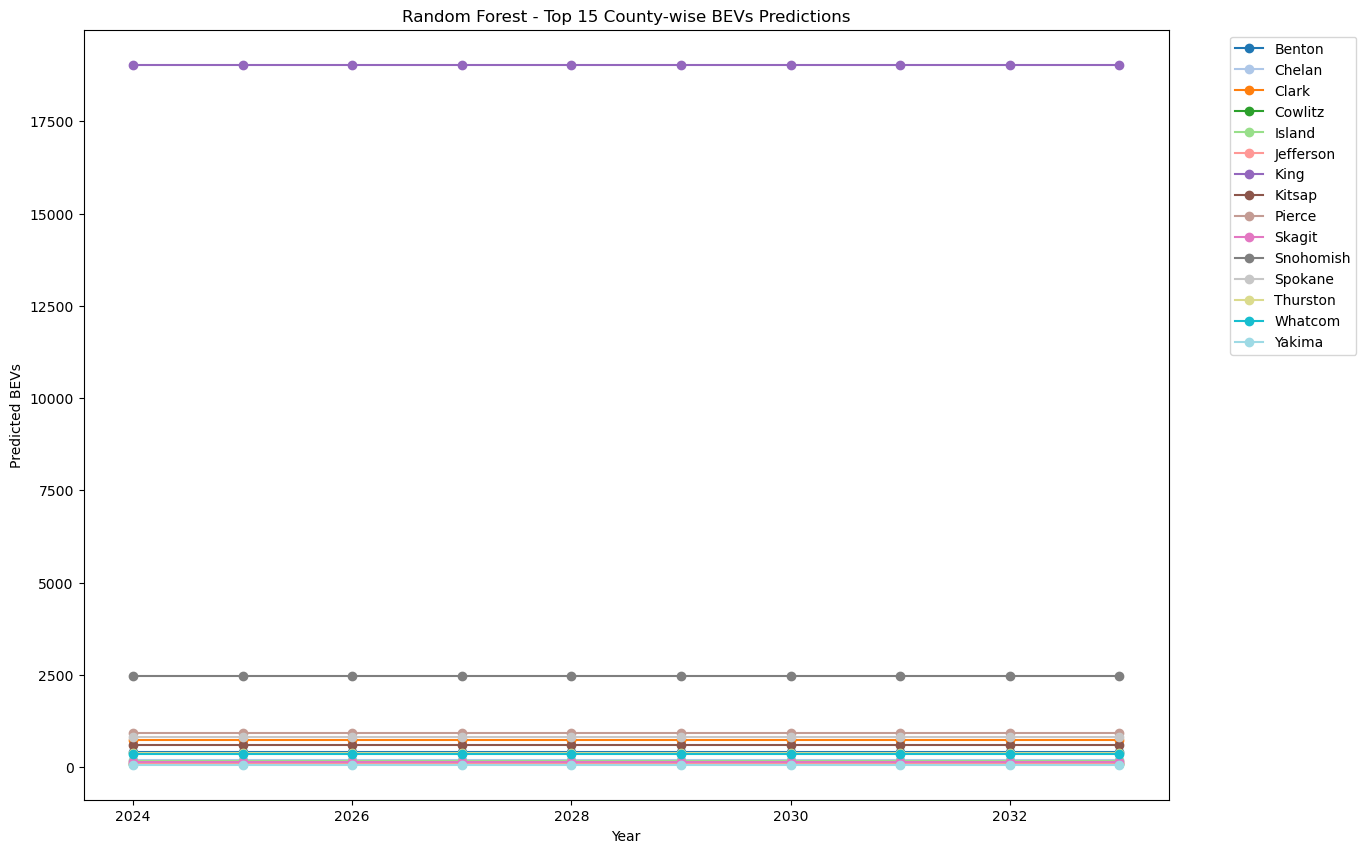

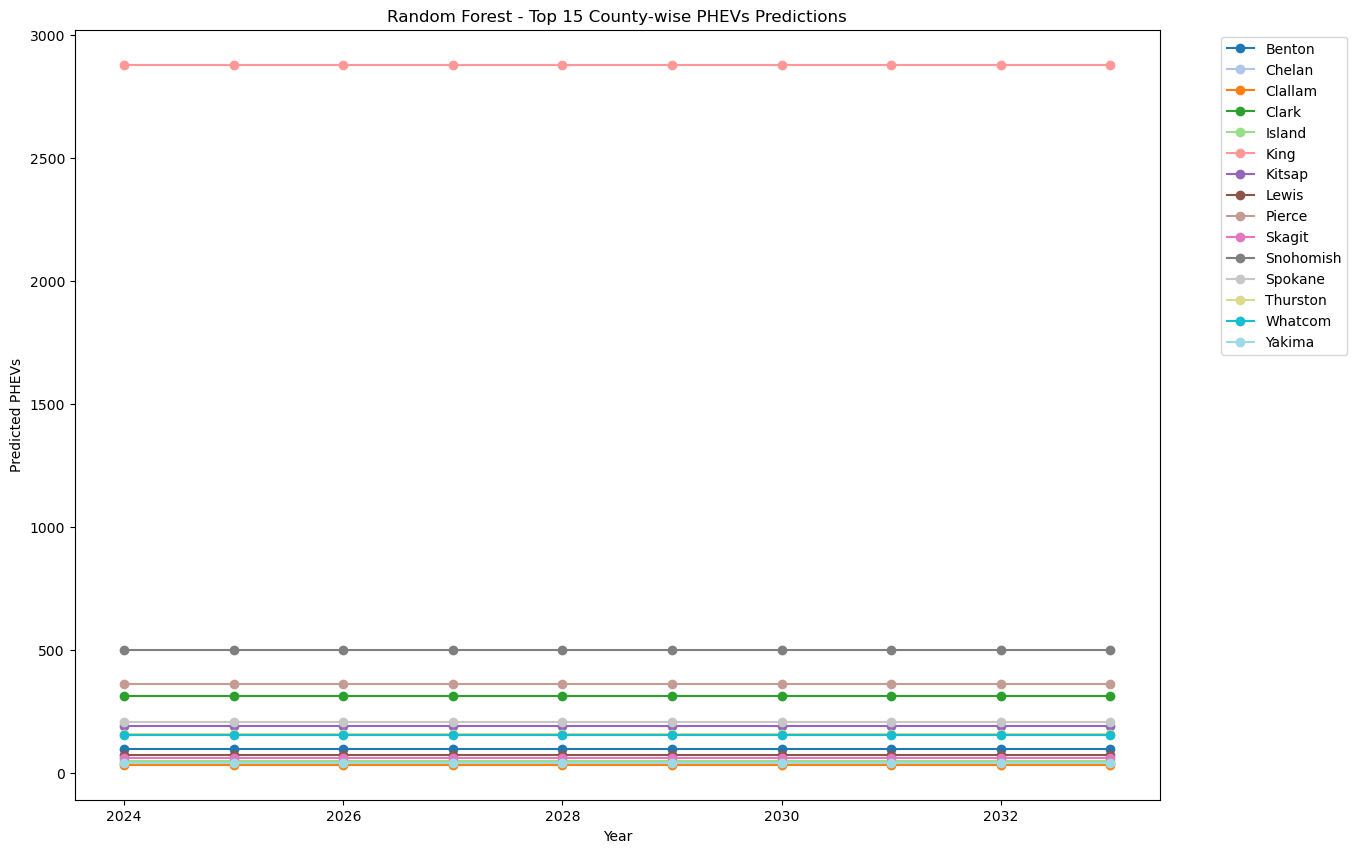

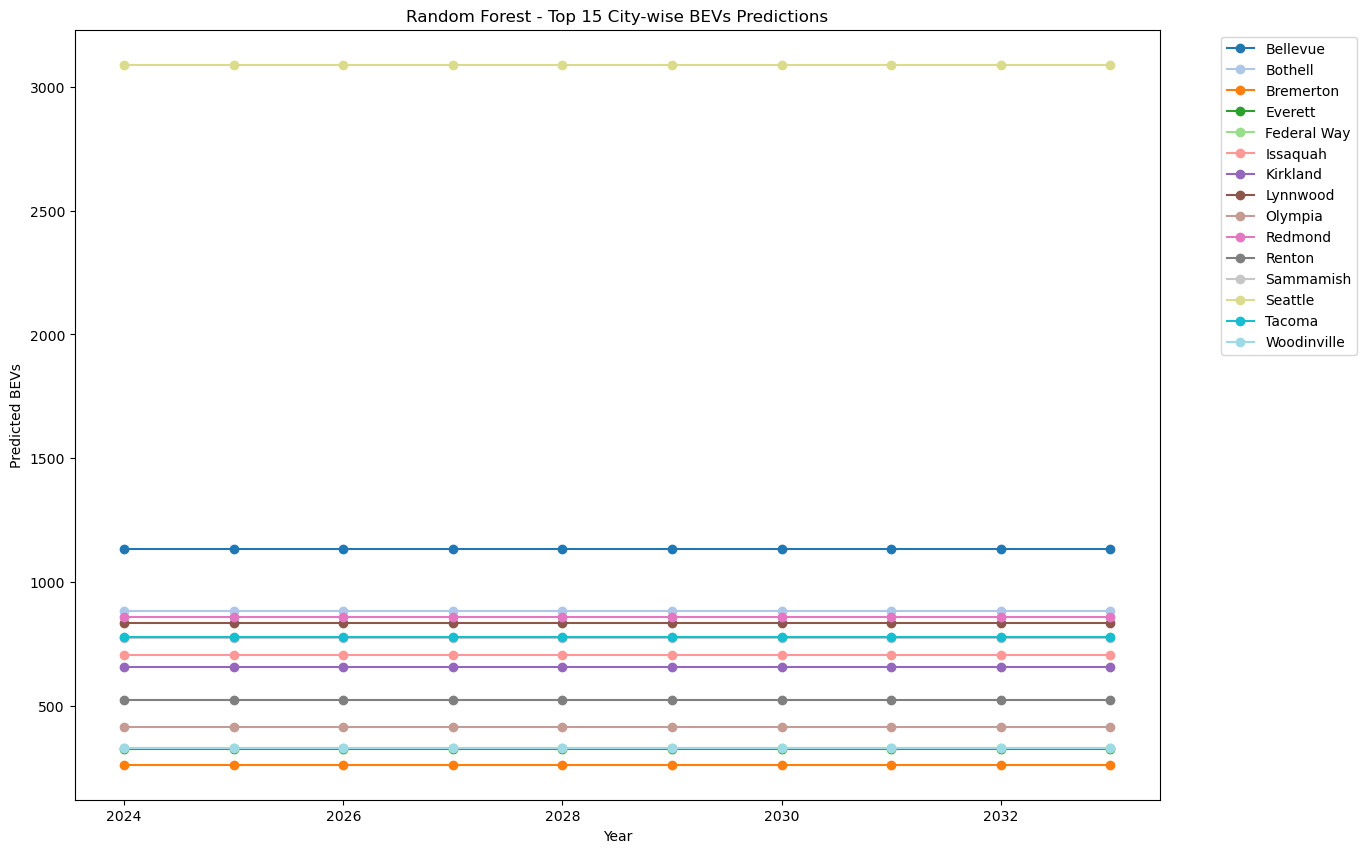

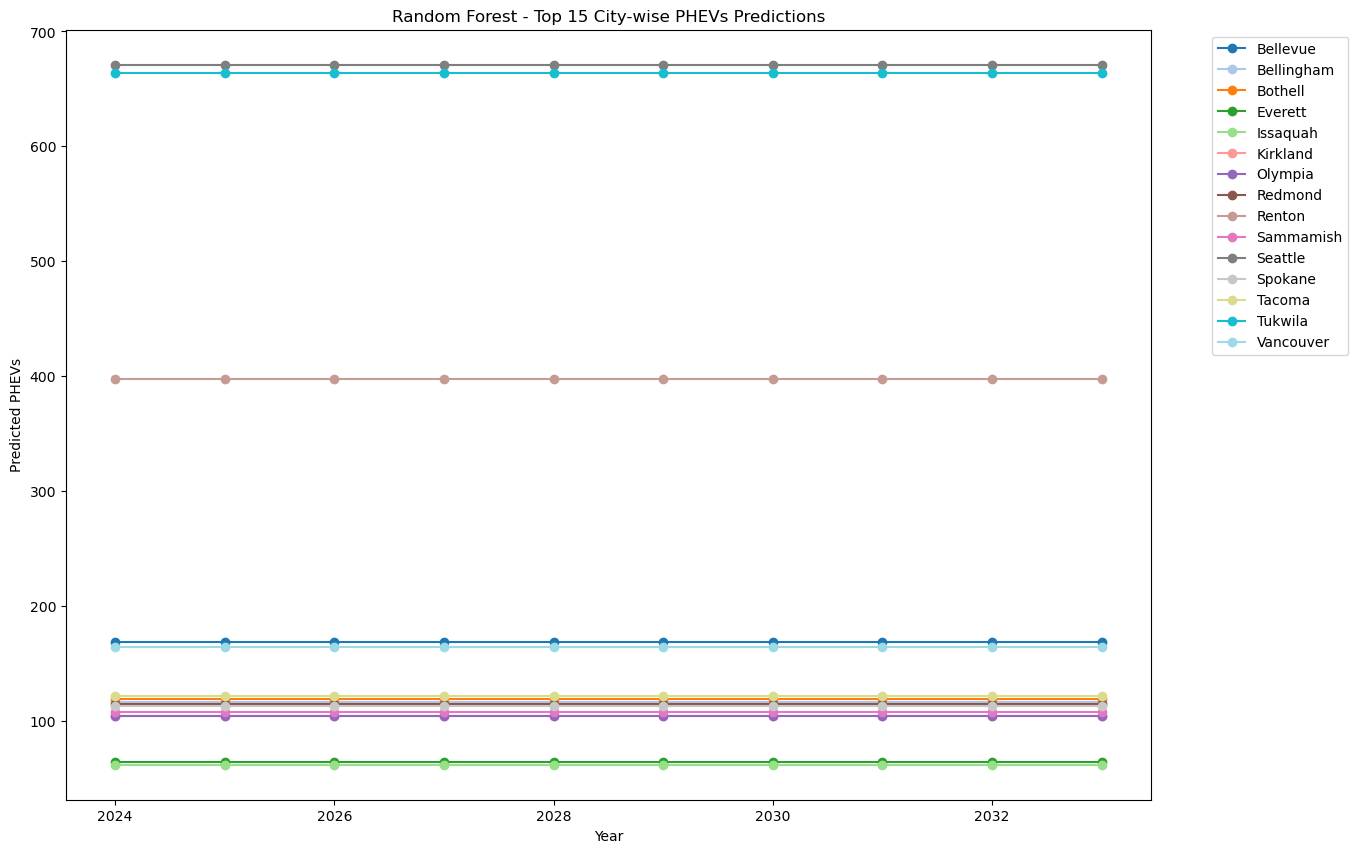

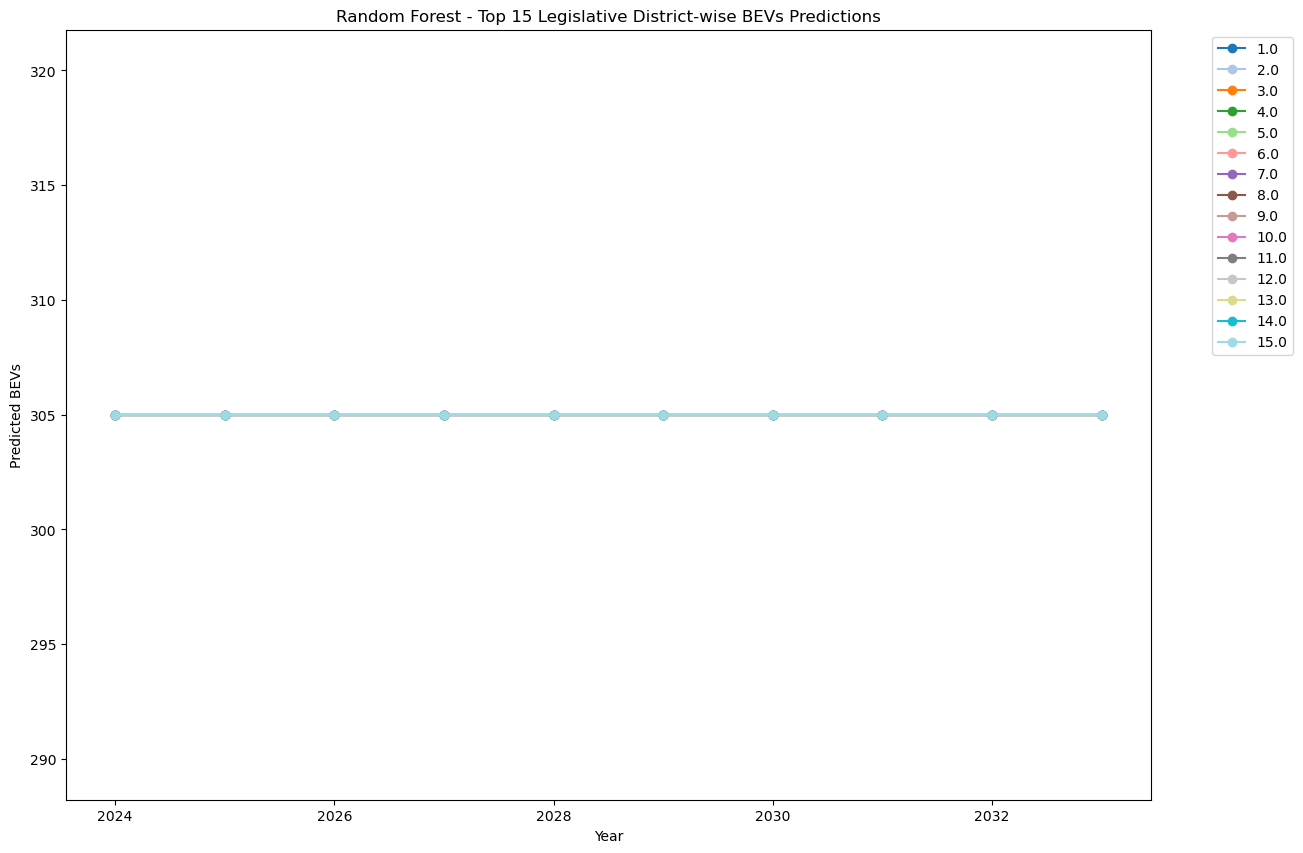

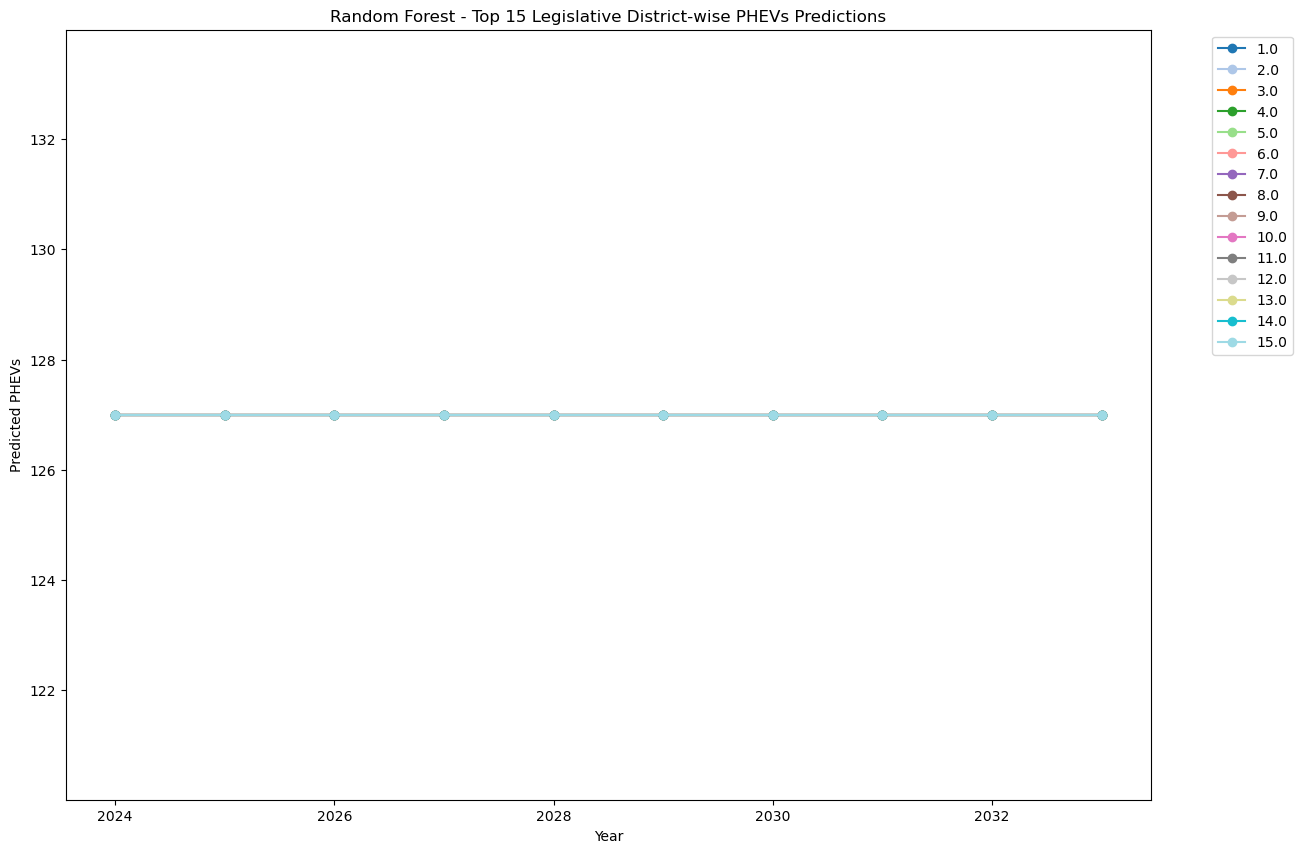

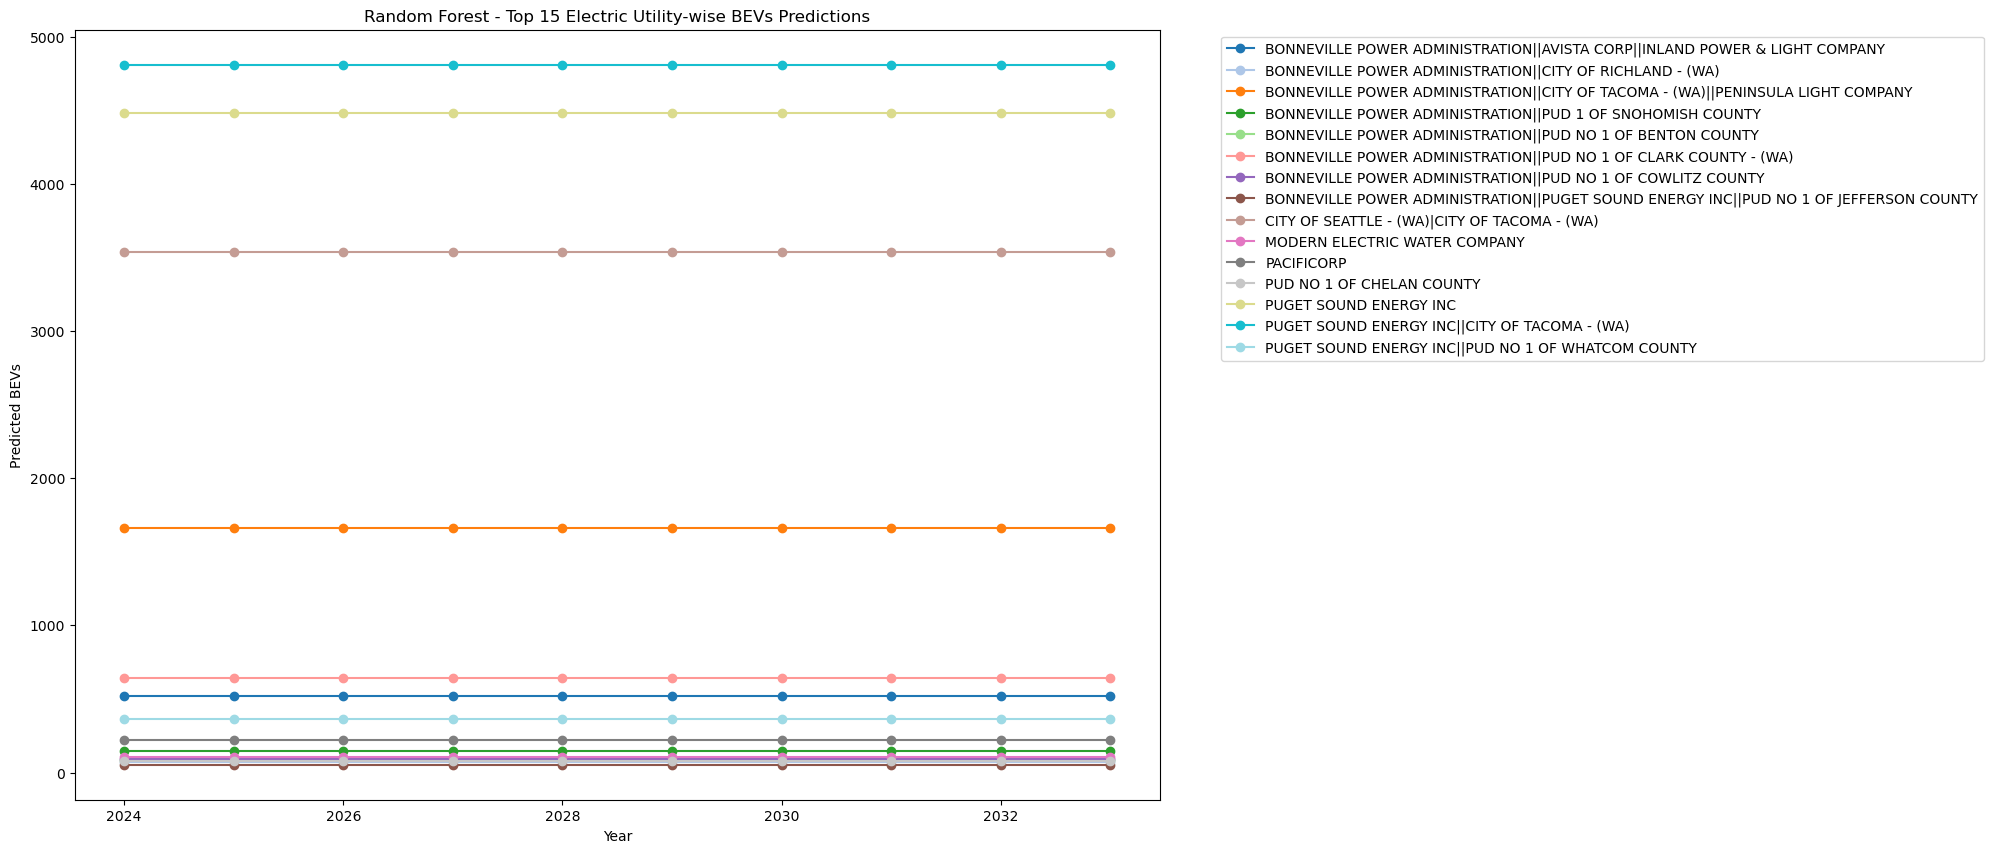

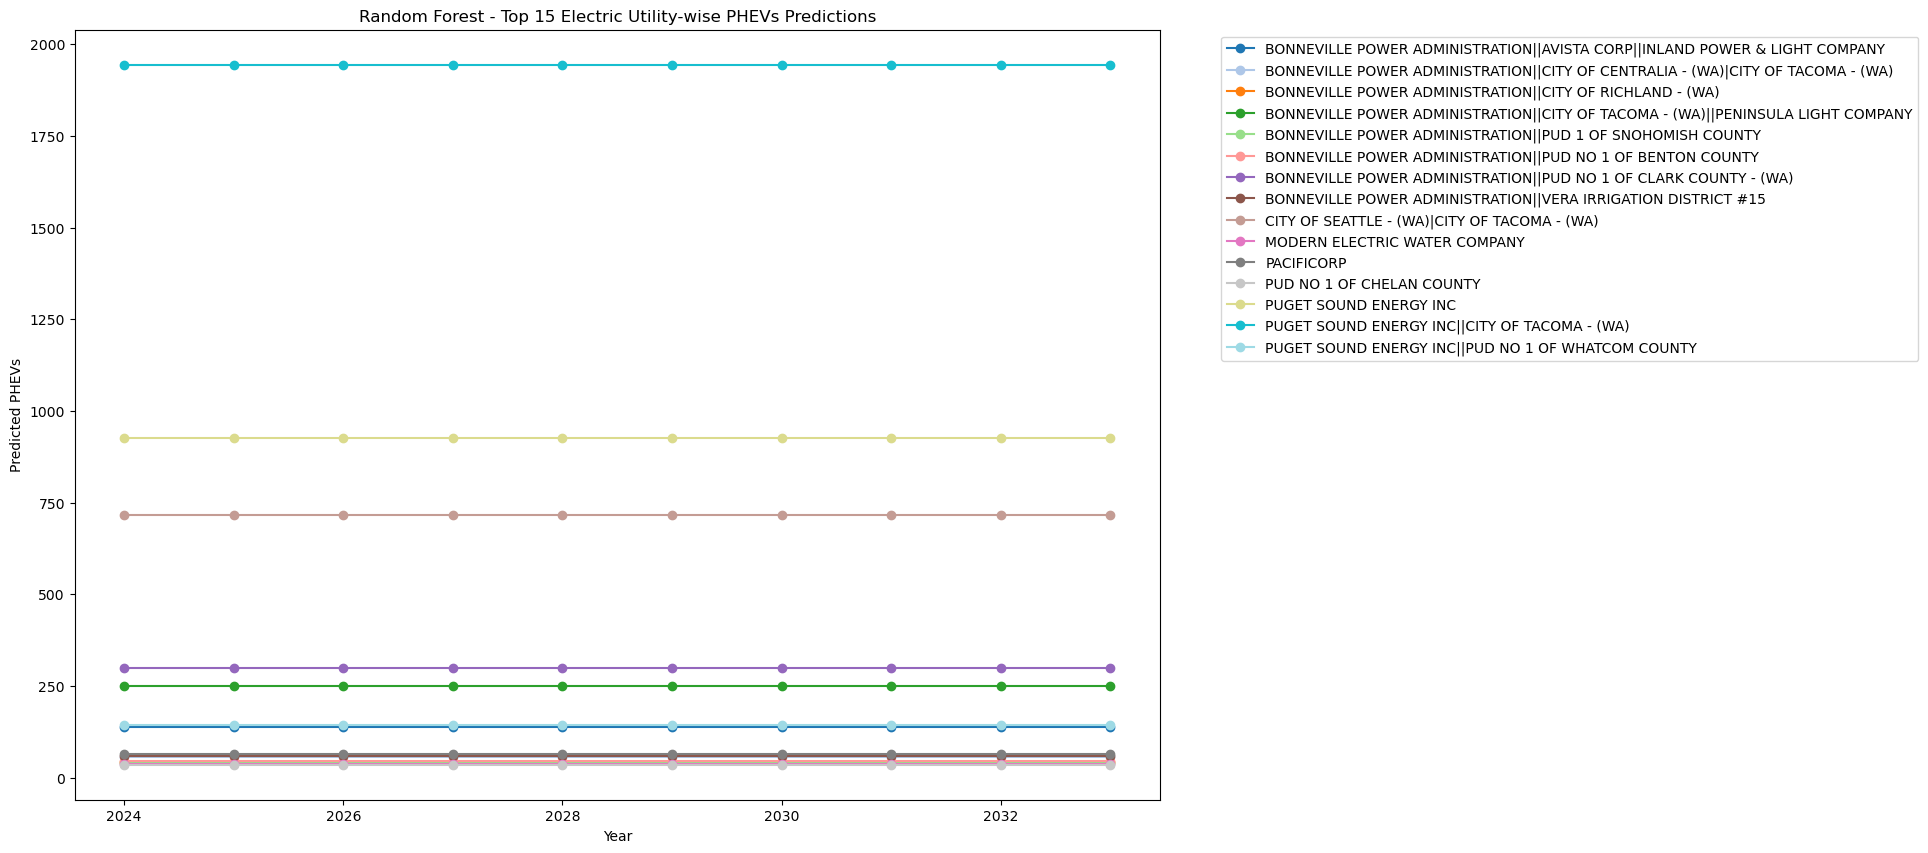

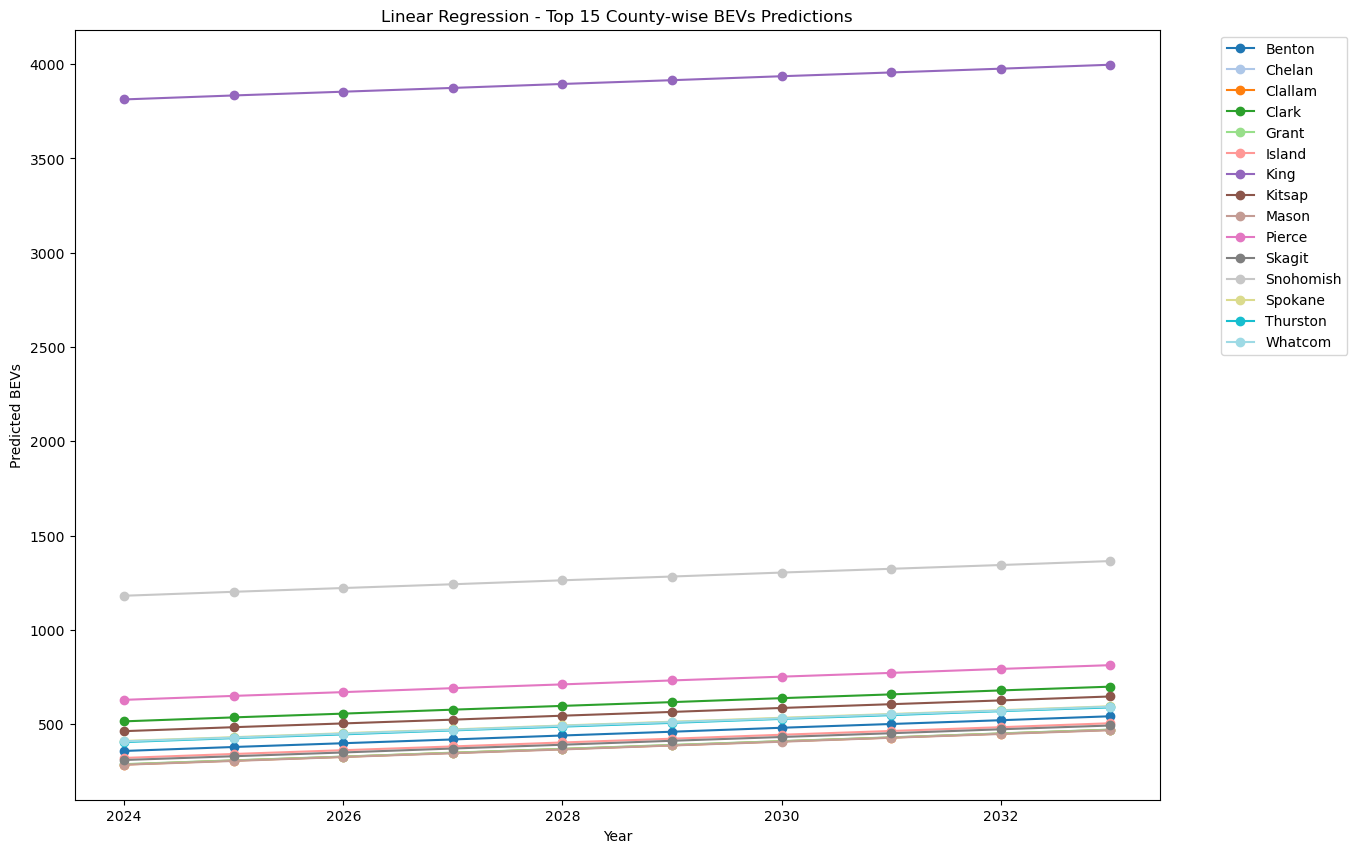

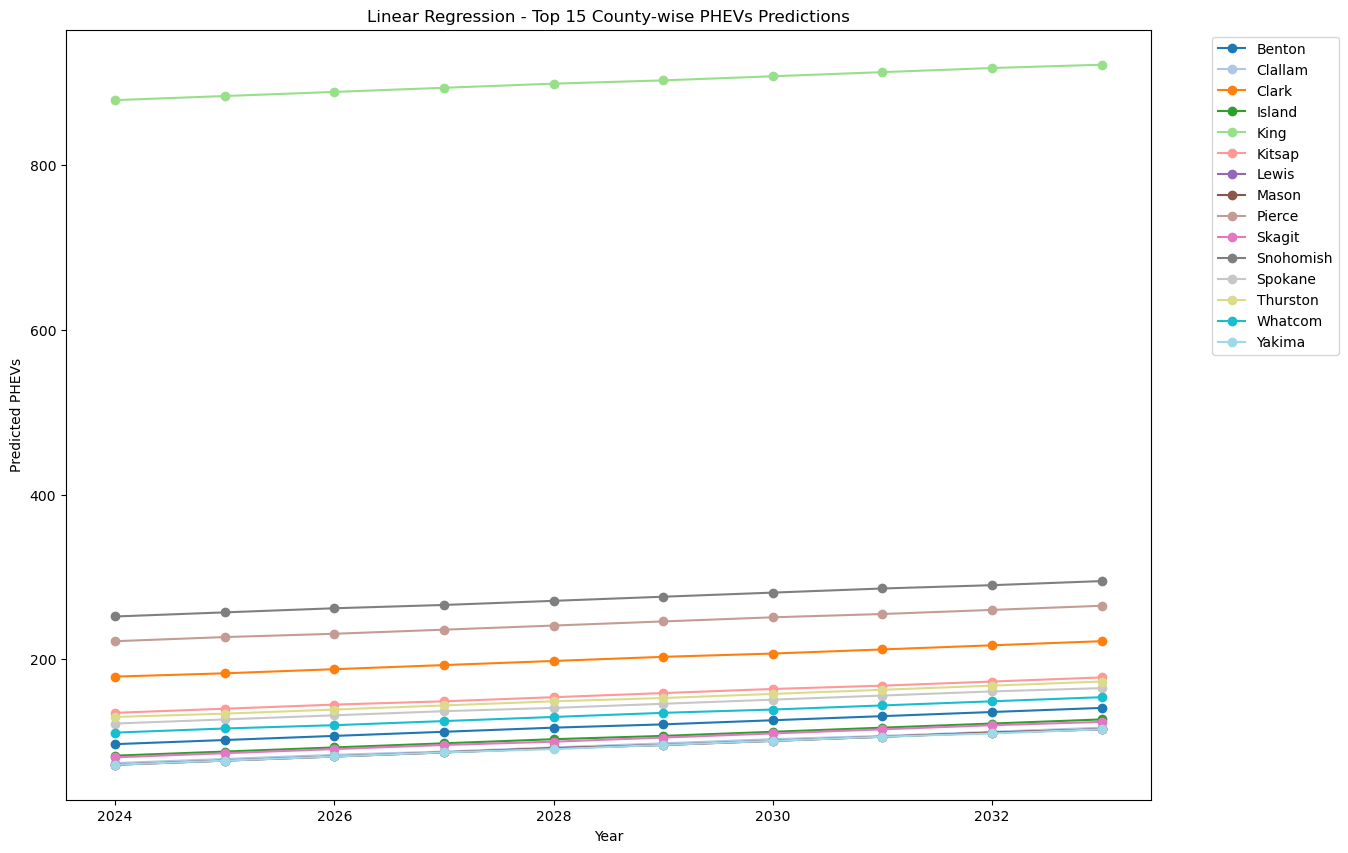

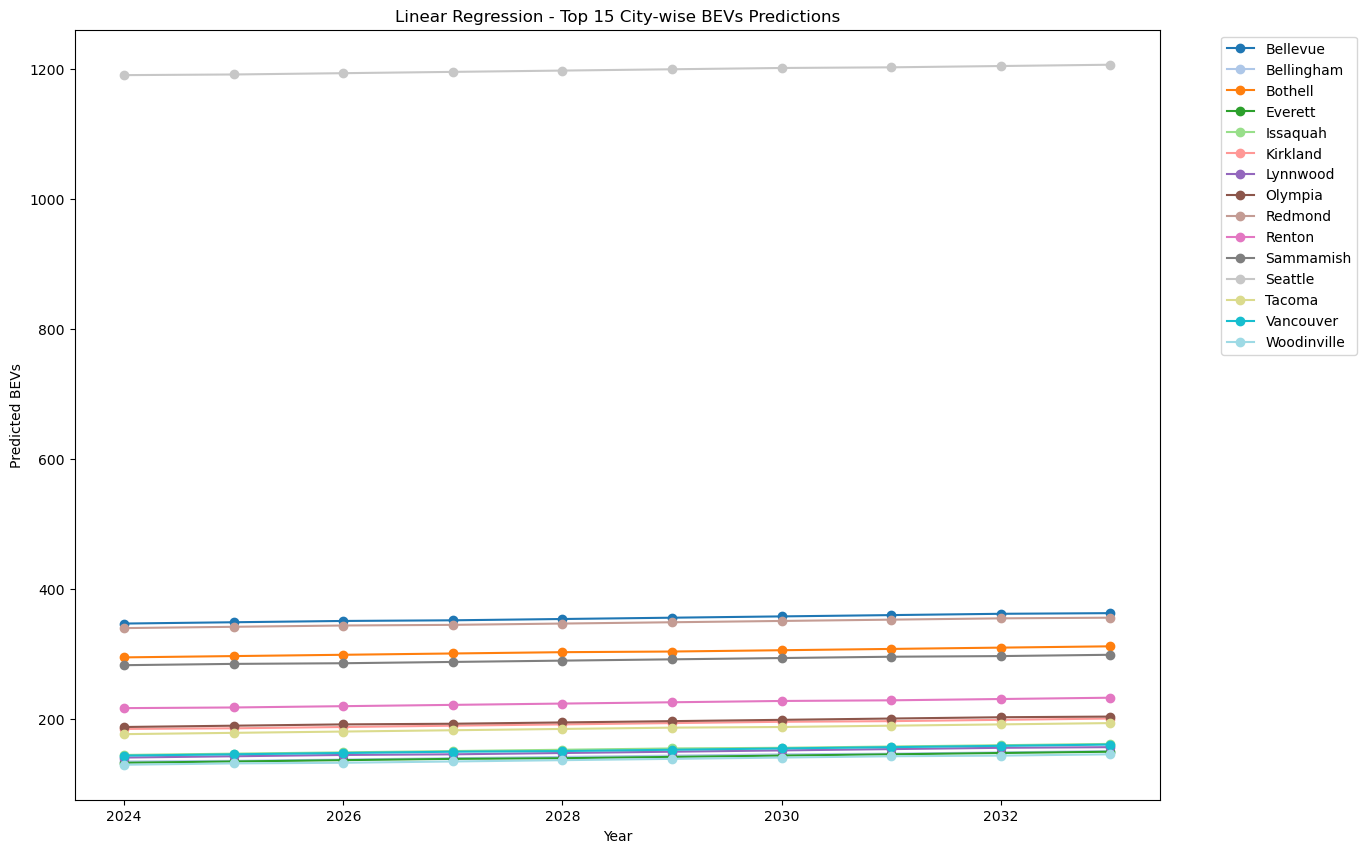

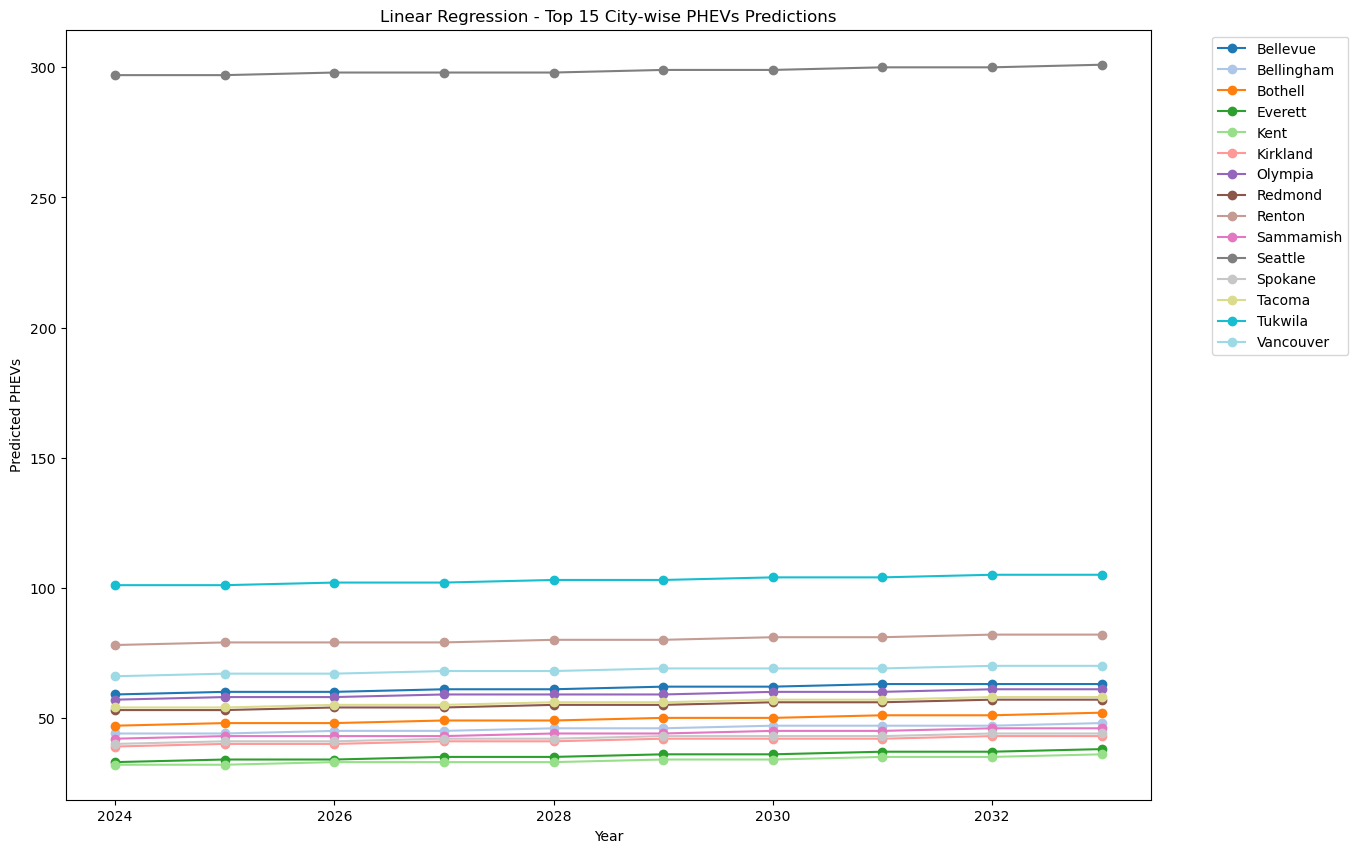

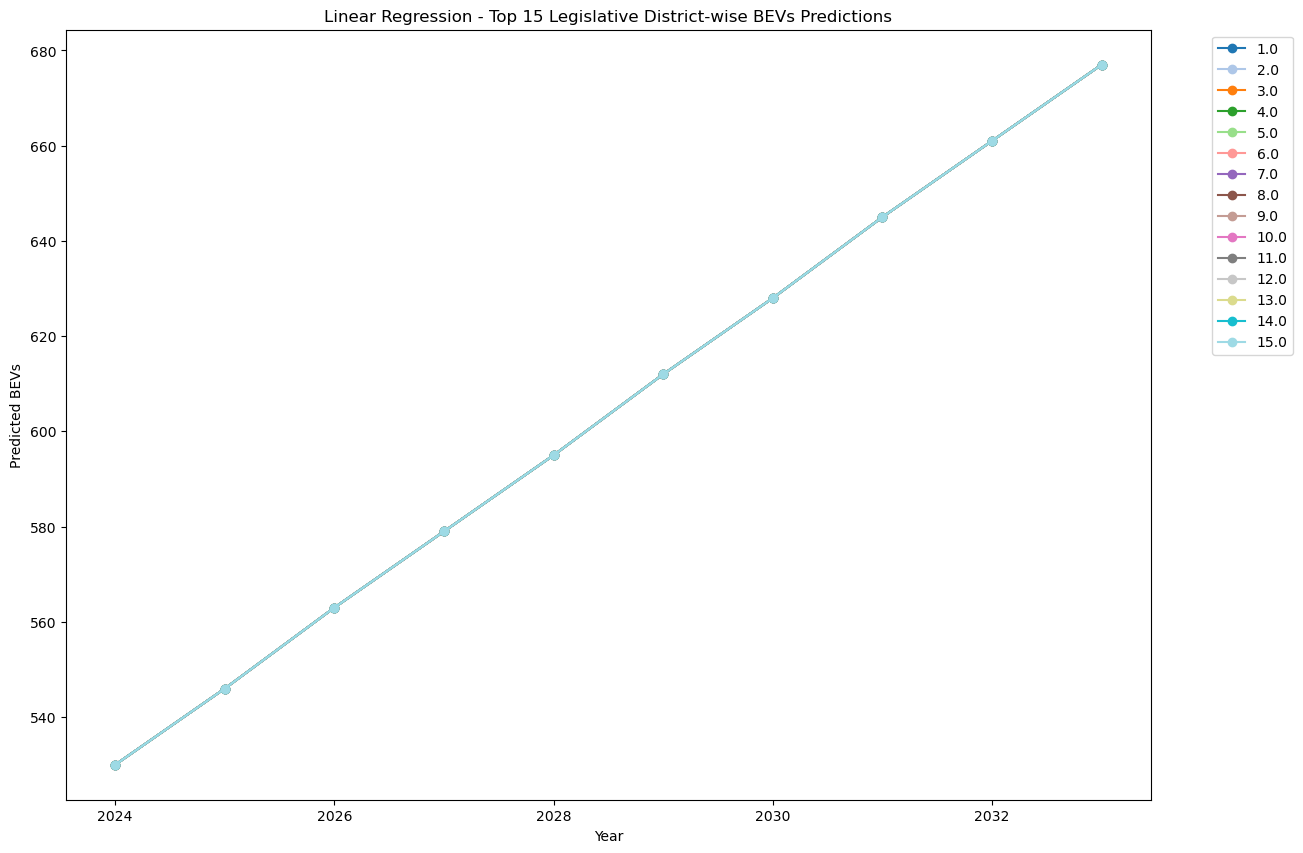

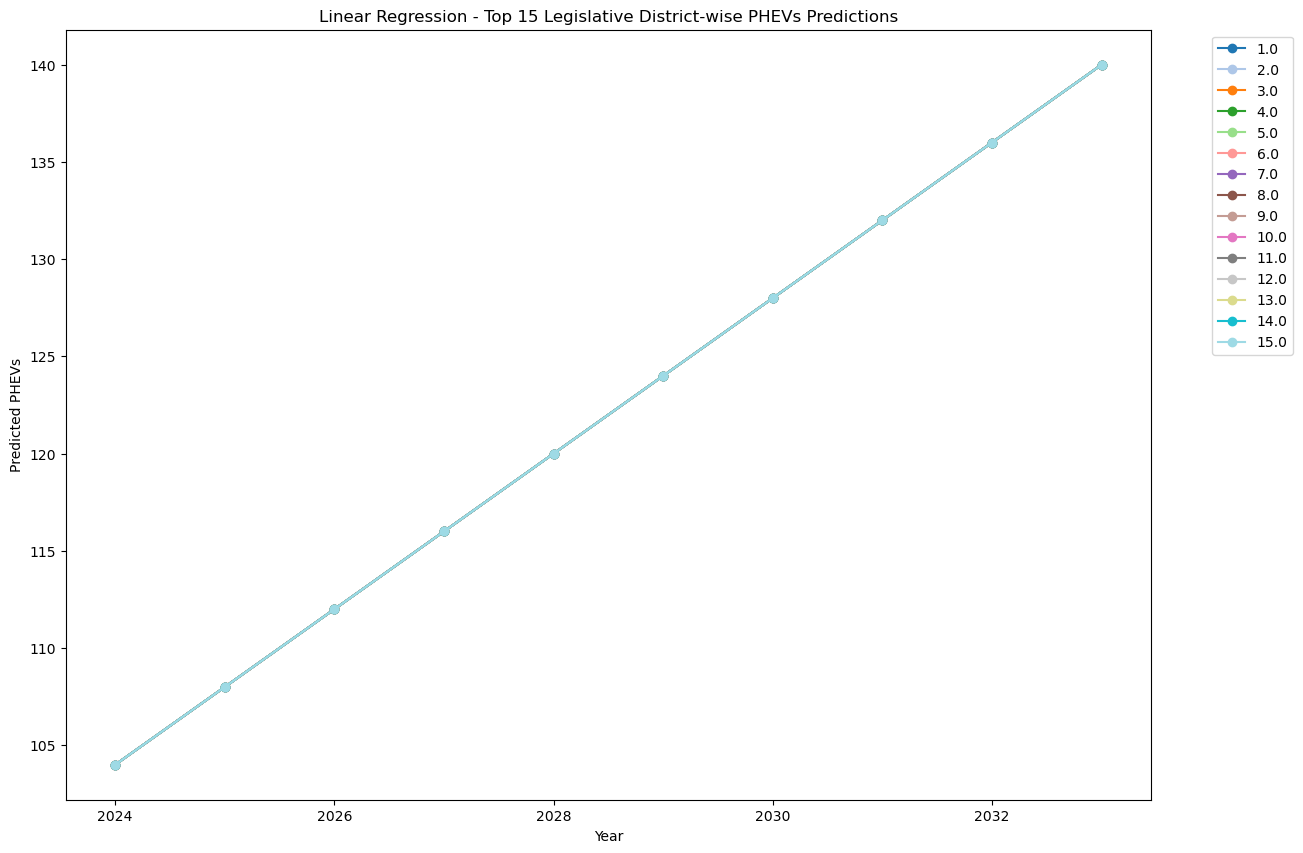

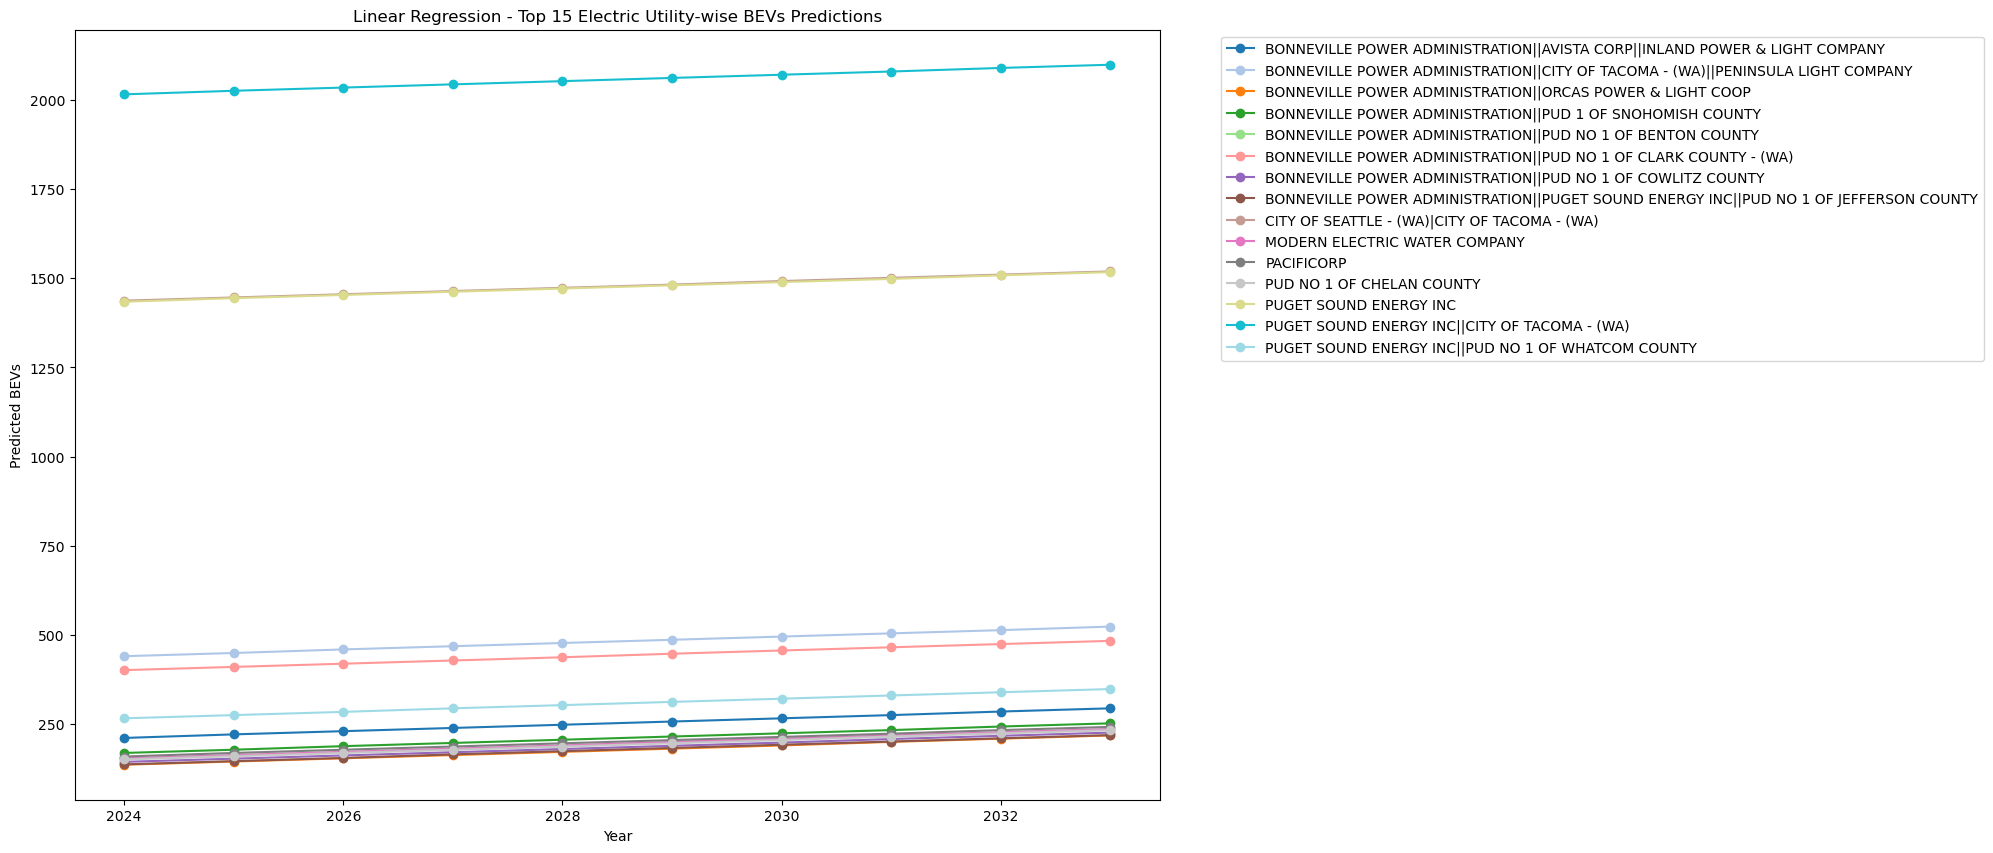

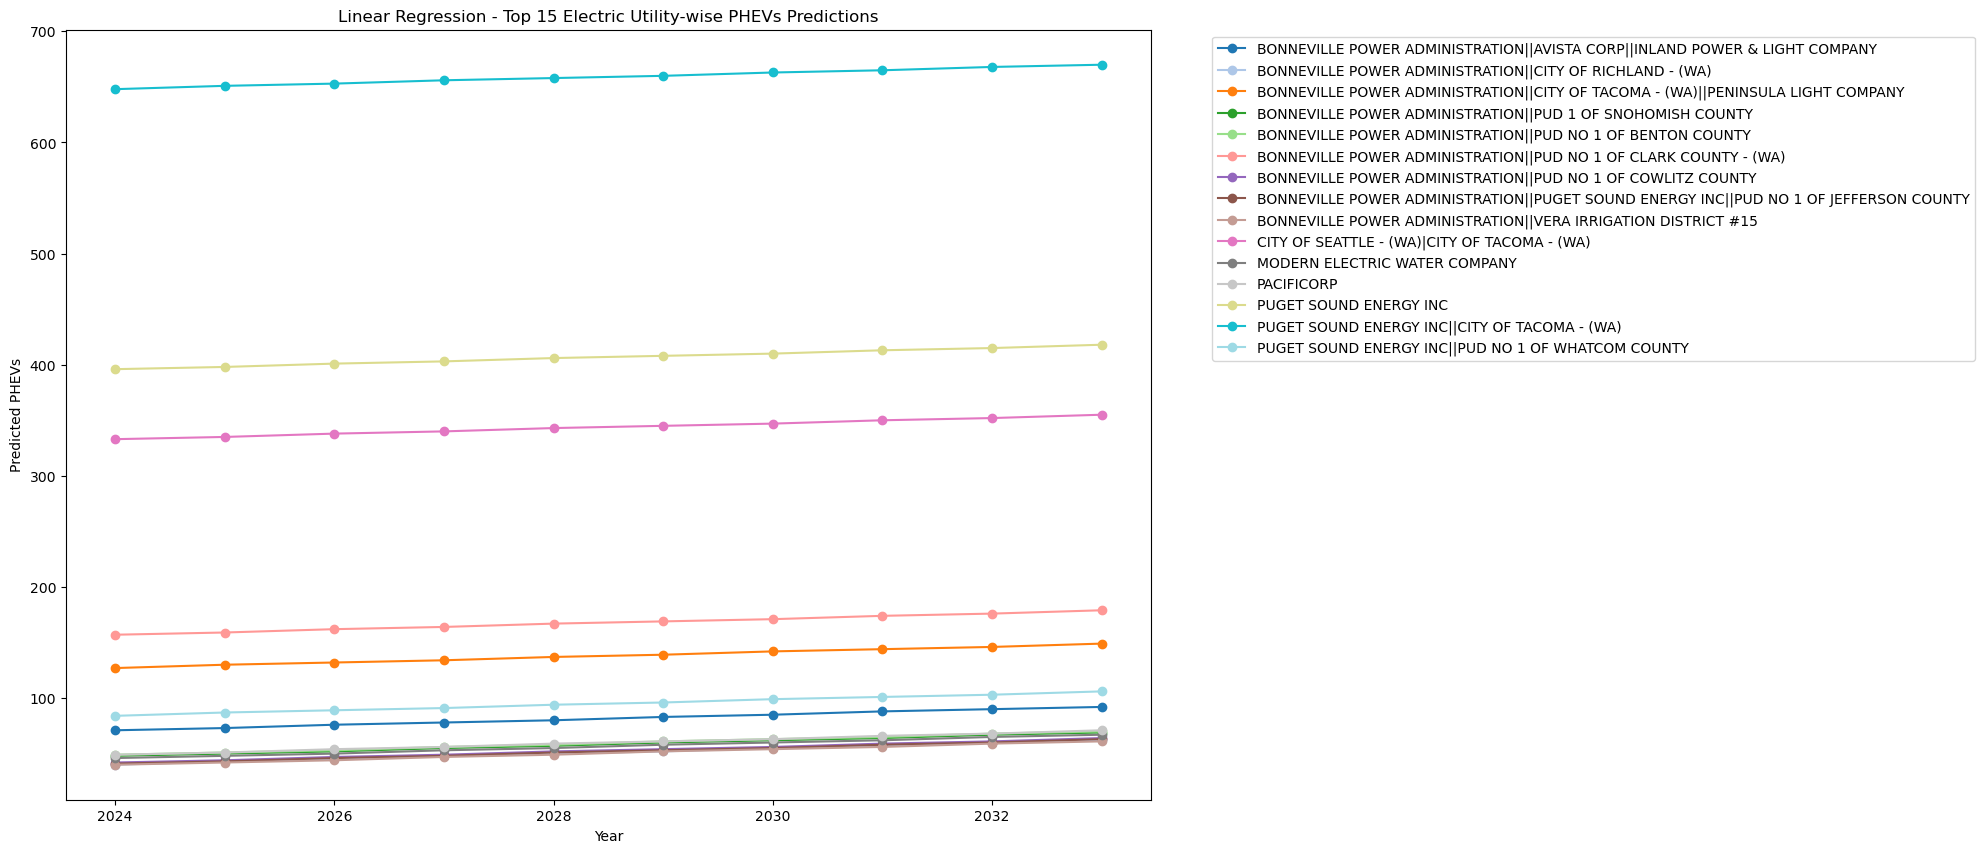

In [76]:
# import the necessary libraries for visualization
import matplotlib.pyplot as plt

# define a function named 'get_top_n' to get the top N categories based on total predicted values
def get_top_n(predictions, name_column, n=15):
    top_n_names = predictions.groupby(name_column)['Predicted_Values'].sum().nlargest(n).index
    return predictions[predictions[name_column].isin(top_n_names)]

# define a function named 'plot_top_predictions' to plot predictions for top N categories with distinct colors
def plot_top_predictions(predictions, title, xlabel, ylabel, name_column):
    plt.figure(figsize=(14, 10))
    # getting unique names from the predictions
    unique_names = predictions[name_column].unique()
    # retrieves the 'tab20' colormap from Matplotlib, which is a color palette with 20 distinct colors
    # also creating an array of evenly spaced values between 0 and 1. Each unique name gets assigned a distinct color from the colormap.
    colors = plt.colormaps['tab20'](np.linspace(0, 1, len(unique_names)))
    # iterates over the unique names providing the index and value of each element in unique_names
    for i, name in enumerate(unique_names):
        # creating a subset and extracts the data for a specific category
        subset = predictions[predictions[name_column] == name]
        # creating a plot from the subset
        plt.plot(subset['Year'], subset['Predicted_Values'], marker='o', label=name, color=colors[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Apply the function to get the top 15 (BEV and PHEV) for each county under the random forest regression model
top_15_rf_bev_county = get_top_n(predictions_rf_bev_county, 'County')
top_15_rf_phev_county = get_top_n(predictions_rf_phev_county, 'County')

# Apply the function to get the top 15 (BEV and PHEV) for each city under the random forest regression model
top_15_rf_bev_city = get_top_n(predictions_rf_bev_city, 'City')
top_15_rf_phev_city = get_top_n(predictions_rf_phev_city, 'City')

# Apply the function to get the top 15 (BEV and PHEV) for each legislative district under the random forest regression model
top_15_rf_bev_leg_dist = get_top_n(predictions_rf_bev_leg_dist, 'Legislative District')
top_15_rf_phev_leg_dist = get_top_n(predictions_rf_phev_leg_dist, 'Legislative District')

# Apply the function to get the top 15 (BEV and PHEV) for each electric utility under the random forest regression model
top_15_rf_bev_elec_utility = get_top_n(predictions_rf_bev_elec_utility, 'Electric Utility')
top_15_rf_phev_elec_utility = get_top_n(predictions_rf_phev_elec_utility, 'Electric Utility')

# Apply the function to get the top 15 (BEV and PHEV) for each county under the linear regression model
top_15_lr_bev_county = get_top_n(predictions_lr_bev_county, 'County')
top_15_lr_phev_county = get_top_n(predictions_lr_phev_county, 'County')

# Apply the function to get the top 15 (BEV and PHEV) for each city under the linear regression model
top_15_lr_bev_city = get_top_n(predictions_lr_bev_city, 'City')
top_15_lr_phev_city = get_top_n(predictions_lr_phev_city, 'City')

# Apply the function to get the top 15 (BEV and PHEV) for each legislative district under the linear regression model
top_15_lr_bev_leg_dist = get_top_n(predictions_lr_bev_leg_dist, 'Legislative District')
top_15_lr_phev_leg_dist = get_top_n(predictions_lr_phev_leg_dist, 'Legislative District')

# Apply the function to get the top 15 (BEV and PHEV) for each electric utility under the linear regression model
top_15_lr_bev_elec_utility = get_top_n(predictions_lr_bev_elec_utility, 'Electric Utility')
top_15_lr_phev_elec_utility = get_top_n(predictions_lr_phev_elec_utility, 'Electric Utility')

# Plot top 15 BEV and PHEV predictions for Random Forest, county-wise
plot_top_predictions(top_15_rf_bev_county, 'Random Forest - Top 15 County-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'County')
plot_top_predictions(top_15_rf_phev_county, 'Random Forest - Top 15 County-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'County')

# Plot top 15 BEV and PHEV predictions for Random Forest, city-wise
plot_top_predictions(top_15_rf_bev_city, 'Random Forest - Top 15 City-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'City')
plot_top_predictions(top_15_rf_phev_city, 'Random Forest - Top 15 City-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'City')

# Plot top 15 BEV and PHEV predictions for Random Forest, legislative district-wise
plot_top_predictions(top_15_rf_bev_leg_dist, 'Random Forest - Top 15 Legislative District-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'Legislative District')
plot_top_predictions(top_15_rf_phev_leg_dist, 'Random Forest - Top 15 Legislative District-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'Legislative District')

# Plot top 15 BEV and PHEV predictions for Random Forest, electric utility-wise
plot_top_predictions(top_15_rf_bev_elec_utility, 'Random Forest - Top 15 Electric Utility-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'Electric Utility')
plot_top_predictions(top_15_rf_phev_elec_utility, 'Random Forest - Top 15 Electric Utility-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'Electric Utility')

# Plot top 15 BEV and PHEV predictions for Linear Regression, county-wise
plot_top_predictions(top_15_lr_bev_county, 'Linear Regression - Top 15 County-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'County')
plot_top_predictions(top_15_lr_phev_county, 'Linear Regression - Top 15 County-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'County')

# Plot top 15 BEV and PHEV predictions for Linear Regression, city-wise
plot_top_predictions(top_15_lr_bev_city, 'Linear Regression - Top 15 City-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'City')
plot_top_predictions(top_15_lr_phev_city, 'Linear Regression - Top 15 City-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'City')

# Plot top 15 BEV and PHEV predictions for Linear Regression, legislative district-wise
plot_top_predictions(top_15_lr_bev_leg_dist, 'Linear Regression - Top 15 Legislative District-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'Legislative District')
plot_top_predictions(top_15_lr_phev_leg_dist, 'Linear Regression - Top 15 Legislative District-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'Legislative District')

# Plot top 15 BEV and PHEV predictions for Linear Regression, electric utility-wise
plot_top_predictions(top_15_lr_bev_elec_utility, 'Linear Regression - Top 15 Electric Utility-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'Electric Utility')
plot_top_predictions(top_15_lr_phev_elec_utility, 'Linear Regression - Top 15 Electric Utility-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'Electric Utility')


Here are some conclusions drawn from the output of the Random Forest and Linear Regression predictions for Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) for different categories:

### General Observations:
1. **Linear Regression Predictions:**
   - **Increasing Trend:** Linear regression models show a clear increasing trend in BEVs and PHEVs across all categories over the years from 2024 to 2033. This indicates a steady growth in the adoption of electric vehicles.
   - **County-wise Analysis:** Larger counties such as King, Pierce, and Snohomish have higher predicted values for BEVs and PHEVs, reflecting their larger populations and possibly better infrastructure for electric vehicles.
   - **City-wise Analysis:** Cities within these counties also show increasing trends in electric vehicle adoption. Major cities likely have better facilities and incentives encouraging the switch to electric vehicles.
   - **Legislative District-wise Analysis:** Predictions are uniform across all legislative districts
   - **Electric Utility-wise Analysis:** Certain utilities, like Puget Sound Energy Inc., show higher predicted values, indicating areas served by these utilities may have better infrastructure or incentives for electric vehicles.

2. **Random Forest Predictions:**
   - **Static Predictions:** Random Forest model predictions are static over the years, indicating no growth in the adoption of electric vehicles. This suggests that the model might not be capturing the temporal growth trends adequately.
   - **County-wise Analysis:** High predicted values for BEVs and PHEVs in counties like King, Pierce, and Snohomish indicate these counties have high electric vehicle adoption. However, the lack of growth over the years suggests potential limitations in the model.
   - **City-wise Analysis:** Many cities have zero predicted values, which might indicate a limitation in the model's ability to capture data at a granular city level or a lack of historical data for those cities.
   - **Legislative District-wise Analysis:** Similar to the city-wise predictions, legislative district-wise predictions show static values, reflecting the same limitation of the model.
   - **Electric Utility-wise Analysis:** Certain utilities, like Puget Sound Energy Inc., show higher predicted values, but again, there is no growth over the years.

### Specific Insights:
1. **King County:**
   - **Linear Regression:** Predicted to see the most significant increase in BEVs, from 3813 in 2024 to 3997 in 2033.
   - **Random Forest:** Shows a static prediction of 19035 BEVs consistently from 2024 to 2033, indicating high current adoption but not reflecting future growth.

2. **Pierce County:**
   - **Linear Regression:** Predicted increase from 629 BEVs in 2024 to 813 BEVs in 2033.
   - **Random Forest:** Static prediction of 931 BEVs from 2024 to 2033.

3. **Electric Utilities:**
   - **Linear Regression:** Shows a gradual increase in predictions, with utilities like Puget Sound Energy Inc. growing from 1434 BEVs in 2024 to 1517 BEVs in 2033.
   - **Random Forest:** Static predictions, with Puget Sound Energy Inc. showing 4482 BEVs consistently over the years.


**Conclusion**

An analysis after using existing geographical features like City, County, Legislative District, and Electric Utility shows that while we can get some idea of electric vehicle (EV) adoption trends, the predictions aren’t as accurate as we would like. The current models, struggle to fit the data well indicating that there is still room for improvement.

To really understand and predict how many people will start using electric cars, we need to look beyond just where they live. We need to incorporate additional factors that paint a fuller picture of the people and the economy in those areas. Here are some key factors that could make our predictions much better:

**Population Growth:** Areas with rapid population growth are likely to see more new vehicles, including EVs.
**Income Levels:** Higher income levels mean more people can afford electric vehicles.
**Average Household Income:** Places with higher disposable income tend to have higher EV adoption rates.
**Unemployment Rate:** Economic stability, shown by lower unemployment rates, can influence people's ability to buy new cars.
**Electricity Costs:** Lower electricity costs can make electric vehicles more appealing compared to traditional fuel vehicles.

Adding these demographic and economic factors will help us create a more accurate and reliable prediction model. This, in turn, will help policymakers and businesses make better decisions about where to focus their efforts and resources to promote electric vehicle adoption.

**Recommendations**

To improve our predictions and provide actionable insights, we should:

**Gather More Data:** Collect information on population growth, income levels, average household income, unemployment rates, and electricity costs.
Integrate New Features: Add these new data points to our existing dataset and prepare them for analysis.

**Retrain Models:** Use the enhanced dataset to train our machine learning models and evaluate the improvements.
**Select Key Features:** Identify which new features have the most impact on predictions using methods like feature importance scores.

By incorporating these additional demographic and economic factors, we’ll be able to make much more accurate predictions. This will help in strategically promoting electric vehicle adoption, leading to a cleaner, more sustainable future.



<p style="font-size:30px;"><b><u>Research Question No.3</u></b></p>

<p style="font-size:20px;"><b>How do geographic location and local infrastructure (electric utilities) impact EV adoption in Washington?</b></p>

<u>STEP I</u>

<b>Creating New Features for EV Counts by Geographic and Infrastructure Categories</b>

In [77]:
import warnings
import pandas as pd

# suppressing any unnecessary future warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# creating a copy of the electric_v dataset. Further analysis will be done on 'elec_dataset'
elec_dataset = electric_v

# Create a new feature for the number of EVs per county
ev_count_per_county = elec_dataset.groupby('County')['DOL Vehicle ID'].count().reset_index()
# naming the columns of 'ev_count_per_county'
ev_count_per_county.columns = ['County', 'EV_Count_County']
# Merge this feature back into the elec_dataset
elec_dataset = elec_dataset.merge(ev_count_per_county, on = 'County', how = 'left')

# Create a new feature for the number of EVs per city
ev_count_per_city = elec_dataset.groupby('City')['DOL Vehicle ID'].count().reset_index()
# naming the columns of 'ev_count_per_city'
ev_count_per_city.columns = ['City', 'EV_Count_City']
# Merge this feature back into the elec_dataset
elec_dataset =elec_dataset.merge(ev_count_per_city, on = 'City', how = 'left')

# Create a new feature for the number of EVs per legislative district
ev_count_per_leg_dist = elec_dataset.groupby('Legislative District')['DOL Vehicle ID'].count().reset_index()
# naming the columns of 'ev_count_per_leg_dist'
ev_count_per_leg_dist.columns = ['Legislative District', 'EV_Count_Leg_Dist']
# Merge this feature back into the elec_dataset
elec_dataset =elec_dataset.merge(ev_count_per_leg_dist, on = 'Legislative District', how = 'left')

# Create a new feature for the number of EVs per electric utility
ev_count_per_utility = elec_dataset.groupby('Electric Utility')['DOL Vehicle ID'].count().reset_index()
# naming the columns of 'ev_count_per_utility'
ev_count_per_utility.columns = ['Electric Utility', 'EV_Count_Utility']
# Merge this feature back into the elec_dataset
elec_dataset =elec_dataset.merge(ev_count_per_utility, on = 'Electric Utility', how = 'left')


New features that represent the count of electric vehicles (EVs) in different geographic and infrastructure-related categories. These new features are essential for understanding the geographic and infrastructural distribution of EV adoption and also for further analysis.

<u>STEP II</u>

<b>Summary Statistics and Visualization</b>

         Postal Code     Model Year  Electric Range  DOL Vehicle ID  \
count  186471.000000  186471.000000   186471.000000    1.864710e+05   
mean    98261.647527    2020.661148       56.683731    2.225855e+08   
std       304.624225       2.991387       90.771207    7.463921e+07   
min     98001.000000    1997.000000        0.000000    4.385000e+03   
25%     98052.000000    2019.000000        0.000000    1.851589e+08   
50%     98122.000000    2022.000000        0.000000    2.302291e+08   
75%     98371.000000    2023.000000       73.000000    2.578035e+08   
max     99403.000000    2024.000000      337.000000    4.792548e+08   

            Latitude      Longitude           Year  EV_Count_County  \
count  186471.000000  186471.000000  186471.000000    186471.000000   
mean       47.462836    -122.079426    2020.661148     55679.203978   
std         0.610882       1.020595       2.991387     43378.814056   
min        45.595997    -124.614078    1997.000000         3.000000   
25%  

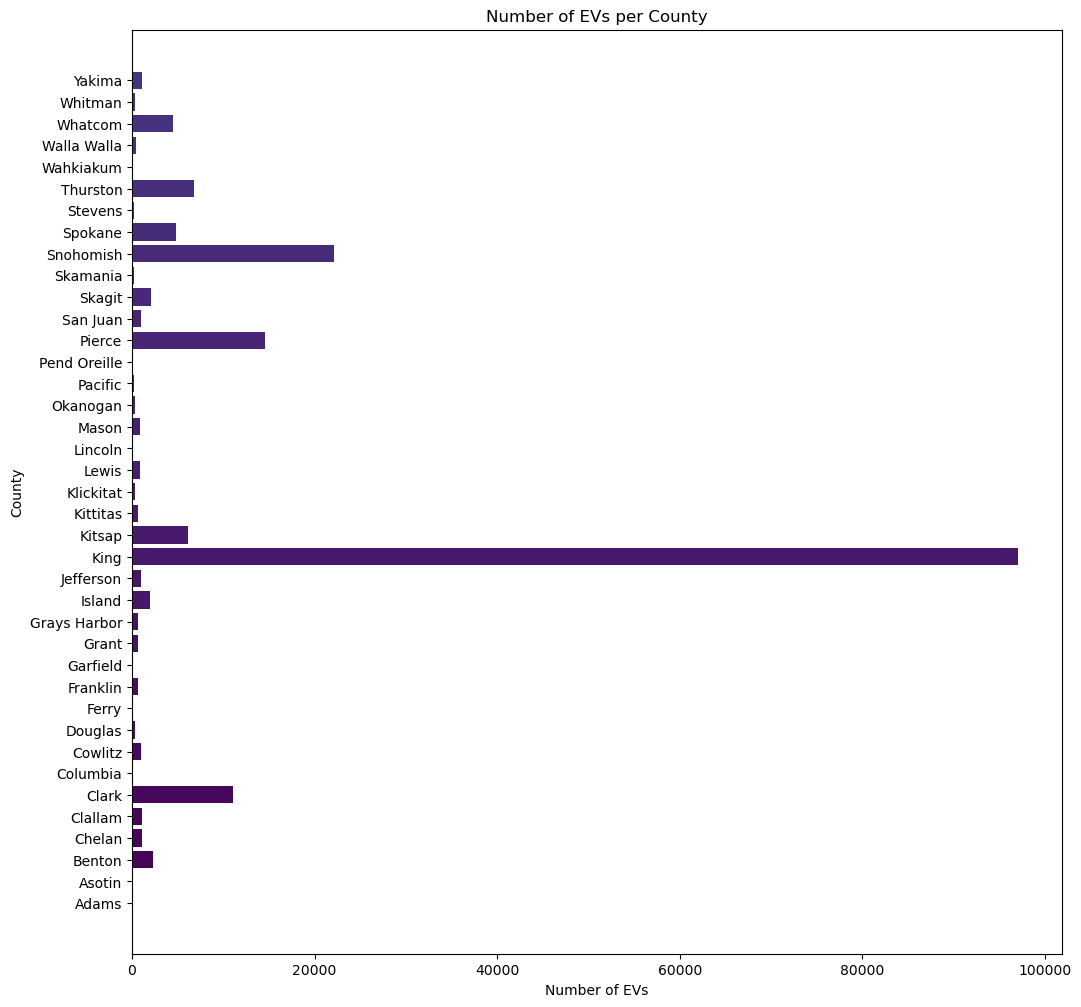

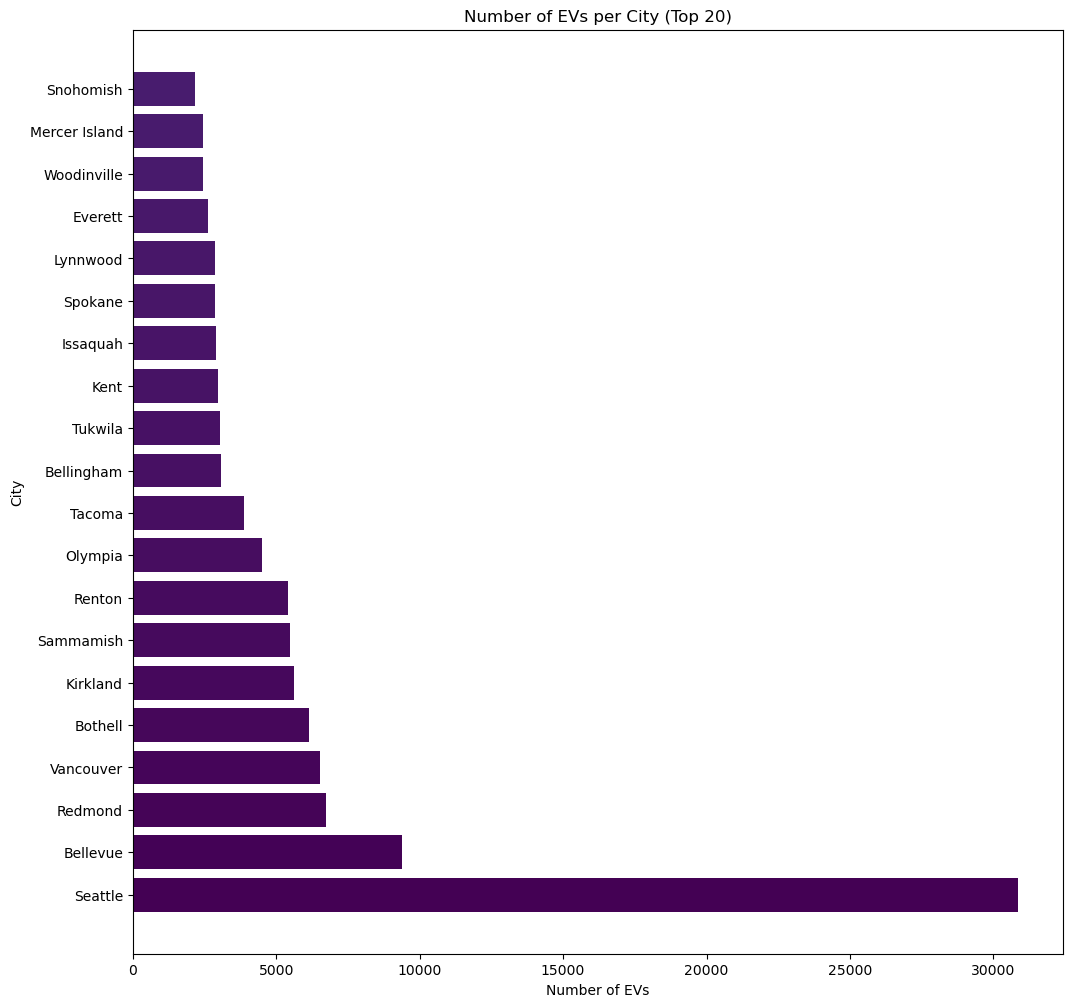

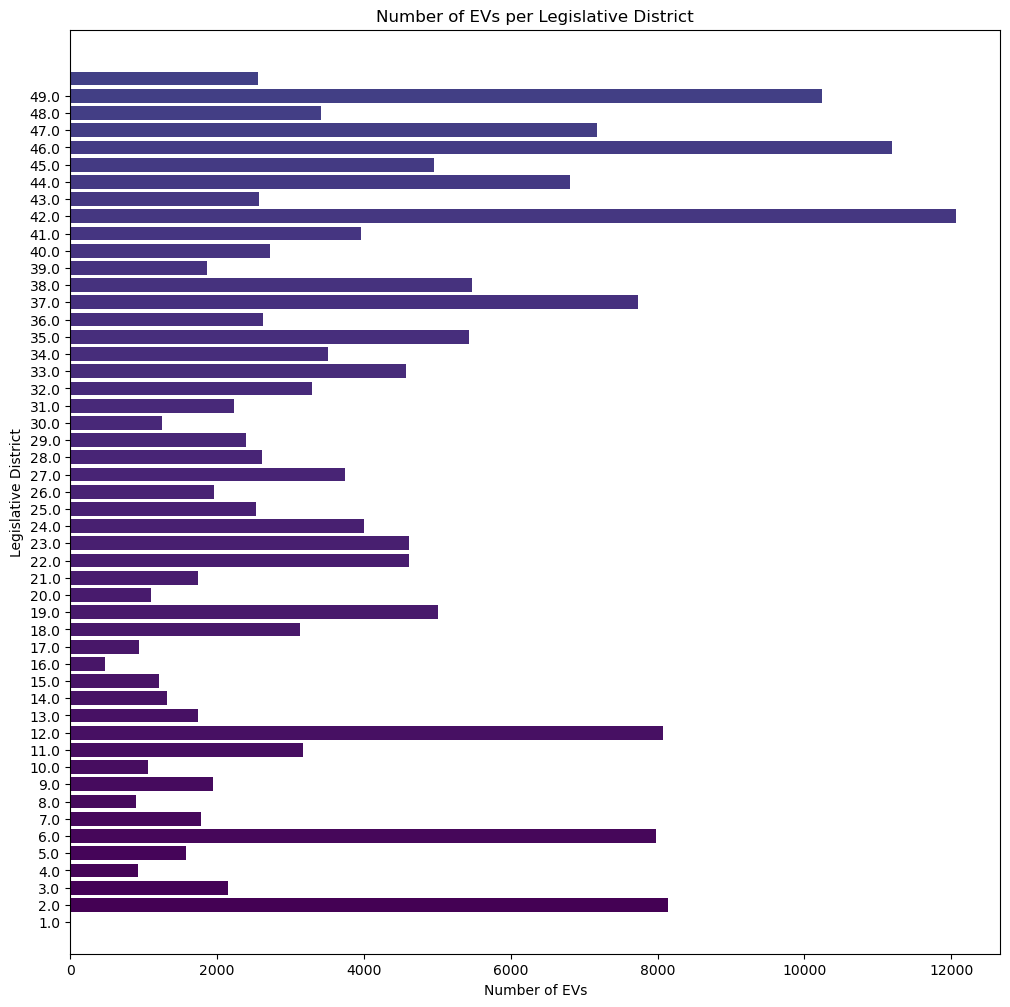

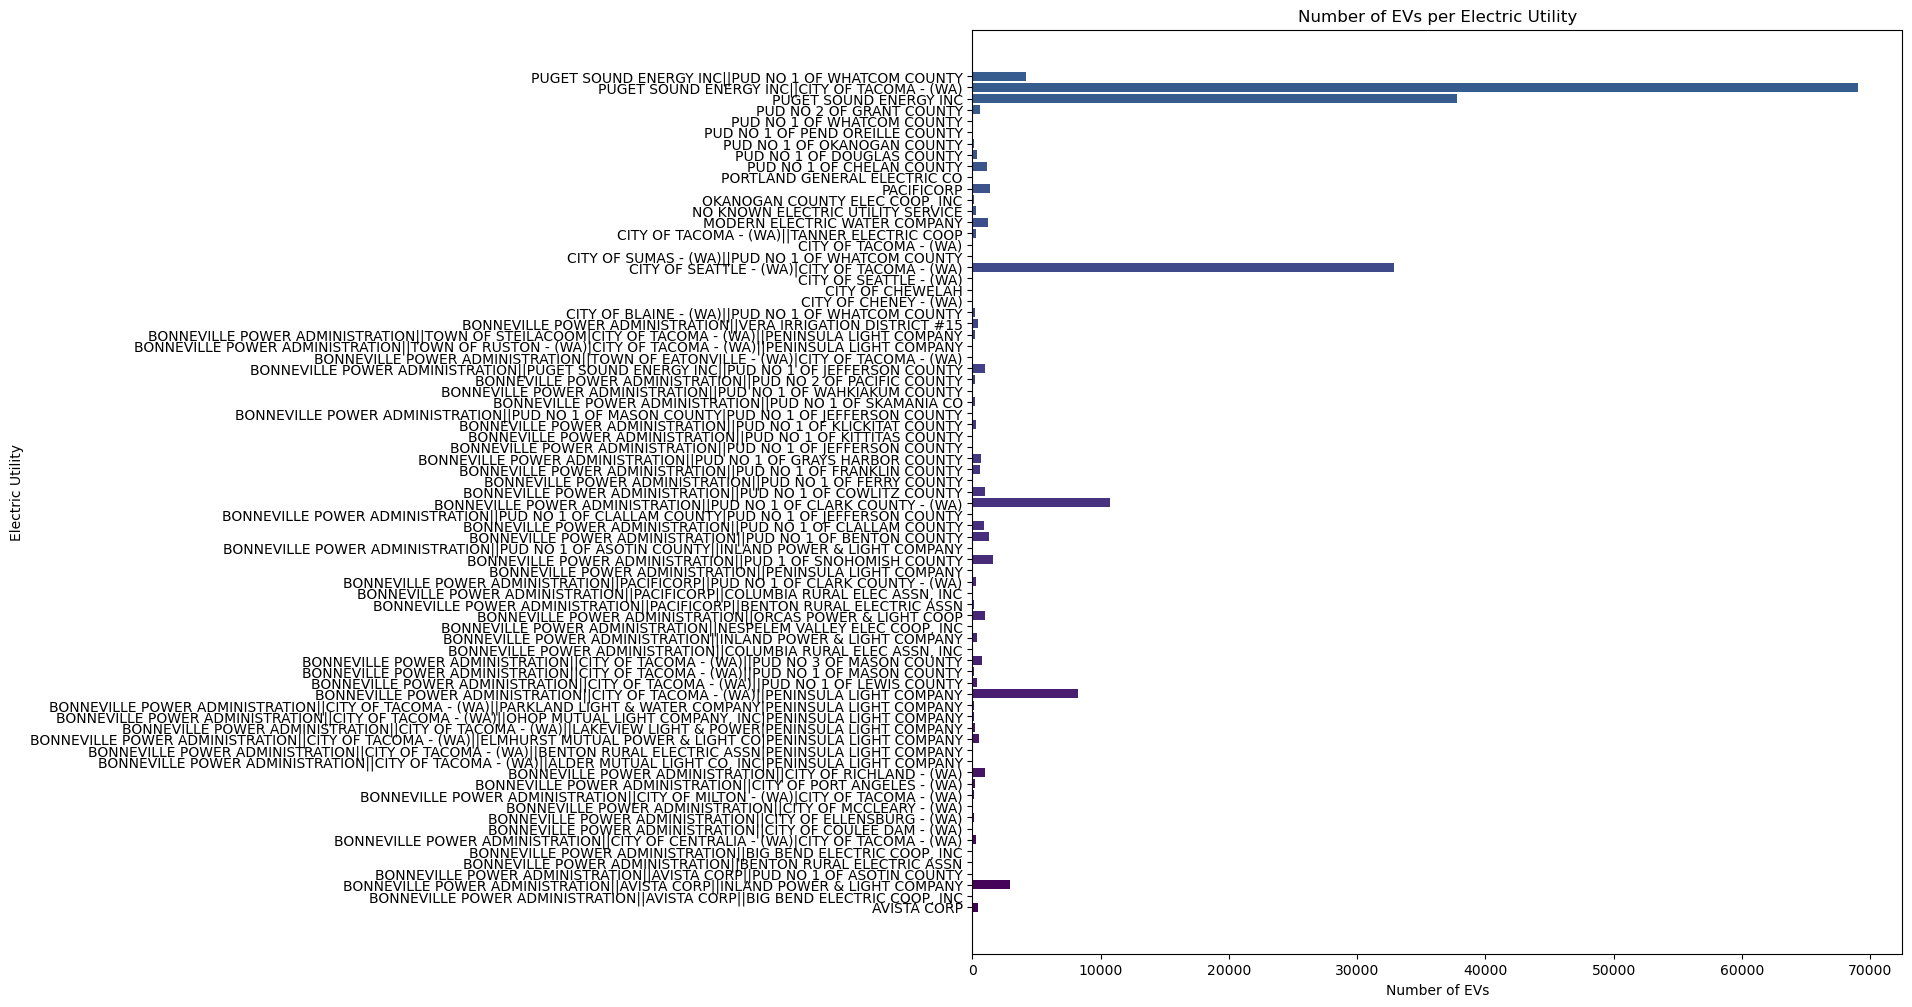

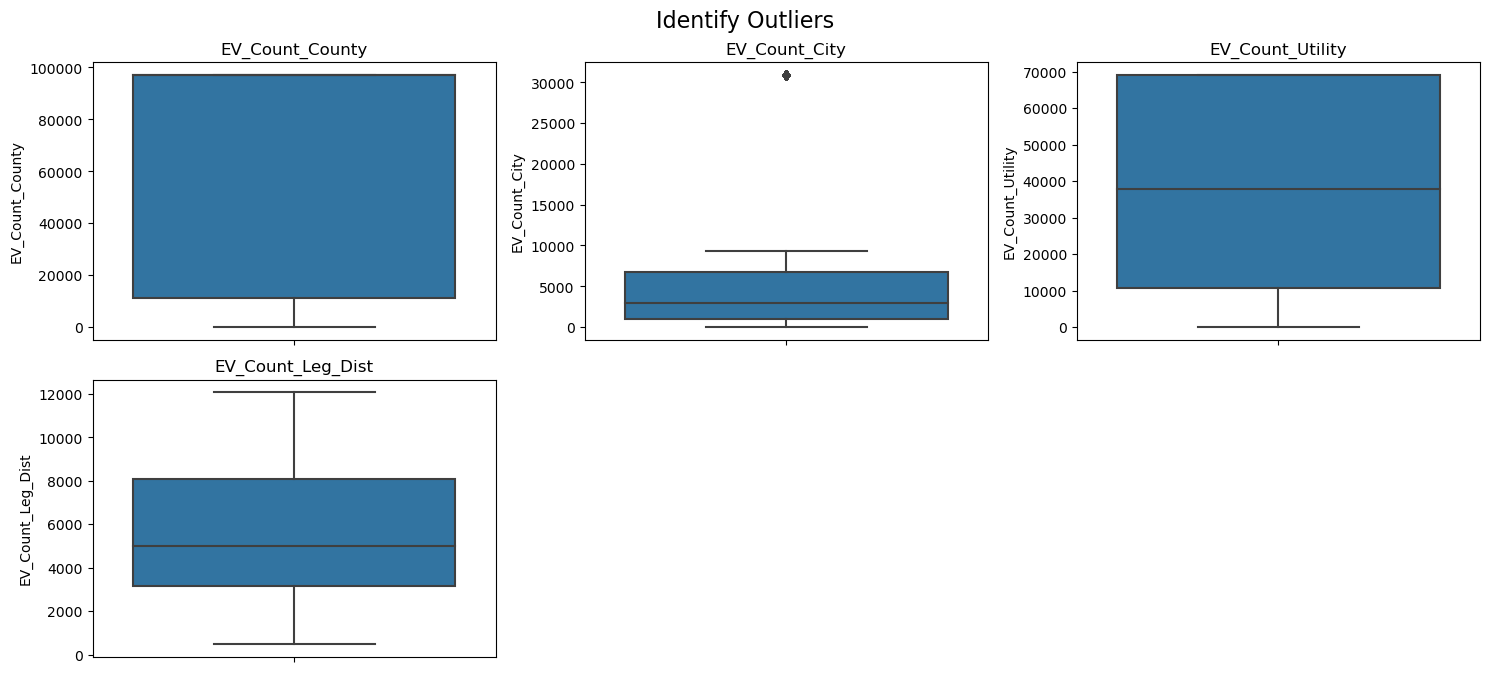

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

# suppressing any unnecessary future warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# printing the summary statistics of 'elec_dataset'
print(elec_dataset.describe())

# creating bar plots for categorical variables
# horizontal bar plot for 'ev_count_per_county' data
plt.figure(figsize=(12, 12))
# bar plot for ev count per county. Returns an array of colors, one for each county, creating a gradient effect
plt.barh(ev_count_per_county['County'], ev_count_per_county['EV_Count_County'], color=plt.cm.viridis(range(len(ev_count_per_county))))
plt.title('Number of EVs per County')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.show()

# horizontal bar plot for 'ev_count_per_city' data (Top 20)
top_city_counts = ev_count_per_city.nlargest(20, 'EV_Count_City')
plt.figure(figsize=(12, 12))
# bar plot for ev count per city. Returns an array of colors, one for each city, creating a gradient effect
plt.barh(top_city_counts['City'], top_city_counts['EV_Count_City'], color=plt.cm.viridis(range(len(top_city_counts))))
plt.title(f'Number of EVs per City (Top 20)')
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.show()

# horizontal bar plot for 'ev_count_per_leg_dist' data
plt.figure(figsize=(12, 12))
y_pos = np.arange(len(ev_count_per_leg_dist['Legislative District']))
# bar plot for ev count per legislative district. Returns an array of colors, one for each city, creating a gradient effect
plt.barh(ev_count_per_leg_dist['Legislative District'], ev_count_per_leg_dist['EV_Count_Leg_Dist'], color = plt.cm.viridis(range(len(ev_count_per_leg_dist))))
# making sure the y-axis has all the legislative districts
plt.yticks(y_pos, ev_count_per_leg_dist['Legislative District'])
plt.title('Number of EVs per Legislative District')
plt.xlabel('Number of EVs')
plt.ylabel('Legislative District')
plt.show()


#  horizontal bar plot for 'ev_count_per_utility' data
plt.figure(figsize=(12, 12))
# bar plot for ev count per legislative district. Returns an array of colors, one for each legislative district, creating a gradient effect
plt.barh(ev_count_per_utility['Electric Utility'], ev_count_per_utility['EV_Count_Utility'], color = plt.cm.viridis(range(len(ev_count_per_utility))))
plt.title('Number of EVs per Electric Utility')
plt.xlabel('Number of EVs')
plt.ylabel('Electric Utility')
plt.show()


# creating a list of geographic and infrastructure related features
feature_var = ['EV_Count_County', 'EV_Count_City', 'EV_Count_Utility', 'EV_Count_Leg_Dist']

# creating box plots for each feature to identify outliers
plt.figure(figsize=(15, 10))
# This is a for-loop that iterates over the feature_var list. i is the index of the current item, and column is the name of the current column.
for i, column in enumerate(feature_var):
    # creates a subplot grid with 3 rows and 3 columns and places the current plot in the (i+1)th position
    plt.subplot(3, 3, i+1)
    # creating verticle boxplot for current column data in 'elec_dataset'
    sns.boxplot(y=elec_dataset[column])
    plt.title(column)
plt.suptitle("Identify Outliers", fontsize = 16)
plt.tight_layout()
plt.show()

**<u>Interpretation and Observations:</u>**

1. **Summary Statistics:**
   - **Postal Code, Model Year, Electric Range, DOL Vehicle ID:**
     - The data set comprises 186,471 observations.
     - The average model year is around 2020.66, suggesting most vehicles are recent.
     - Electric range varies significantly with a mean of 56.68 miles but a high standard deviation, indicating diverse electric vehicle models.
     - The DOL Vehicle ID is a unique identifier for each vehicle.
   - **Latitude and Longitude:**
     - The data points primarily fall within the latitude range of 45.59 to 48.99 and the longitude range of -124.61 to -117.05, which corresponds to the state of Washington.
   - **Year:**
     - The data spans from 1997 to 2024, indicating the registration year of the vehicles.
   - **EV Counts (County, City, Legislative District, Utility):**
     - There is substantial variability in the number of EVs across different geographic and infrastructure categories.

2. **Bar Plots:**
   - **EVs per County:**
     - King County has the highest number of electric vehicles, followed by Pierce and Snohomish counties.
   - **EVs per City:**
     - Seattle leads significantly in EV adoption, followed by Bellevue and Redmond.
   - **EVs per Legislative District:**
     - Legislative districts 1, 5, 6, 7, 8, 10, and 11 show high numbers of EV adoption.
   - **EVs per Electric Utility:**
     - Puget Sound Energy and some specific PUDs (Public Utility Districts) dominate EV adoption numbers. This indicates the influence of utility providers on EV adoption rates.

3. **Box Plots for Identifying Outliers:**
   - **EV_Count_County, EV_Count_City, EV_Count_Leg_Dist, EV_Count_Utility:**
     - Significant outliers exist in the `EV_Count_City` dataset, particularly for cities with exceptionally high EV adoption rates.
     - The other categories also show variability but are more uniformly distributed compared to the city-level data.

**<u>Overall Interpretation:</u>**

- **Geographic Influence:**
  - The distribution of EVs is highly uneven across different counties, cities, and legislative districts. King County and Seattle are significant hubs of EV adoption, possibly due to better infrastructure, higher population density, and greater environmental awareness.
  
- **Local Infrastructure Influence:**
  - Electric utility companies play a crucial role in EV adoption. Puget Sound Energy, which serves a large population, shows the highest adoption rates. The presence of charging infrastructure and the utility company’s policies likely influence this.

- **Insights from Visualizations:**
  - The visualizations highlight clusters of high EV adoption and identify outliers. The regions with the highest EV counts also correspond to areas with better infrastructure and higher population densities.

- **Summary Statistics Insights:**
  - Most electric vehicles are recent models, and there is a diverse range of electric vehicle types with different ranges.

**<u>Summary</u>**:

- **Geographic Location:** Proximity to urban centers like Seattle and Bellevue and populous counties like King County significantly impact EV adoption.
- **Local Infrastructure:** The availability and policies of local electric utilities like Puget Sound Energy also play a crucial role in EV adoption rates.

<u>STEP III</u>

<b>Geographic Validation</b>

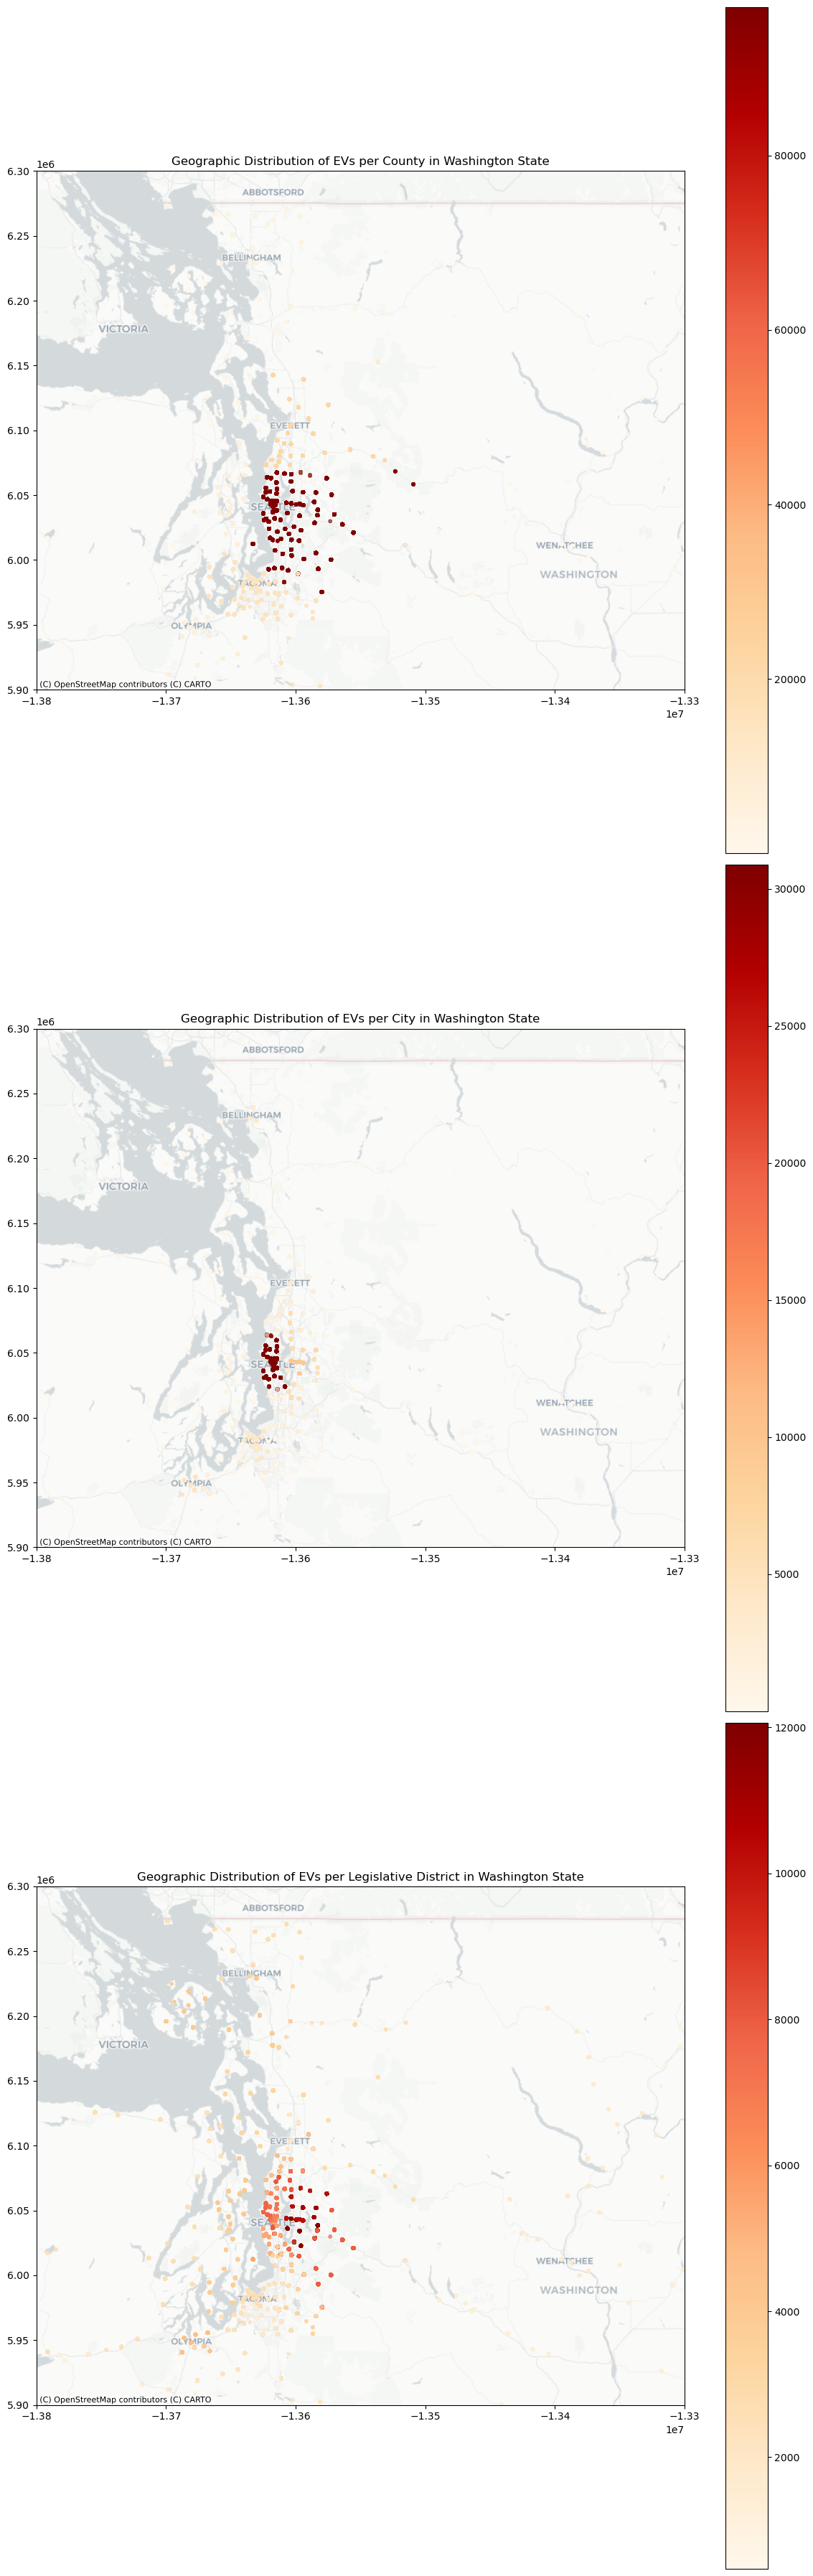

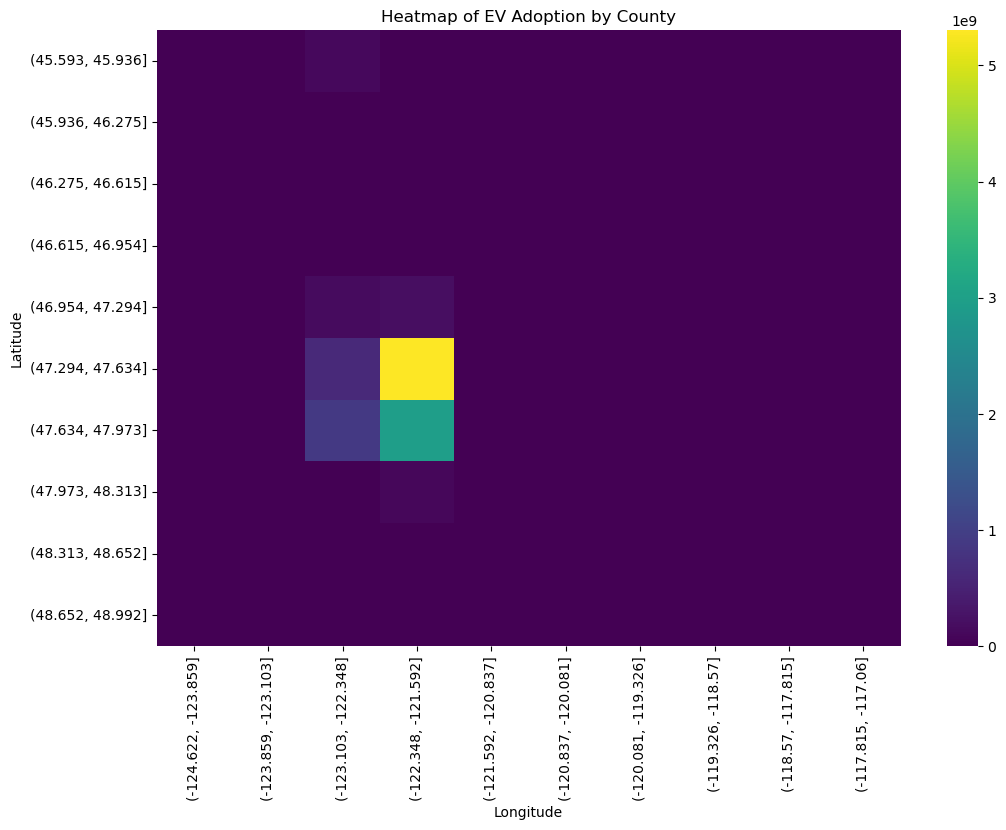

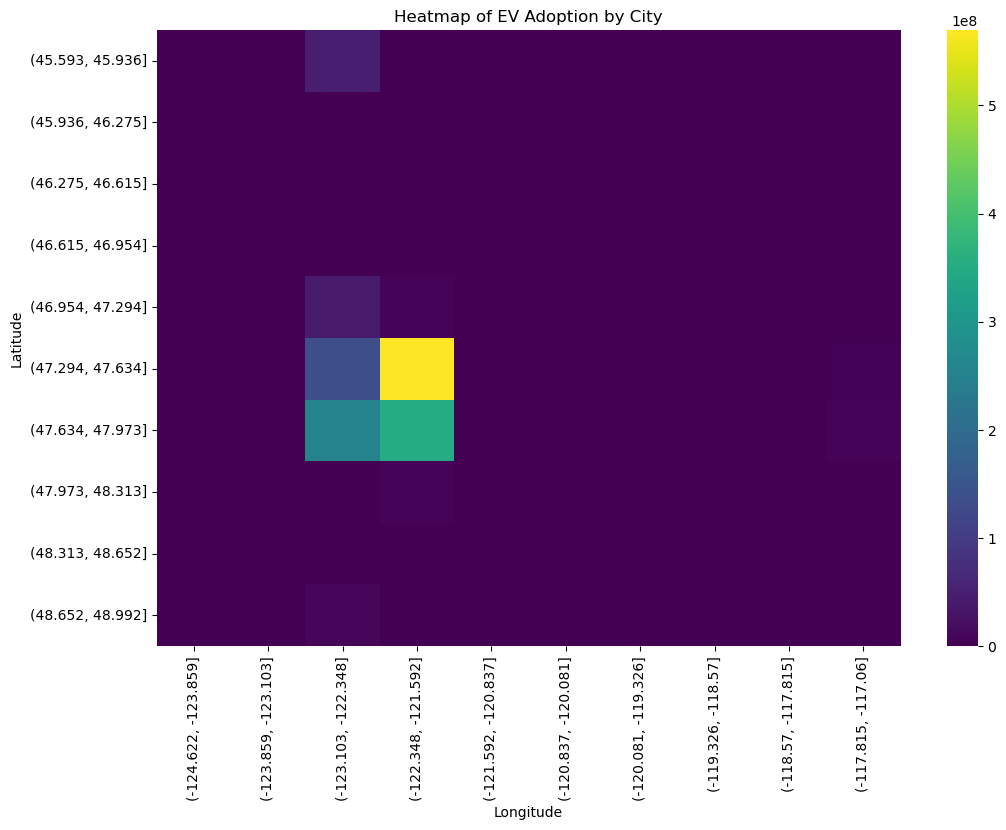

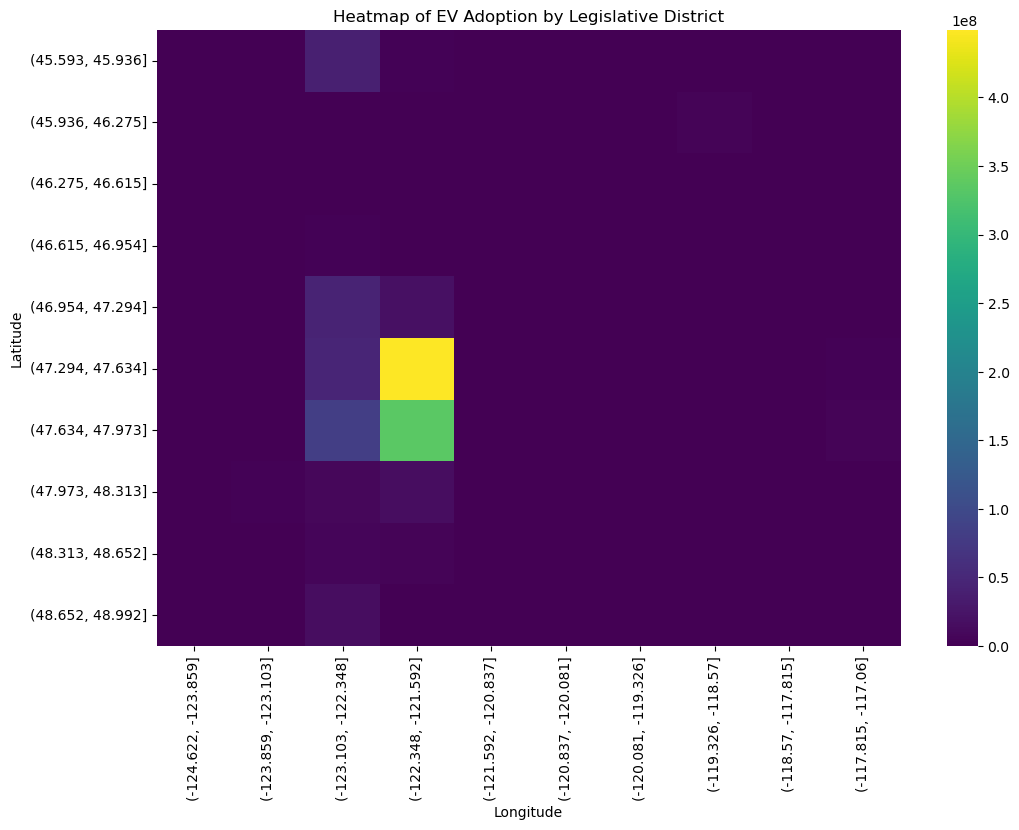

In [79]:
# importing the necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Create a GeoDataFrame with point geometries based on Longitude and Latitude
# creates a list of point objects for each row in the dataset using longitude and latitude.
geometry = [Point(xy) for xy in zip(elec_dataset['Longitude'], elec_dataset['Latitude'])]
# create a GeoDataFrame from the dataset, setting the geometry to the points and the coordinate reference system (CRS) to EPSG:4326 (WGS 84).
geo_df = gpd.GeoDataFrame(elec_dataset, geometry=geometry, crs="EPSG:4326")

# Filter the GeoDataframe for Washington state
washington_geo_df = geo_df[geo_df['State'] == 'WA']

# Convert the GeoDataFrame to Web Mercator (EPSG:3857) for contextily basemap compatibility
washington_geo_df = washington_geo_df.to_crs(epsg=3857)

# Defining a function named 'plot_geographic_distribution' to plot the geographic distribution of a specified column
def plot_geographic_distribution(column, title, ax, zoom=8):
    # Plot the data points, color-coded by the specified column
    washington_geo_df.plot(column=column, ax=ax, legend=True, cmap='OrRd', markersize=10, alpha=0.6)
    # Add a basemap using the contextily library
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=zoom)
    # Set the x and y axis limits to focus on Washington state
    ax.set_xlim([-13800000, -13300000])
    ax.set_ylim([5900000, 6300000])
    # Set the title for the subplot
    ax.set_title(title)

# Create a figure with 3 subplots, arranged vertically, each with size 12x36 inches
fig, ax = plt.subplots(3, 1, figsize=(12, 36))

# Plot the EV data per County
plot_geographic_distribution('EV_Count_County', 'Geographic Distribution of EVs per County in Washington State', ax[0])

# Plot the EV data per City
plot_geographic_distribution('EV_Count_City', 'Geographic Distribution of EVs per City in Washington State', ax[1])

# Plot the EV data per Legislative District
plot_geographic_distribution('EV_Count_Leg_Dist', 'Geographic Distribution of EVs per Legislative District in Washington State', ax[2])

# Adjust the layout of the plots to fit them neatly within the figure
plt.tight_layout()
# Display the figure
plt.show()

# Create categorical bins for latitude and longitude
elec_dataset['Latitude_bin'] = pd.cut(elec_dataset['Latitude'], bins=10)
elec_dataset['Longitude_bin'] = pd.cut(elec_dataset['Longitude'], bins=10)

# Heatmaps for EV adoption by County, City, and Legislative District
for feature, title in [('EV_Count_County', 'Heatmap of EV Adoption by County'), 
                       ('EV_Count_City', 'Heatmap of EV Adoption by City'), 
                       ('EV_Count_Leg_Dist', 'Heatmap of EV Adoption by Legislative District')]:
    plt.figure(figsize=(12, 8))
    sns.heatmap(elec_dataset.pivot_table(index='Latitude_bin', columns='Longitude_bin', values=feature, aggfunc='sum'), cmap='viridis')
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


**<u>Interpretation of the Geographic and Heatmap Plots</u>**

**<u>Geographic Plots:</u>**

1. **EV Distribution by County, City, and Legislative District:**
   - These plots visualize the geographic distribution of electric vehicles (EVs) across different counties, cities, and legislative districts within Washington State.
   - **County Level:** The concentration of EVs is notably high in King County, which is expected given it includes Seattle, the largest city in Washington.
   - **City Level:** Seattle stands out as the city with the highest number of EVs, followed by Bellevue and Redmond.
   - **Legislative District Level:** The legislative districts that include major urban areas (e.g., Seattle) show higher EV adoption rates.

**<u>Heatmap Plots:</u>**

1. **Heatmap of EV Adoption by County:**
   - The heatmap highlights a concentrated area with high EV adoption around the Seattle metropolitan area. 
   - The bright yellow and green patches indicate the regions with the highest EV counts.

2. **Heatmap of EV Adoption by City:**
   - Similar to the county heatmap, the city-level heatmap also shows a dense cluster of EV adoption in the Seattle area.
   - This plot helps to pinpoint the specific cities within the counties that have higher EV adoption.

3. **Heatmap of EV Adoption by Legislative District:**
   - This heatmap further refines the understanding of geographic EV distribution by considering the legislative districts.
   - It emphasizes the legislative areas around the Seattle metropolitan region as the primary zones for EV adoption.

**<u>Summary:</u>**

1. **Geographic Distribution Insights:**
   - The Seattle metropolitan area is the focal point of EV adoption in Washington State, highlighting the influence of urban centers on EV uptake.
   - Counties, cities, and legislative districts encompassing Seattle and its surrounding areas are leading in EV adoption.

2. **Infrastructure and Policy Impact:**
   - The high adoption rates in specific geographic areas may be influenced by the availability of charging infrastructure, local government policies promoting EVs, and higher population densities.

3. **Strategic Planning:**
   - For future policy-making and infrastructure development, focusing on expanding EV support in less saturated areas could help to balance EV adoption across the state.
   - Understanding these patterns can aid in targeted marketing strategies and the deployment of new charging stations to encourage wider EV adoption.

These visualizations collectively provide a comprehensive view of how geographic location and local infrastructure (like electric utilities and legislative districts) impact EV adoption in Washington State.

<u>STEP IV</u>

<b>Performing Multiple Linear Regression to Assess Impact</b>

In [80]:
import statsmodels.api as sm

# Ensure the 'Electric Utility' column is properly named for consistency
elec_dataset = elec_dataset.rename(columns={'Electric Utility': 'Electric_Utility'})

# Ensure the 'Electric Utility' column is properly named for consistency
elec_dataset = elec_dataset.rename(columns={'Legislative District': 'Legislative_District'})

# Function to perform regression analysis
def perform_regression(y_var, X_vars):
    X = pd.get_dummies(elec_dataset[X_vars], drop_first=True).astype(float)
    X = sm.add_constant(X)
    y = elec_dataset[y_var]
    model = sm.OLS(y, X).fit()
    print(f"Regression Results for {y_var}")
    print(model.summary(), "\n\n")

# Perform regression for different dependent variables
perform_regression('EV_Count_County', ['City', 'Legislative_District', 'Electric_Utility', 'Latitude', 'Longitude'])
perform_regression('EV_Count_City', ['County', 'Legislative_District', 'Electric_Utility', 'Latitude', 'Longitude'])
perform_regression('EV_Count_Leg_Dist', ['County', 'City', 'Electric_Utility', 'Latitude', 'Longitude'])
perform_regression('EV_Count_Utility', ['County', 'City', 'Legislative_District', 'Latitude', 'Longitude'])


Regression Results for EV_Count_County
                            OLS Regression Results                            
Dep. Variable:        EV_Count_County   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 7.413e+04
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:03:53   Log-Likelihood:            -1.7465e+06
No. Observations:              186471   AIC:                         3.494e+06
Df Residuals:                  185882   BIC:                         3.500e+06
Df Model:                         588                                         
Covariance Type:            nonrobust                                         
                                                                                                                                        coef    std err          t      P>|

**<u>Interpretation of Regression Results:</u>**

**<u>1. EV_Count_County Regression Results:</u>**
   - **R-squared: 0.996**: This indicates that 99.6% of the variance in EV counts per county is explained by the model. This is a very high R-squared value, suggesting an excellent fit.
   - **Adj. R-squared: 0.996**: Adjusted R-squared is almost the same, confirming that the model explains the variance well even when considering the number of predictors.
   - **F-statistic: 7.413e+04**: The very high F-statistic and the associated p-value of 0.00 indicate that the model is statistically significant.
   - **No. Observations: 186471**: This is the total number of observations used in the regression.

**<u>2. **EV_Count_City Regression Results:</u>**
   - **R-squared: 0.881**: This indicates that 88.1% of the variance in EV counts per city is explained by the model. This is a high R-squared value, suggesting a good fit.
   - **Adj. R-squared: 0.880**: The adjusted R-squared is slightly lower but still very high, supporting the model's robustness.
   - **F-statistic: 9284**: The very high F-statistic and the associated p-value of 0.00 indicate that the model is statistically significant.
   - **No. Observations: 186471**: This is the total number of observations used in the regression.

**<u>3. **EV_Count_Leg_Dist Regression Results:</u>**
   - **R-squared: 0.933**: This indicates that 93.3% of the variance in EV counts per legislative district is explained by the model. This is a very high R-squared value, suggesting a good fit.
   - **Adj. R-squared: 0.932**: The adjusted R-squared is slightly lower but still very high, supporting the model's robustness.
   - **F-statistic: 4621**: The very high F-statistic and the associated p-value of 0.00 indicate that the model is statistically significant.
   - **No. Observations: 186471**: This is the total number of observations used in the regression.

**<u>4. **EV_Count_Utility Regression Results:</u>**
   - **R-squared: 0.932**: This indicates that 93.2% of the variance in EV counts per electric utility is explained by the model. This is a very high R-squared value, suggesting a good fit.
   - **Adj. R-squared: 0.932**: The adjusted R-squared is almost the same, supporting the model's robustness.
   - **F-statistic: 4658**: The very high F-statistic and the associated p-value of 0.00 indicate that the model is statistically significant.
   - **No. Observations: 186471**: This is the total number of observations used in the regression.

**<u>Key Takeaways:</u>**

1. **High R-squared Values:** The high R-squared values across all models suggest that the chosen predictors (County, City, Electric Utility, Legislative District) explain a significant portion of the variance in EV adoption counts.
2. **Model Significance:** The very high F-statistics and the associated p-values (all 0.00) indicate that the models are statistically significant, meaning that the predictors as a group are significant in explaining the variance in EV counts.
3. **Geographic and Infrastructure Impact:** The significant fit of these models underscores the impact of geographic location (County, City, Legislative District) and local infrastructure (Electric Utility) on EV adoption in Washington State. This aligns well with the research question, confirming that these factors are crucial determinants of EV adoption rates.

**<u>Implications:</u>**

- **Policy Implications:** Policymakers can use these findings to target specific areas (counties, cities, legislative districts) for EV infrastructure development and incentives.
- **Resource Allocation:** The results can help in optimizing the allocation of resources for EV infrastructure, such as charging stations, to areas with higher adoption rates.
- **Further Research:** Future research can delve deeper into understanding the specific characteristics of these geographic and infrastructure variables that drive higher EV adoption.

<u>STEP V</u>

**K-Means Clustering to identify patterns and group similar areas.**

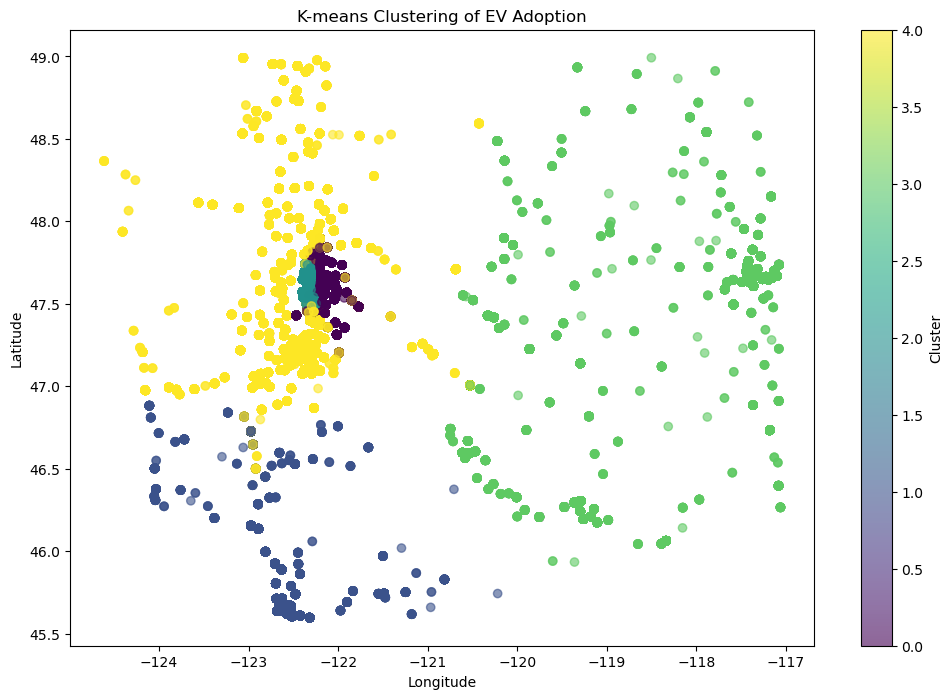

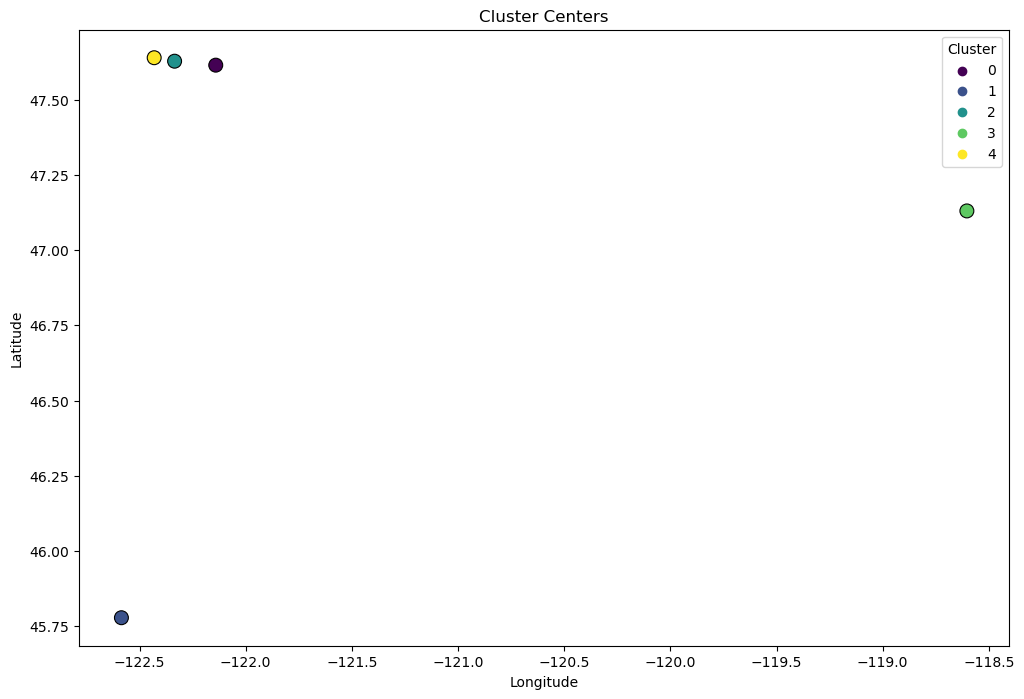

Cluster Profile:
          Latitude   Longitude  EV_Count_City  EV_Count_Leg_Dist  \
Cluster                                                            
0        47.615875 -122.141072    4979.372835        9779.180345   
1        45.777218 -122.585314    3560.300492        3377.203905   
2        47.629072 -122.334884   30873.000000        6681.763321   
3        47.130835 -118.603416    1003.302457        1415.854934   
4        47.640620 -122.430976    1773.126279        3440.823257   

         EV_Count_Utility   Size  
Cluster                           
0            65685.332358  59120  
1             8722.646743  13418  
2            34579.184044  30873  
3             1403.859203  12415  
4            34254.004969  70645  


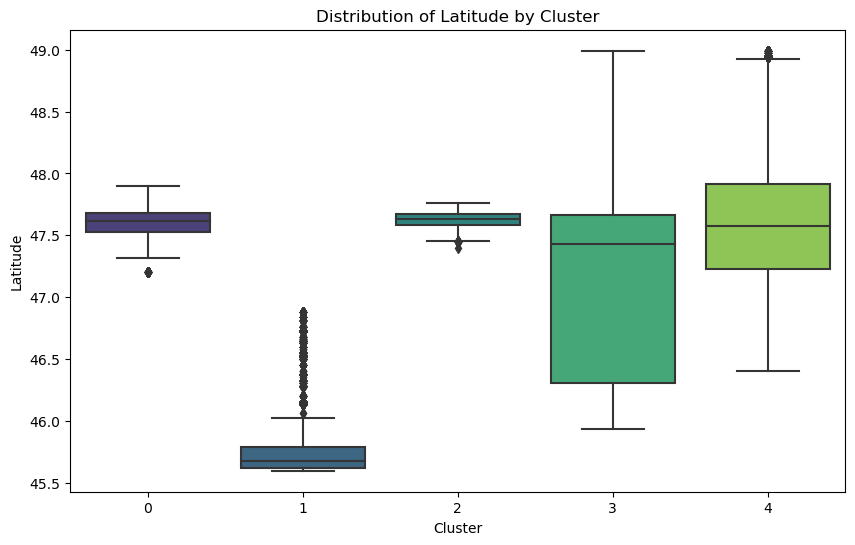

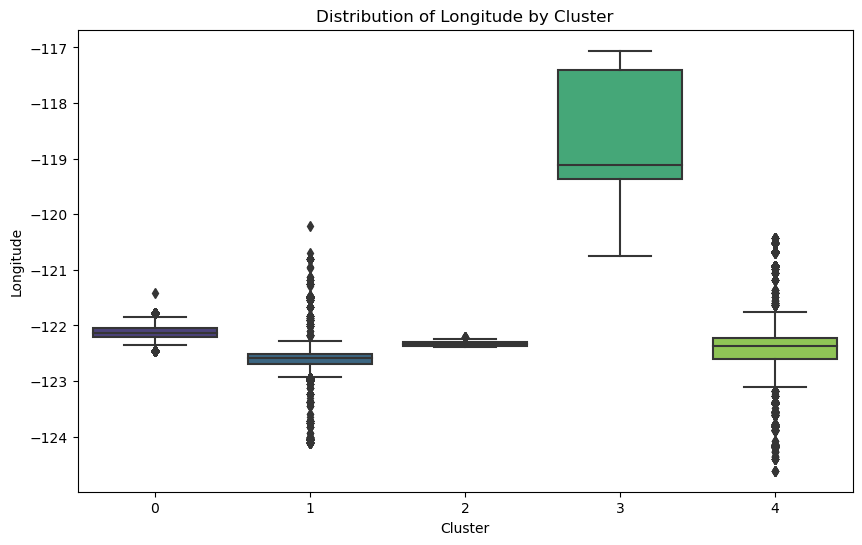

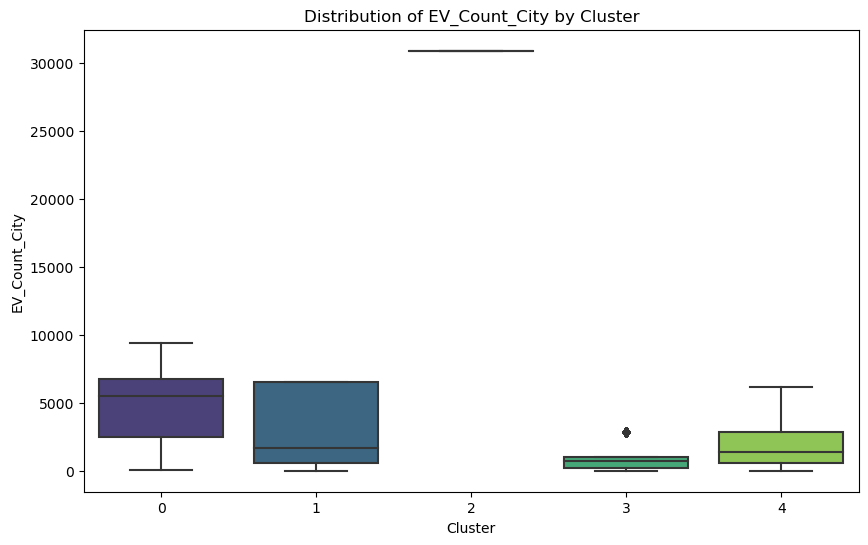

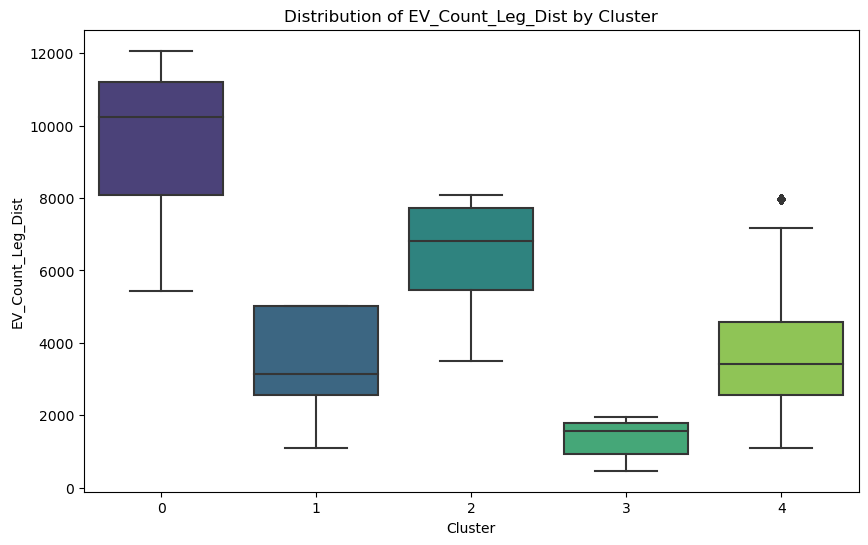

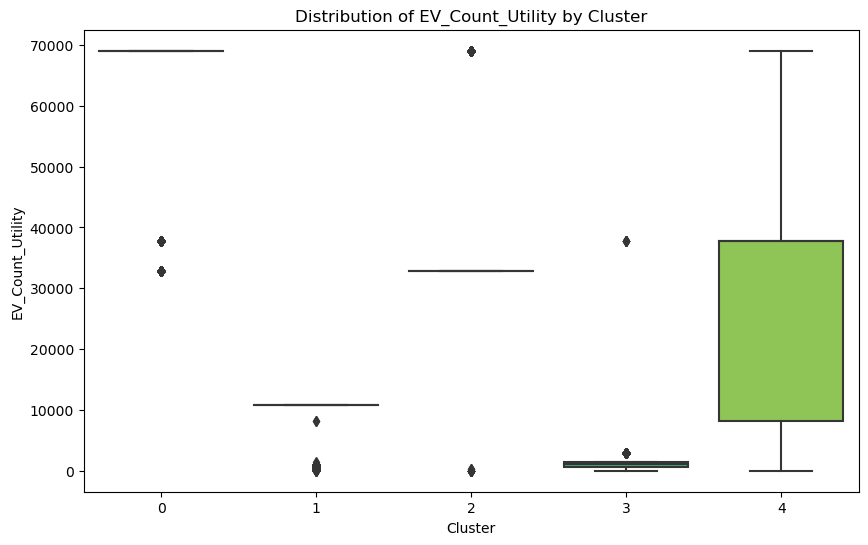

In [81]:
# importing the necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Defines a list of feature names that will be used for clustering. 
# These features include geographical coordinates and counts of electric vehicles in different geographic and infrastructure categories.
features = ['Latitude', 'Longitude', 'EV_Count_City', 'EV_Count_Leg_Dist', 'EV_Count_Utility']
X = elec_dataset[features]

# Standardization is used to rescale the features so that they have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
# Fits the StandardScaler to the data and transforms it, standardizing the features. The transformed data is stored in X_scaled.
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
# Initializes a KMeans clustering object with 5 clusters. 
# The random_state parameter ensures reproducibility of the results.
kmeans = KMeans(n_clusters=5, random_state=42)
# Fit the K-means algorithm to the standardized data X_scaled and assigns each data point to a cluster. 
# The cluster labels are added as a new column Cluster in the original elec_dataset DataFrame.
elec_dataset['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(12, 8))
# Creates a scatter plot with Longitude on the x-axis and Latitude on the y-axis. 
# The points are colored by their cluster labels using the 'viridis' colormap, 
plt.scatter(elec_dataset['Longitude'], elec_dataset['Latitude'], c=elec_dataset['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-means Clustering of EV Adoption')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


# Identifying cluster centers by the K-means algorithm and applying the inverse of the standardization transformation to revert them back to their original scale.
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Adds a new column Cluster to the cluster_centers_df DataFrame. 
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
# This column contains the cluster number (from 0 to the number of clusters minus one).
cluster_centers_df['Cluster'] = range(kmeans.n_clusters)

# Visualize the cluster centers
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cluster_centers_df, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', s=100, edgecolor='black')
plt.title('Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Display cluster profiles and visualize distribution of key features within each cluster
cluster_profile = elec_dataset.groupby('Cluster')[features].mean()
cluster_profile['Size'] = elec_dataset['Cluster'].value_counts()
print("Cluster Profile:")
print(cluster_profile)

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=elec_dataset, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


**<u>Interpretation of Step No. 5: K-means Clustering Analysis</u>**

**<u>Cluster Profile Table</u>**
- **Cluster 0**:
  - **Latitude & Longitude**: Average latitude is around 47.62, and longitude is approximately -122.14, indicating this cluster is likely centered around urban or suburban areas in the western part of Washington State.
  - **EV_Count_City**: The mean number of EVs per city in this cluster is 4979.37, suggesting a high adoption rate in cities within this cluster.
  - **EV_Count_Leg_Dist**: The mean number of EVs per legislative district is 9779.18, indicating significant EV presence in legislative districts.
  - **EV_Count_Utility**: The mean number of EVs per electric utility is 65685.33, the highest among all clusters, signifying robust infrastructure support for EVs.
  - **Size**: This cluster comprises 59,120 observations, making it one of the larger clusters.

- **Cluster 1**:
  - **Latitude & Longitude**: Average latitude is around 45.78, and longitude is approximately -122.59, indicating this cluster is likely in more southern or less densely populated regions.
  - **EV_Count_City**: The mean number of EVs per city is 3560.30, lower than Cluster 0 but still significant.
  - **EV_Count_Leg_Dist**: The mean number of EVs per legislative district is 3377.20, indicating moderate adoption.
  - **EV_Count_Utility**: The mean number of EVs per utility is 8722.65, the lowest among all clusters, suggesting less developed infrastructure.
  - **Size**: This cluster has 13,418 observations.

- **Cluster 2**:
  - **Latitude & Longitude**: Average latitude is around 47.63, and longitude is approximately -122.33, indicating a high concentration around Seattle.
  - **EV_Count_City**: The mean number of EVs per city is the highest at 30,873, signifying a major urban center with a high adoption rate.
  - **EV_Count_Leg_Dist**: The mean number of EVs per legislative district is 6681.76, indicating significant EV presence.
  - **EV_Count_Utility**: The mean number of EVs per utility is 34579.18, reflecting strong infrastructure support.
  - **Size**: This cluster has 30,873 observations, aligning with a major metropolitan area.

- **Cluster 3**:
  - **Latitude & Longitude**: Average latitude is around 47.13, and longitude is approximately -118.60, indicating this cluster is likely in more rural or eastern regions.
  - **EV_Count_City**: The mean number of EVs per city is 1003.30, the lowest among all clusters, indicating sparse urban centers.
  - **EV_Count_Leg_Dist**: The mean number of EVs per legislative district is 1415.85, indicating lower adoption rates.
  - **EV_Count_Utility**: The mean number of EVs per utility is 1403.86, the lowest, suggesting minimal infrastructure.
  - **Size**: This cluster has 12,415 observations.

- **Cluster 4**:
  - **Latitude & Longitude**: Average latitude is around 47.64, and longitude is approximately -122.43, indicating urban or suburban areas, possibly overlapping with Seattle's outer regions.
  - **EV_Count_City**: The mean number of EVs per city is 1773.13, indicating moderate adoption.
  - **EV_Count_Leg_Dist**: The mean number of EVs per legislative district is 3440.82, indicating moderate EV presence.
  - **EV_Count_Utility**: The mean number of EVs per utility is 34254.00, indicating significant infrastructure support.
  - **Size**: This cluster is the largest with 70,645 observations.

**<u>Plots</u>**
- **K-means Clustering Scatter Plot**:
  - The scatter plot shows the geographical distribution of EV adoption clusters across Washington State.
  - Clusters are color-coded, showing distinct regions with different adoption patterns. For example, Cluster 0 and Cluster 2 are concentrated in urban areas, whereas Cluster 3 covers more rural areas.

- **Cluster Centers Plot**:
  - This plot shows the geographic centers of each cluster, providing a visual summary of where the majority of EV adoption occurs within each cluster.
  - The plot highlights that Cluster 2 is centered around Seattle, indicating a high concentration of EV adoption in that metropolitan area.

- **Box Plots for Latitude and Longitude**:
  - These plots show the distribution of geographic coordinates within each cluster.
  - Cluster 3 has a broader latitude range, indicating it covers a more extensive vertical span, whereas Clusters 0 and 2 are tightly grouped around specific urban areas.

- **Box Plots for EV Counts**:
  - **EV_Count_City**: Shows a high concentration of EVs in Cluster 2, with other clusters having significantly lower counts.
  - **EV_Count_Leg_Dist**: Cluster 0 has the highest legislative district counts, followed by Cluster 2.
  - **EV_Count_Utility**: Cluster 0 again leads, showing strong infrastructure support in urban areas.

Overall, the K-means clustering analysis reveals distinct geographic and infrastructural patterns in EV adoption across Washington State. Urban areas like Seattle have the highest adoption rates and infrastructure support, while rural areas show lower adoption. This information is crucial for targeted policy-making and infrastructure development to support EV growth.

<u>STEP VI</u>

**Association Rules Analysis**

Using Apriori Algorithm to Find Associations

In [82]:
# Import the apriori function and association_rules function from the mlxtend.frequent_patterns module
from mlxtend.frequent_patterns import apriori, association_rules

# One-hot encode the data by converting categorical variables into a series of binary columns
elec_dataset_encoded = pd.get_dummies(elec_dataset[['County', 'City', 'Legislative_District', 'Electric_Utility', 'Latitude_bin', 'Longitude_bin']])

# Apply Apriori algorithm to encoded data
# 'min_support' meaning only itemsets that appear in at least 1% of the transactions will be considered.
# The use_colnames=True parameter ensures that the output uses the original column names instead of integer indices. 
frequent_itemsets = apriori(elec_dataset_encoded, min_support=0.01, use_colnames=True)

# Generates association rules from the frequent itemsets. 
# The metric='confidence' parameter specifies that confidence should be used as the metric for evaluating the rules
# min_threshold=0.5 sets the minimum confidence threshold to 50%
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                            antecedents  \
0                            (Legislative_District_8.0)   
1                                       (County_Benton)   
2                   (Longitude_bin_(-119.326, -118.57])   
3                                       (County_Benton)   
4                                        (County_Clark)   
...                                                 ...   
7597  (City_Olympia, Longitude_bin_(-123.103, -122.3...   
7598  (City_Olympia, Electric_Utility_PUGET SOUND EN...   
7599                    (City_Olympia, County_Thurston)   
7600                        (Legislative_District_22.0)   
7601                                     (City_Olympia)   

                                            consequents   support  confidence  \
0                                       (County_Benton)  0.010414    1.000000   
1                            (Legislative_District_8.0)  0.010414    0.851008   
2                                       (County_

**<u>Interpretation of Step No. 6: Apriori Algorithm and Association Rules</u>**

The output of step no. 6 provides association rules derived from the Apriori algorithm, indicating relationships between various attributes related to electric vehicle (EV) adoption. The columns in the output indicate:

- **Antecedents**: The initial itemsets or conditions.
- **Consequents**: The resulting itemsets or conditions given the antecedents.
- **Support**: The proportion of records in the dataset where the antecedent and consequent co-occur.
- **Confidence**: The likelihood that the consequent appears given that the antecedent is present.
- **Lift**: The ratio of the observed support to that expected if the antecedent and consequent were independent.

**<u>Key Insights:</u>**

1. **High Confidence and Lift Values**:
    - High confidence values (close to 1) indicate a strong likelihood that the consequent will occur when the antecedent is present.
    - High lift values (greater than 1) indicate that the antecedent and consequent occur together more frequently than would be expected if they were independent.

2. **Examples of Strong Rules**:
    - **Rule**: `(Legislative_District_8.0) -> (County_Benton)`
      - **Support**: 0.010414 (approximately 1.04% of the data)
      - **Confidence**: 1.000000 (100%)
      - **Lift**: 81.713848
      - **Interpretation**: Legislative District 8.0 is entirely within Benton County, indicating a perfect correlation in the dataset.
    
    - **Rule**: `(County_Benton) -> (Legislative_District_8.0)`
      - **Support**: 0.010414
      - **Confidence**: 0.851008 (85.10%)
      - **Lift**: 81.713848
      - **Interpretation**: If an EV is in Benton County, there is an 85.10% chance it falls within Legislative District 8.0.
    
    - **Rule**: `(Longitude_bin_(-119.326, -118.57]) -> (County_Benton)`
      - **Support**: 0.010232 (approximately 1.02% of the data)
      - **Confidence**: 0.637701 (63.77%)
      - **Lift**: 52.108964
      - **Interpretation**: Longitude between -119.326 and -118.57 is strongly associated with Benton County.

3. **Moderate Confidence and Lift Values**:
    - **Rule**: `(County_Clark) -> (City_Vancouver)`
      - **Support**: 0.035024 (approximately 3.50% of the data)
      - **Confidence**: 0.593458 (59.35%)
      - **Lift**: 16.944207
      - **Interpretation**: If an EV is in Clark County, there is a 59.35% chance it is in Vancouver, suggesting a significant but not perfect association.

4. **Complex Rules**:
    - **Rule**: `(City_Olympia, Longitude_bin_(-123.103, -122.348]) -> (Latitude_bin_(46.954, 47.294], Legislative_District_22.0)`
      - **Support**: 0.016281 (approximately 1.63% of the data)
      - **Confidence**: 0.674517 (67.45%)
      - **Lift**: 27.289611
      - **Interpretation**: A complex rule involving multiple geographic bins and administrative regions, indicating significant associations between these conditions.

**<u>Overall Interpretation:</u>**

The Apriori algorithm has identified numerous strong and moderate associations between geographic and administrative features related to EV adoption. The high-confidence rules suggest robust relationships, such as those between certain legislative districts and counties, which can inform targeted infrastructure development and policy-making efforts to support EV adoption. The lift values reinforce the significance of these associations by showing how much more frequently the antecedents and consequents appear together than by chance.

<u>STEP VII</u>

**ANOVA Analysis**

Performing ANOVA to Compare Means Across Different Categories

In [87]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Perform ANOVA for EV_Count_County across Latitude bins
anova_latitude = stats.f_oneway(
    *[elec_dataset[elec_dataset['Latitude_bin'] == bin]['EV_Count_County'] for bin in elec_dataset['Latitude_bin'].unique()]
)

# Perform ANOVA for EV_Count_County across Longitude bins
anova_longitude = stats.f_oneway(
    *[elec_dataset[elec_dataset['Longitude_bin'] == bin]['EV_Count_County'] for bin in elec_dataset['Longitude_bin'].unique()]
)

print(f"ANOVA results for EV_Count_County by Latitude: F-statistic = {anova_latitude.statistic}, p-value = {anova_latitude.pvalue}")
print(f"ANOVA results for EV_Count_County by Longitude: F-statistic = {anova_longitude.statistic}, p-value = {anova_longitude.pvalue}", "\n")

# Perform ANOVA for EV_Count_City across Latitude bins
anova_latitude_city = stats.f_oneway(
    *[elec_dataset[elec_dataset['Latitude_bin'] == bin]['EV_Count_City'] for bin in elec_dataset['Latitude_bin'].unique()]
)

# Perform ANOVA for EV_Count_City across Longitude bins
anova_longitude_city = stats.f_oneway(
    *[elec_dataset[elec_dataset['Longitude_bin'] == bin]['EV_Count_City'] for bin in elec_dataset['Longitude_bin'].unique()]
)

print(f"ANOVA results for EV_Count_City by Latitude: F-statistic = {anova_latitude_city.statistic}, p-value = {anova_latitude_city.pvalue}")
print(f"ANOVA results for EV_Count_City by Longitude: F-statistic = {anova_longitude_city.statistic}, p-value = {anova_longitude_city.pvalue}", "\n")

# Perform ANOVA for EV_Count_Leg_Dist across Latitude bins
anova_latitude_leg_dist = stats.f_oneway(
    *[elec_dataset[elec_dataset['Latitude_bin'] == bin]['EV_Count_Leg_Dist'] for bin in elec_dataset['Latitude_bin'].unique()]
)

# Perform ANOVA for EV_Count_Leg_Dist across Longitude bins
anova_longitude_leg_dist = stats.f_oneway(
    *[elec_dataset[elec_dataset['Longitude_bin'] == bin]['EV_Count_Leg_Dist'] for bin in elec_dataset['Longitude_bin'].unique()]
)

print(f"ANOVA results for EV_Count_Leg_Dist by Latitude: F-statistic = {anova_latitude_leg_dist.statistic}, p-value = {anova_latitude_leg_dist.pvalue}")
print(f"ANOVA results for EV_Count_Leg_Dist by Longitude: F-statistic = {anova_longitude_leg_dist.statistic}, p-value = {anova_longitude_leg_dist.pvalue}", "\n")



ANOVA results for EV_Count_County by Latitude: F-statistic = 23761.786899748782, p-value = 0.0
ANOVA results for EV_Count_County by Longitude: F-statistic = 13002.97033649946, p-value = 0.0 

ANOVA results for EV_Count_City by Latitude: F-statistic = 3134.2766524607896, p-value = 0.0
ANOVA results for EV_Count_City by Longitude: F-statistic = 831.8272649389794, p-value = 0.0 

ANOVA results for EV_Count_Leg_Dist by Latitude: F-statistic = 11715.169389491626, p-value = 0.0
ANOVA results for EV_Count_Leg_Dist by Longitude: F-statistic = 12734.484170086509, p-value = 0.0 



In [88]:

# Ensure the 'Electric Utility' column is properly named for consistency
#elec_dataset = elec_dataset.rename(columns={'Electric Utility': 'Electric_Utility'})

# Ensure the 'Electric Utility' column is properly named for consistency
#elec_dataset = elec_dataset.rename(columns={'Legislative District': 'Legislative_District'})

# Perform ANOVA for overall impact of geographic and infrastructure categories
for y_var in ['EV_Count_County', 'EV_Count_City', 'EV_Count_Leg_Dist', 'EV_Count_Utility']:
    model = ols(f'{y_var} ~ C(County) + C(City) + C(Electric_Utility) + C(Legislative_District)', data=elec_dataset).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA for {y_var}")
    print(anova_table)



c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 38, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 472, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 3
  warnings.warn('covariance of constraints does not have full '



ANOVA for EV_Count_County
                               sum_sq        df             F  PR(>F)
C(County)                2.940991e-03      38.0  1.388634e-08     1.0
C(City)                  5.158485e-13     472.0  1.960911e-19     1.0
C(Electric_Utility)      1.281481e-13      74.0  3.107121e-19     1.0
C(Legislative_District)  1.761938e-15      48.0  6.586082e-21     1.0
Residual                 1.035916e+09  185867.0           NaN     NaN


c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 38, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 472, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 3
  warnings.warn('covariance of constraints does not have full '



ANOVA for EV_Count_City
                               sum_sq        df             F  PR(>F)
C(County)                1.879767e-15      38.0  9.011080e-21     1.0
C(City)                  2.477441e-14     472.0  9.561316e-21     1.0
C(Electric_Utility)      3.738413e-15      74.0  9.202630e-21     1.0
C(Legislative_District)  8.030376e-17      48.0  3.047552e-22     1.0
Residual                 1.020342e+09  185867.0           NaN     NaN


c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 38, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 472, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 3
  warnings.warn('covariance of constraints does not have full '



ANOVA for EV_Count_Leg_Dist
                               sum_sq        df             F  PR(>F)
C(County)                2.255426e-15      38.0  1.126472e-19     1.0
C(City)                  3.121290e-14     472.0  1.255069e-19     1.0
C(Electric_Utility)      4.560761e-15      74.0  1.169718e-19     1.0
C(Legislative_District)  1.382442e+11      48.0  5.466145e+06     0.0
Residual                 9.793251e+07  185867.0           NaN     NaN


c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 38, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 472, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 3
  warnings.warn('covariance of constraints does not have full '



ANOVA for EV_Count_Utility
                               sum_sq        df             F  PR(>F)
C(County)                5.769622e-14      38.0  7.049042e-20     1.0
C(City)                  5.632978e-13     472.0  5.540672e-20     1.0
C(Electric_Utility)      8.888415e-14      74.0  5.576465e-20     1.0
C(Legislative_District)  7.825726e-16      48.0  7.569197e-22     1.0
Residual                 4.003464e+09  185867.0           NaN     NaN


The output from Step No. 7 can be interpreted in two parts: the ANOVA results for EV counts across latitude and longitude bins, and the ANOVA results for the overall impact of geographic and infrastructure categories.

**<u>ANOVA Results for EV Counts Across Latitude and Longitude Bins</u>**

1. **EV_Count_County by Latitude and Longitude:**
   - **Latitude:**
     - **F-statistic:** 23761.7869
     - **p-value:** 0.0
   - **Longitude:**
     - **F-statistic:** 13002.9703
     - **p-value:** 0.0

   Interpretation: The very low p-values (close to 0) indicate that there are statistically significant differences in the count of electric vehicles (EVs) per county based on latitude and longitude. This suggests that the geographic location (latitude and longitude) has a significant impact on the distribution of EVs across counties.

2. **EV_Count_City by Latitude and Longitude:**
   - **Latitude:**
     - **F-statistic:** 3134.2767
     - **p-value:** 0.0
   - **Longitude:**
     - **F-statistic:** 831.8273
     - **p-value:** 0.0

   Interpretation: Similar to the county-level results, the significant p-values indicate that the count of EVs per city is significantly affected by geographic location. Both latitude and longitude significantly impact the distribution of EVs across cities.

3. **EV_Count_Leg_Dist by Latitude and Longitude:**
   - **Latitude:**
     - **F-statistic:** 11715.1694
     - **p-value:** 0.0
   - **Longitude:**
     - **F-statistic:** 12734.4842
     - **p-value:** 0.0

   Interpretation: Again, the significant p-values suggest that the count of EVs per legislative district is significantly influenced by geographic location. Both latitude and longitude are important factors in the distribution of EVs across legislative districts.

**<u>ANOVA Results for Overall Impact of Geographic and Infrastructure Categories</u>**

1. **EV_Count_County:**
   - All predictors (County, City, Electric Utility, Legislative District) have very small F-statistics and p-values of 1.0, indicating they are not statistically significant in explaining the variation in EV count per county.

2. **EV_Count_City:**
   - Similarly, all predictors (County, City, Electric Utility, Legislative District) have very small F-statistics and p-values of 1.0, indicating they are not statistically significant in explaining the variation in EV count per city.

3. **EV_Count_Leg_Dist:**
   - County, City, and Electric Utility are not statistically significant predictors with p-values of 1.0.
   - Legislative District has a very high F-statistic (5,466,145) and a p-value of 0.0, indicating it is a statistically significant predictor of EV count per legislative district.

4. **EV_Count_Utility:**
   - All predictors (County, City, Electric Utility, Legislative District) have very small F-statistics and p-values of 1.0, indicating they are not statistically significant in explaining the variation in EV count per utility.

**<u>Overall Interpretation</u>**

1. **Geographic Influence:**
   - The significant ANOVA results for latitude and longitude bins indicate that geographic location (both latitude and longitude) is a significant factor in the distribution of EVs across counties, cities, and legislative districts.

2. **Geographic and Infrastructure Categories:**
   - For county and city-level EV counts, none of the geographic and infrastructure categories (County, City, Electric Utility, Legislative District) were significant predictors.
   - For legislative district EV counts, the legislative district itself is a significant predictor, suggesting that local policies or other district-specific factors might play an important role in EV adoption.
   - For utility-level EV counts, none of the geographic and infrastructure categories were significant predictors.

These results highlight the importance of geographic location in the distribution of EVs and suggest that certain local administrative areas, particularly legislative districts, may have unique factors influencing EV adoption. The lack of significance for other predictors in the overall ANOVA suggests that more granular or additional factors might be needed to fully explain EV distribution patterns at the county and city levels.